<a href="https://colab.research.google.com/github/MariaMitrankova/Community-Detection-in-Procurement/blob/main/CommunitiesDescription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This part provides Data Cleaning and Community Detection Part

In [ ]:
import pickle
import pandas as pd
auctions = pd.read_pickle("/content/drive/MyDrive/Maria Mitrankova/auctions_and_bids.pickle")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
auctions_new = pd.read_csv("/content/drive/MyDrive/Maria Mitrankova/data-auctions.csv")
auctions_new['auction_id'] = auctions_new['auction_id'] + len(auctions) + 1

In [ ]:
auctions.columns

Index(['purchase_number', 'region', 'procurer_reg_num', 'max_price',
       'currency', 'start_date', 'end_date', 'prolong_date',
       'n_commission_members', 'participant_inn', 'price', 'date',
       'is_approved', 'is_after_prolong', 'auction_id'],
      dtype='object')

In [ ]:
auctions_obj = pd.read_csv("/content/drive/MyDrive/Maria Mitrankova/auctions_objs_old.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
auctions_obj = pd.read_csv("/content/data-autctions_obj (1).csv")

In [ ]:
auctions_obj['code_1'].max()

99

In [ ]:
import numpy as np

code_m = np.eye(99)

In [ ]:
code_m = np.ones((99, 99)) - np.eye(99)
code_m

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [ ]:
auctions_new = auctions_obj.merge(auctions_new[['auction_id', 'purchase_number', 'participant_inn']], on=['purchase_number', 'participant_inn'])


In [ ]:
auctions_new.merge(auctions_obj[['name', 'purchase_number', 'participant_inn']], on=['purchase_number', 'participant_inn'])

purchase_number             region  procurer_reg_num  max_price  \
0        362100010019000623  Sverdlovskaja_obl      3.621000e+09   26000.00   
1        362200029620000002  Sverdlovskaja_obl      3.622000e+09  101252.00   
2        362100010019000674  Sverdlovskaja_obl      3.621000e+09   18870.00   
3        362100002520000002  Sverdlovskaja_obl      3.621000e+09  110000.00   
4        362300330420000020  Sverdlovskaja_obl      3.623003e+09   62943.99   
...                     ...                ...               ...        ...   
1698318  162300028419000068  Sverdlovskaja_obl      1.623000e+09   75000.00   
1698319  162300028419000068  Sverdlovskaja_obl      1.623000e+09   75000.00   
1698320  162300028419000068  Sverdlovskaja_obl      1.623000e+09   75000.00   
1698321  162300028419000068  Sverdlovskaja_obl      1.623000e+09   75000.00   
1698322  162300028419000068  Sverdlovskaja_obl      1.623000e+09   75000.00   

        currency           start_date             end_date prolong_date  \
0            RUB  2019-12-23 06:49:34  2020-02-17 10:00:00          NaN   
1            RUB  2020-02-20 12:11:07  2020-02-28 00:00:00          NaN   
2            RUB  2019-12-26 06:29:10  2020-03-03 10:00:00          NaN   
3            RUB  2020-02-27 13:19:12  2020-03-06 15:00:00          NaN   
4            RUB  2020-03-05 10:58:49  2020-03-16 10:00:00          NaN   
...          ...                  ...                  ...          ...   
1698318      RUB  2019-12-23 09:57:20  2020-01-09 11:00:00          NaN   
1698319      RUB  2019-12-23 09:57:20  2020-01-09 11:00:00          NaN   
1698320      RUB  2019-12-23 09:57:20  2020-01-09 11:00:00          NaN   
1698321      RUB  2019-12-23 09:57:20  2020-01-09 11:00:00          NaN   
1698322      RUB  2019-12-23 09:57:20  2020-01-09 11:00:00          NaN   

         n_commission_members  participant_inn     price                 date  \
0                           3       4205375569  24000.00  2020-01-30 16:12:00   
1                           5       6670414270  89110.00  2020-02-27 08:05:00   
2                           3       1101062848  18790.00  2020-01-30 15:20:00   
3                           5       7724490000  98287.00  2020-02-28 08:25:00   
4                           5       6685046413  59489.62  2020-03-12 14:09:00   
...                       ...              ...       ...                  ...   
1698318                     5       7203304007  30000.00  2020-01-08 22:09:00   
1698319                     5       7203390550  60000.00  2020-01-09 07:04:00   
1698320                     5       6684030280  69900.00  2020-01-08 20:45:00   
1698321                     5       7202153394  72000.00  2019-12-30 14:07:00   
1698322                     5       6623074749  74000.00  2019-12-24 08:00:00   

        is_approved  is_after_prolong  auction_id  \
0              True             False     3910591   
1              True             False     3910948   
2              True             False     3910646   
3              True             False     3910983   
4              True             False     3911031   
...             ...               ...         ...   
1698318        True             False     3910613   
1698319        True             False     3910613   
1698320        True             False     3910613   
1698321        True             False     3910613   
1698322        True             False     3910613   

                                                      name  
0        Услуги по продаже места для рекламы в печатных...  
1                                    Говядина замороженная  
2                                                  Сканеры  
3        Услуги почтовых отделений (объектов) дополните...  
4                   Сыры твердые без вкусовых наполнителей  
...                                                    ...  
1698318          Услуги в области кадастровой деятельности  
1698319          Услуги в области кадастровой деятельности  
169

In [ ]:
auctions_m = pd.concat([auctions, auctions_new])
auctions_m

purchase_number         region  procurer_reg_num  max_price  \
0        0123300019714000040  Amurskaja_obl      1.233000e+09  170612.50   
1        0123300019714000040  Amurskaja_obl      1.233000e+09  170612.50   
2        0123300019714000040  Amurskaja_obl      1.233000e+09  170612.50   
3        0123300019714000040  Amurskaja_obl      1.233000e+09  170612.50   
4        0123300019714000040  Amurskaja_obl      1.233000e+09  170612.50   
...                      ...            ...               ...        ...   
1698318   376200005919000005   Adygeja_Resp      3.762000e+09   35966.58   
1698319   376300006619000086   Adygeja_Resp      3.763000e+09   83081.63   
1698320   376300006619000086   Adygeja_Resp      3.763000e+09   83081.63   
1698321   376300006619000086   Adygeja_Resp      3.763000e+09   83081.63   
1698322   376200015019000023   Adygeja_Resp      3.762000e+09  376046.00   

        currency           start_date             end_date prolong_date  \
0           None  2014-09-19 15:00:00  2014-09-26 10:00:00          NaN   
1           None  2014-09-19 15:00:00  2014-09-26 10:00:00          NaN   
2           None  2014-09-19 15:00:00  2014-09-26 10:00:00          NaN   
3           None  2014-09-19 15:00:00  2014-09-26 10:00:00          NaN   
4           None  2014-09-19 15:00:00  2014-09-26 10:00:00          NaN   
...          ...                  ...                  ...          ...   
1698318      RUB  2019-07-18 12:42:25  2019-07-26 09:00:00          NaN   
1698319      RUB  2019-08-07 17:32:21  2019-08-15 11:00:00          NaN   
1698320      RUB  2019-08-07 17:32:21  2019-08-15 11:00:00          NaN   
1698321      RUB  2019-08-07 17:32:21  2019-08-15 11:00:00          NaN   
1698322      RUB  2019-08-08 14:11:20  2019-08-16 09:00:00          NaN   

         n_commission_members  participant_inn  ...  is_approved  \
0                           6     281201818073  ...         None   
1                           6       2543003150  ...         True   
2                           6       2722119337  ...         True   
3                           6       3849008742  ...         True   
4                           6       2725098967  ...         True   
...                       ...              ...  ...          ...   
1698318                     5       7709909310  ...         True   
1698319                     0     231294252879  ...         True   
1698320                     0     231294252879  ...         True   
1698321                     0     231294252879  ...         True   
1698322                     0       7714511476  ...         True   

        is_after_prolong auction_id  Unnamed: 0  code_1  code_2  code_3  \
0                  False          0         NaN     NaN     NaN     NaN   
1                  False          0         NaN     NaN     NaN     NaN   
2                  False          0         NaN     NaN     NaN     NaN   
3                  False          0         NaN     NaN     NaN     NaN   
4                  False          0         NaN     NaN     NaN     NaN   
...                  ...        ...         ...     ...     ...     ...   
1698318            False    3972862   1698318.0    71.0    20.0    19.0   
1698319            False    3972942   1698319.0    33.0    10.0    12.0   
1698320            False    3972942   1698320.0    32.0    50.0    13.0   
1698321            False    3972942   1698321.0    32.0    50.0    21.0   
1698322            False    3972996   1698322.0    20.0    59.0    52.0   

         code_4                                               name  object  
0           NaN                                                NaN     NaN  
1           NaN                                                NaN     NaN  
2           NaN                                                NaN     NaN  
3           NaN                                                NaN     NaN  
4           NaN                                                NaN     NaN  
...         ...    

In [ ]:
auctions_new_obj = pd.read_csv("/content/drive/MyDrive/Maria Mitrankova/auctions_objs.csv")
auctions_new_obj = auctions_new_obj.drop_duplicates(['purchase_number'])

In [ ]:
auctions_t = auctions_m.merge(auctions_new_obj, on=['purchase_number'], how='left', suffixes=('', '_y'))
auctions_t.columns

Index(['purchase_number', 'region', 'procurer_reg_num', 'max_price',
       'currency', 'start_date', 'end_date', 'prolong_date',
       'n_commission_members', 'participant_inn', 'price', 'date',
       'is_approved', 'is_after_prolong', 'auction_id', 'Unnamed: 0', 'code_1',
       'code_2', 'code_3', 'code_4', 'name', 'object', 'Unnamed: 0_y',
       'auction_id_y', 'start_date_y', 'code_1_y', 'code_2_y', 'code_3_y',
       'code_4_y', 'if_okpd2', 'name_y'],
      dtype='object')

In [ ]:
 pd.set_option('float_format', '{:f}'.format)

auctions_new_obj['purchase_number']

0         223100000514000000.000000
1         123300002914000016.000000
2         323200007114000000.000000
4         323200007114000064.000000
8         123100004414000016.000000
                     ...           
2819817   372100041316000320.000000
2819860   372200027116000064.000000
2819872   172100007916000000.000000
2819875   373200633216000000.000000
2820050   161300001414000000.000000
Name: purchase_number, Length: 265174, dtype: float64

In [ ]:
auctions_t[auctions_t['purchase_number'].isin(auctions_new_obj['purchase_number'])][['name', 'start_date']]

KeyError: ignored

In [ ]:
auctions_t[auctions_t['procurer_reg_num'] == 2231000005]

purchase_number         region  procurer_reg_num     max_price  \
380      0223100000515000005  Amurskaja_obl 2231000005.000000 129600.000000   
381      0223100000515000005  Amurskaja_obl 2231000005.000000 129600.000000   
43059    0223100000515000019  Amurskaja_obl 2231000005.000000  97599.720000   
43060    0223100000515000019  Amurskaja_obl 2231000005.000000  97599.720000   
43061    0223100000515000019  Amurskaja_obl 2231000005.000000  97599.720000   
43346    0223100000516000011  Amurskaja_obl 2231000005.000000  65102.400000   
43347    0223100000516000011  Amurskaja_obl 2231000005.000000  65102.400000   
43348    0223100000516000011  Amurskaja_obl 2231000005.000000  65102.400000   
83161    0223100000514000016  Amurskaja_obl 2231000005.000000  63195.000000   
83454    0223100000516000004  Amurskaja_obl 2231000005.000000  96034.410000   
83455    0223100000516000004  Amurskaja_obl 2231000005.000000  96034.410000   
124531   0223100000515000020  Amurskaja_obl 2231000005.000000  53283.630000   
124532   0223100000515000020  Amurskaja_obl 2231000005.000000  53283.630000   
124549   0223100000515000022  Amurskaja_obl 2231000005.000000  13195.000000   
206799   0223100000516000015  Amurskaja_obl 2231000005.000000 104818.250000   
247879   0223100000517000004  Amurskaja_obl 2231000005.000000  37738.900000   
3593381   223100000518000018  Amurskaja_obl 2231000005.000000  38860.000000   
3655846   223100000518000008  Amurskaja_obl 2231000005.000000  83826.000000   
3759386   223100000514000016  Amurskaja_obl 2231000005.000000  63195.000000   
3886010   223100000518000009  Amurskaja_obl 2231000005.000000  28782.000000   
4088460   223100000515000022  Amurskaja_obl 2231000005.000000  13195.000000   
4321099   223100000515000020  Amurskaja_obl 2231000005.000000  53283.630000   
4321100   223100000515000020  Amurskaja_obl 2231000005.000000  53283.630000   
4390615   223100000515000019  Amurskaja_obl 2231000005.000000  97599.720000   
4390616   223100000515000019  Amurskaja_obl 2231000005.000000  97599.720000   
4390617   223100000515000019  Amurskaja_obl 2231000005.000000  97599.720000   
4485883   223100000518000019  Amurskaja_obl 2231000005.000000  48600.000000   
4552511   223100000518000016  Amurskaja_obl 2231000005.000000  21060.000000   
4578810   223100000515000005  Amurskaja_obl 2231000005.000000 129600.000000   
4578811   223100000515000005  Amurskaja_obl 2231000005.000000 129600.000000   
4705236   223100000518000017  Amurskaja_obl 2231000005.000000  72980.000000   
4705237   223100000518000017  Amurskaja_obl 2231000005.000000  72980.000000   

        currency         start_date_x             end_date prolong_date  \
380         None  2015-04-27 10:00:00  2015-05-06 10:00:00          NaT   
381         None  2015-04-27 10:00:00  2015-05-06 10:00:00          NaT   
43059       None  2015-10-22 08:00:00  2015-11-02 10:00:00          NaT   
43060       None  2015-10-22 08:00:00  2015-11-02 10:00:00          NaT   
43061       None  2015-10-22 08:00:00  2015-11-02 10:00:00          NaT   
43346       None  2016-06-01 08:00:00  2016-06-14 10:00:00          NaT   
43347       None  2016-06-01 08:00:00  2016-06-14 10:00:00          NaT   
43348       None  2016-06-01 08:00:00  2016-06-14 10:00:00          NaT   
83161       None  2014-06-30 14:00:00  2014-07-10 11:00:00          NaT   
83454       None  2016-01-29 19:00:00  2016-02-10 10:00:00          NaT   
83455       None  2016-01-29 19:00:00  2016-02-10 10:00:00          NaT   
124531      None  2015-11-02 08:00:00  2015-11-12 10:00:00          NaT   
124532      None  2015-11-02 08:00:00  2015-11-12 10:00:00          NaT   
124549      None  2015-11-16 08:00:00  2015-11-25 10:00:00          NaT   
206799      None  2016-07-27 16:00:00  2016-08-08 10:00:00          NaT   
247879      None  2017-06-13 08:00:00  2017-06-20 10:00:00          NaT   
3593381      NaN  2018-11-27 08:00:00  2018-12-03 10:15:00          NaN   
3655846      NaN  2018-07-17 09:00:00  2018-07-23 10:00

In [ ]:
len(auctions_t)

4898732

In [ ]:
len(auctions_obj)

265174

In [ ]:
auctions_obj = auctions_obj.drop_duplicates(['purchase_number'])

In [ ]:
date = pd.to_datetime(auctions_new['date'], errors='coerce')
auctions_new['year'] = pd.DatetimeIndex(date).year
auctions_new['month'] = pd.DatetimeIndex(date).month
auctions_new['year'].value_counts()

2019    615540
2018    482921
2020    344551
2021    197273
2015     19544
2014     16275
2016      9772
2017      9275
2022      3163
2002         3
2005         1
1900         1
2000         1
2013         1
2010         1
2011         1
Name: year, dtype: int64

In [ ]:
auctions = auctions_m

In [ ]:
auctions_t

purchase_number         region  procurer_reg_num  max_price  \
0        0123300019714000040  Amurskaja_obl      1.233000e+09  170612.50   
1        0123300019714000040  Amurskaja_obl      1.233000e+09  170612.50   
2        0123300019714000040  Amurskaja_obl      1.233000e+09  170612.50   
3        0123300019714000040  Amurskaja_obl      1.233000e+09  170612.50   
4        0123300019714000040  Amurskaja_obl      1.233000e+09  170612.50   
...                      ...            ...               ...        ...   
4780037   376200005919000005   Adygeja_Resp      3.762000e+09   35966.58   
4780038   376300006619000086   Adygeja_Resp      3.763000e+09   83081.63   
4780039   376300006619000086   Adygeja_Resp      3.763000e+09   83081.63   
4780040   376300006619000086   Adygeja_Resp      3.763000e+09   83081.63   
4780041   376200015019000023   Adygeja_Resp      3.762000e+09  376046.00   

        currency           start_date             end_date prolong_date  \
0           None  2014-09-19 15:00:00  2014-09-26 10:00:00          NaT   
1           None  2014-09-19 15:00:00  2014-09-26 10:00:00          NaT   
2           None  2014-09-19 15:00:00  2014-09-26 10:00:00          NaT   
3           None  2014-09-19 15:00:00  2014-09-26 10:00:00          NaT   
4           None  2014-09-19 15:00:00  2014-09-26 10:00:00          NaT   
...          ...                  ...                  ...          ...   
4780037      RUB  2019-07-18 12:42:25  2019-07-26 09:00:00          NaN   
4780038      RUB  2019-08-07 17:32:21  2019-08-15 11:00:00          NaN   
4780039      RUB  2019-08-07 17:32:21  2019-08-15 11:00:00          NaN   
4780040      RUB  2019-08-07 17:32:21  2019-08-15 11:00:00          NaN   
4780041      RUB  2019-08-08 14:11:20  2019-08-16 09:00:00          NaN   

         n_commission_members  participant_inn  ...  object Unnamed: 0_y  \
0                           6     281201818073  ...     NaN          NaN   
1                           6       2543003150  ...     NaN          NaN   
2                           6       2722119337  ...     NaN          NaN   
3                           6       3849008742  ...     NaN          NaN   
4                           6       2725098967  ...     NaN          NaN   
...                       ...              ...  ...     ...          ...   
4780037                     5       7709909310  ...     NaN          NaN   
4780038                     0     231294252879  ...     NaN          NaN   
4780039                     0     231294252879  ...     NaN          NaN   
4780040                     0     231294252879  ...     NaN          NaN   
4780041                     0       7714511476  ...     NaN          NaN   

        auction_id_y  start_date_y  code_1_y  code_2_y  code_3_y  code_4_y  \
0                NaN           NaN       NaN       NaN       NaN       NaN   
1                NaN           NaN       NaN       NaN       NaN       NaN   
2                NaN           NaN       NaN       NaN       NaN       NaN   
3                NaN           NaN       NaN       NaN       NaN       NaN   
4                NaN           NaN       NaN       NaN       NaN       NaN   
...              ...           ...       ...       ...       ...       ...   
4780037          NaN           NaN       NaN       NaN       NaN       NaN   
4780038          NaN           NaN       NaN       NaN       NaN       NaN   
4780039          NaN           NaN       NaN       NaN       NaN       NaN   
4780040          NaN           NaN       NaN       NaN       NaN       NaN   
4780041          NaN           NaN       NaN       NaN       NaN       NaN   

         if_okpd2  name_y  
0             NaN     NaN  
1             NaN     NaN  
2             NaN     NaN  
3             NaN     NaN  
4             NaN     NaN  
...           ...     ...  
4780037       NaN     NaN  
4780038       NaN     NaN  
4780039       NaN     NaN  
4780040       NaN     NaN  
4780041       NaN     NaN  

[4780042 row

In [ ]:
auctions = auctions[auctions['region'] != 'Bajkonur_g']
auctions = auctions[auctions['is_approved'] == True]

In [ ]:
auctions_obj = auctions_obj[auctions_obj['region'] != 'Bajkonur_g']
auctions_obj = auctions_obj[auctions_obj['is_approved'] == True]
auctions_obj = auctions_obj[auctions_obj['participant_inn'] != 0]
auctions_obj = auctions_obj[auctions_obj['participant_inn'] != 1111111111]
auctions_obj = auctions_obj[auctions_obj['participant_inn'] != 111111111111]

In [ ]:
auctions = auctions[auctions['participant_inn'] != 0]
auctions = auctions[auctions['participant_inn'] != 1111111111]
auctions = auctions[auctions['participant_inn'] != 111111111111]

In [ ]:
auctions = auctions.drop_duplicates(subset=['auction_id', 'participant_inn'])

In [ ]:
auctions

In [ ]:
date = pd.to_datetime(auctions['date'], errors='coerce')
auctions['year'] = pd.DatetimeIndex(date).year
auctions['month'] = pd.DatetimeIndex(date).month

In [ ]:
auctions['year'].value_counts()

2015.0    907661
2016.0    817846
2017.0    810620
2018.0    624062
2019.0    615540
2014.0    459221
2020.0    344551
2021.0    197273
2022.0      3163
2002.0        45
2011.0        11
2013.0         9
2012.0         8
2010.0         7
2001.0         6
2005.0         5
2000.0         3
1900.0         2
2008.0         2
1970.0         1
2006.0         1
2047.0         1
Name: year, dtype: int64

Text(0.5, 1.0, 'Distribution of Bids Over Years')

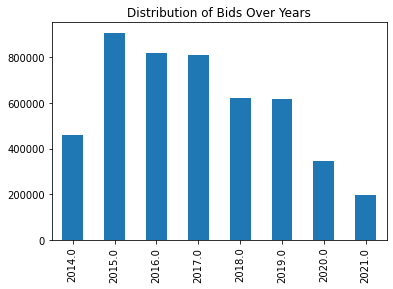

In [ ]:
import matplotlib.pyplot as plt

figure, ax = plt.subplots(1,1)
aucts = auctions[(2014 <= auctions['year']) & (auctions['year'] <= 2021)]
ax.set_xlim(2014,2022)
aucts['year'].value_counts().sort_index().plot(kind='bar', ax=ax)
ax.set_title("Distribution of Bids Over Years")

In [ ]:
auctions['date'].min()

TypeError: ignored

In [ ]:
auctions[auctions['year'] == 2016]['month'].value_counts()

12.0    79590
3.0     70751
4.0     61849
9.0     58401
11.0    57555
6.0     56668
2.0     53757
8.0     53460
5.0     52412
10.0    51809
7.0     45521
1.0     19119
Name: month, dtype: int64

In [ ]:
pd.to_datetime(auctions['date'], errors='coerce').sort_values(ascending=True).head(80)

882522    1900-01-01 00:00:00
591641    1970-01-01 14:00:01
2843559   2000-03-11 09:53:00
2036392   2001-02-06 17:12:00
1661306   2001-09-01 11:50:00
                  ...        
2831068   2014-01-13 12:45:00
1720298   2014-01-13 14:15:00
1026590   2014-01-14 10:00:00
2461581   2014-01-15 10:51:00
1014270   2014-01-16 10:40:00
Name: date, Length: 80, dtype: datetime64[ns]

In [ ]:
auctions_m['participant_inn'].nunique()

535029

In [ ]:
auctions

purchase_number               region  procurer_reg_num  \
1299922  0342100014514000002       Samarskaja_obl      3.421000e+09   
829607   0332300330514000005  Nizhegorodskaja_obl      3.323003e+09   
829606   0332300330514000005  Nizhegorodskaja_obl      3.323003e+09   
829608   0332300330514000005  Nizhegorodskaja_obl      3.323003e+09   
829609   0332300330514000005  Nizhegorodskaja_obl      3.323003e+09   
...                      ...                  ...               ...   
1239109   372100038721000088      Sankt-Peterburg      3.721000e+09   
1630161   330300005821000020     Vologodskaja_obl      3.303000e+09   
121090    373100057821000026               Moskva      3.731001e+09   
121089    373100057821000026               Moskva      3.731001e+09   
216886    342200017021000026       Samarskaja_obl      3.422000e+09   

         max_price currency          start_date            end_date  \
1299922  163463.30     None 2014-01-28 08:00:00 2014-01-31 16:00:00   
829607    95690.00     None 2014-02-10 08:00:00 2014-02-13 16:30:00   
829606    95690.00     None 2014-02-10 08:00:00 2014-02-13 16:30:00   
829608    95690.00     None 2014-02-10 08:00:00 2014-02-13 16:30:00   
829609    95690.00     None 2014-02-10 08:00:00 2014-02-13 16:30:00   
...            ...      ...                 ...                 ...   
1239109  106777.27      RUB 2021-12-31 12:18:13 2022-01-14 23:59:00   
1630161  258615.57      RUB 2021-12-31 13:20:28 2022-01-17 09:00:00   
121090   500000.00      RUB 2021-12-31 14:08:08 2022-01-14 11:00:00   
121089   500000.00      RUB 2021-12-31 14:08:08 2022-01-14 11:00:00   
216886   315720.97      RUB 2021-12-31 14:29:53 2022-01-19 11:00:00   

        prolong_date  n_commission_members  participant_inn  ...  single  \
1299922          NaN                     4       6330055841  ...    True   
829607           NaN                     5       5261068940  ...   False   
829606           NaN                     5     524300861251  ...   False   
829608           NaN                     5       5261022216  ...   False   
829609           NaN                     5       5260292548  ...   False   
...              ...                   ...              ...  ...     ...   
1239109          NaN                     3       7816363890  ...    True   
1630161          NaN                     3       3528209013  ...    True   
121090           NaN                     3       7706196090  ...   False   
121089           NaN                     3       7705513090  ...   False   
216886           NaN                     3       6311012306  ...    True   

               bid_date bid_price  con.met    won   con.win  sel_num  \
1299922 0 days 05:15:00  0.946818    False   True  0.999999        1   
829607  0 days 01:49:00  0.863118    False  False  0.000000      193   
829606  0 days 02:05:00  0.855889    False   True  0.034483       47   
829608  0 days 02:59:00  0.909290    False  False  0.000000       42   
829609  0 days 04:43:00  0.936357    False  False  0.000000      258   
...                 ...       ...      ...    ...       ...      ...   
1239109 0 days 11:29:39  0.983355     True   True  0.014052      513   
1630161 2 days 16:40:37  0.994870     True   True  0.049020      195   
121090  0 days 16:25:23  0.496226    False  False  0.000000     1913   
121089  0 days 17:24:38  0.327867    False   True  0.021277      147   
216886  1 days 01:22:02  1.000000     True   True  0.021429      191   

         sel.period  au.reserve  au.duration  
1299922           1    0.326927            3  
829607         1966    0.191380            3  
829606         2599    0.191380            3  
829608         2497    0.191380            3  
829609         2123    0.191380            3  
...             ...         ...          ...  
1239109        2775    0.213555           14  
1630161        2775    0.517231           16  
121090         2797    1.000000           13  
121089         2494    1.000000           13  
216886      

In [ ]:
auctions['single'] = auctions.groupby('auction_id')['participant_inn'].transform('count') == 1

In [ ]:
auctions.loc[auctions['price'] < 0, ['price']] = auctions[auctions['price'] < 0]['price'] * (-1)

In [ ]:
auctions[auctions['price'] < 0]['price']

Series([], Name: price, dtype: float64)

In [ ]:
from datetime import datetime
auctions['date'] = pd.to_datetime(auctions['date'], errors='coerce')
auctions['start_date'] = pd.to_datetime(auctions['start_date'], errors='coerce')
auctions['end_date'] = pd.to_datetime(auctions['end_date'], errors='coerce')
year2014 = datetime(year=2014, month=1, day=1) # create datetime for 01.01.2014
year2023 = datetime(year=2023, month=1, day=1) # create datetime for 01.01.2019
auctions = auctions[(auctions['start_date'] >= year2014) & (auctions['end_date'] < year2023)]
auctions = auctions[(auctions['max_price'] >= auctions['price']) & (auctions['price'] >= 0)]
auctions = auctions[(auctions['date'] >= auctions['start_date']) & (auctions['date'] <= auctions['end_date'])]

In [ ]:
auctions['bid_date'] = auctions['end_date'] - auctions['date']
auctions['bid_price'] = auctions['price'] / auctions['max_price']
auctions = auctions.sort_values('start_date')
auctions['con.met'] = 1
auctions['con.met'] = (auctions.groupby(['procurer_reg_num', 'participant_inn'])['con.met'].cumsum() - 1) > 0
auctions['won'] = auctions['price'] == auctions.groupby(['auction_id'])['price'].transform('min')
auctions['won'] = (auctions['price'] == auctions.groupby(['auction_id'])['price'].transform('min')) & (auctions['date'] == auctions.groupby(['auction_id', 'won'])['date'].transform('min'))
auctions = auctions[auctions.groupby('auction_id')['won'].transform('sum') == 1]
auctions['con.win'] = auctions.groupby(['participant_inn', 'procurer_reg_num'])['won'].transform('sum') / (auctions.groupby('participant_inn')['won'].transform('sum') + 1e-6)
auctions['sel_num'] = auctions.groupby('participant_inn')['auction_id'].transform('count')
auctions['sel.period'] = (auctions.groupby('participant_inn')['date'].transform('max') - auctions.groupby('participant_inn')['date'].transform('min')).dt.days + 1
auctions['au.reserve'] = auctions['max_price'] / 500000
auctions['au.duration'] = (auctions['end_date'] - auctions['start_date']).dt.days
auctions

purchase_number               region  procurer_reg_num  \
2831198  0372100010614000855      Sankt-Peterburg      3.721000e+09   
1299922  0342100014514000002       Samarskaja_obl      3.421000e+09   
829607   0332300330514000005  Nizhegorodskaja_obl      3.323003e+09   
829606   0332300330514000005  Nizhegorodskaja_obl      3.323003e+09   
829608   0332300330514000005  Nizhegorodskaja_obl      3.323003e+09   
...                      ...                  ...               ...   
1191931   328300014221000149    Vladimirskaja_obl      3.283000e+09   
1630161   330300005821000020     Vologodskaja_obl      3.303000e+09   
121090    373100057821000026               Moskva      3.731001e+09   
121089    373100057821000026               Moskva      3.731001e+09   
216886    342200017021000026       Samarskaja_obl      3.422000e+09   

          max_price currency          start_date            end_date  \
2831198   184358.83     None 2014-01-14 10:00:00 2015-01-20 11:00:00   
1299922   163463.30     None 2014-01-28 08:00:00 2014-01-31 16:00:00   
829607     95690.00     None 2014-02-10 08:00:00 2014-02-13 16:30:00   
829606     95690.00     None 2014-02-10 08:00:00 2014-02-13 16:30:00   
829608     95690.00     None 2014-02-10 08:00:00 2014-02-13 16:30:00   
...             ...      ...                 ...                 ...   
1191931  1288259.67      RUB 2021-12-31 12:32:29 2022-01-14 13:00:00   
1630161   258615.57      RUB 2021-12-31 13:20:28 2022-01-17 09:00:00   
121090    500000.00      RUB 2021-12-31 14:08:08 2022-01-14 11:00:00   
121089    500000.00      RUB 2021-12-31 14:08:08 2022-01-14 11:00:00   
216886    315720.97      RUB 2021-12-31 14:29:53 2022-01-19 11:00:00   

        prolong_date  n_commission_members  participant_inn  ...  single  \
2831198          NaN                     9       7815024550  ...    True   
1299922          NaN                     4       6330055841  ...    True   
829607           NaN                     5       5261068940  ...   False   
829606           NaN                     5     524300861251  ...   False   
829608           NaN                     5       5261022216  ...   False   
...              ...                   ...              ...  ...     ...   
1191931          NaN                     4       3327330299  ...    True   
1630161          NaN                     3       3528209013  ...    True   
121090           NaN                     3       7706196090  ...   False   
121089           NaN                     3       7705513090  ...   False   
216886           NaN                     3       6311012306  ...    True   

               bid_date bid_price  con.met    won   con.win  sel_num  \
2831198 0 days 18:17:00  1.000000    False   True  0.026316       47   
1299922 0 days 05:15:00  0.946818    False   True  0.999999        1   
829607  0 days 01:49:00  0.863118    False  False  0.000000      193   
829606  0 days 02:05:00  0.855889    False   True  0.034483       47   
829608  0 days 02:59:00  0.909290    False  False  0.000000       42   
...                 ...       ...      ...    ...       ...      ...   
1191931 1 days 22:24:06  1.000000     True   True  0.074074      291   
1630161 2 days 16:40:37  0.994870     True   True  0.049020      195   
121090  0 days 16:25:23  0.496226    False  False  0.000000     1913   
121089  0 days 17:24:38  0.327867    False   True  0.021277      147   
216886  1 days 01:22:02  1.000000     True   True  0.021429      191   

         sel.period  au.reserve  au.duration  
2831198        1324    0.368718          371  
1299922           1    0.326927            3  
829607         1966    0.191380            3  
829606         2599    0.191380            3  
829608         2497    0.191380            3  
...             ...         ...          ...  
1191931        2751    2.576519           14  
1630161        2775    0.517231           16  
121090         2797    1.000000           13  
121089         2494    1.000000           13  


In [ ]:
#auctions = auctions[auctions['max_price'] <= 500000]

In [ ]:
auctions_2017 = auctions[pd.to_datetime(auctions['date'], errors = 'coerce').dt.year == 2017]

In [ ]:
auctions_2017['date'].max()


Timestamp('2017-12-31 16:10:00')

In [ ]:
firms_issuers_gr = auctions[['procurer_reg_num', 'participant_inn']]
firms_issuers_gr

procurer_reg_num  participant_inn
0            1.233000e+09     281201818073
1            1.233000e+09       2543003150
2            1.233000e+09       2722119337
3            1.233000e+09       3849008742
4            1.233000e+09       2725098967
...                   ...              ...
3081714      3.732000e+09       7729587767
3081715      3.732005e+09       7716660956
3081716      8.732000e+09       5001058595
3081717      8.732000e+09       7707653906
3081718      5.731000e+09       6163007589

[3081134 rows x 2 columns]

In [ ]:
auctions['purchase_number'].nunique()

1546927

In [ ]:
auctions[auctions['single']]

purchase_number                          region  \
1299922  0342100014514000002                  Samarskaja_obl   
1202976  0362300034014000062               Sverdlovskaja_obl   
1177229  0158300008214000001                 Rostovskaja_obl   
2030068  0810100000314000064  Severnaja_Osetija-Alanija_Resp   
2551150  0318300241814000003              Krasnodarskij_kraj   
...                      ...                             ...   
1239109   372100038721000088                 Sankt-Peterburg   
1587464   318200041221000621              Krasnodarskij_kraj   
1191931   328300014221000149               Vladimirskaja_obl   
1630161   330300005821000020                Vologodskaja_obl   
216886    342200017021000026                  Samarskaja_obl   

         procurer_reg_num   max_price currency          start_date  \
1299922      3.421000e+09   163463.30     None 2014-01-28 08:00:00   
1202976      3.623000e+09    95320.49     None 2014-03-12 16:00:00   
1177229      1.583000e+09   450600.00     None 2014-04-03 10:00:00   
2030068      8.101000e+09   235232.91     None 2014-04-08 00:00:00   
2551150      3.183002e+09    67340.00     None 2014-04-08 13:00:00   
...                   ...         ...      ...                 ...   
1239109      3.721000e+09   106777.27      RUB 2021-12-31 12:18:13   
1587464      3.182000e+09   597600.00      RUB 2021-12-31 12:27:31   
1191931      3.283000e+09  1288259.67      RUB 2021-12-31 12:32:29   
1630161      3.303000e+09   258615.57      RUB 2021-12-31 13:20:28   
216886       3.422000e+09   315720.97      RUB 2021-12-31 14:29:53   

                   end_date prolong_date  n_commission_members  \
1299922 2014-01-31 16:00:00          NaN                     4   
1202976 2014-03-18 14:00:00          NaN                     6   
1177229 2014-04-15 10:00:00          NaN                     5   
2030068 2014-04-17 18:00:00          NaN                     4   
2551150 2014-04-14 13:00:00          NaN                     4   
...                     ...          ...                   ...   
1239109 2022-01-14 23:59:00          NaN                     3   
1587464 2022-01-14 16:30:00          NaN                     3   
1191931 2022-01-14 13:00:00          NaN                     4   
1630161 2022-01-17 09:00:00          NaN                     3   
216886  2022-01-19 11:00:00          NaN                     3   

         participant_inn  ...  single        bid_date bid_price  con.met  \
1299922       6330055841  ...    True 0 days 05:15:00  0.946818    False   
1202976       6654001275  ...    True 1 days 00:50:00  1.000000    False   
1177229       6109011932  ...    True 0 days 23:30:00  1.000000    False   
2030068       1515907465  ...    True 0 days 07:00:00  1.000000    False   
2551150       2309085910  ...    True 3 days 20:40:00  0.947431    False   
...                  ...  ...     ...             ...       ...      ...   
1239109       7816363890  ...    True 0 days 11:29:39  0.983355     True   
1587464       2312208880  ...    True 8 days 20:35:49  1.000000     True   
1191931       3327330299  ...    True 1 days 22:24:06  1.000000     True   
1630161       3528209013  ...    True 2 days 16:40:37  0.994870     True   
216886        6311012306  ...    True 1 days 01:22:02  1.000000     True   

          won   con.win  sel_num  sel.period  au.reserve  au.duration  
1299922  True  0.999999        1           1    0.326927            3  
1202976  True  0.999999        1           1    0.190641            5  
1177229  True  0.999999        1           1    0.901200           12  
2030068  True  0.400000        5         963    0.470466            9  
2551150  True  0.001802      610        1442    0.134680            6  
...       ...       ...      ...         ...         ...          ...  
1239109  True  0.014052      513        2775    0.213555           14  
1587464  True  0.500000        4        1532    1.195200           14  
1191931  True  0.074074      291        2751    2

In [ ]:
auctions = auctions[((auctions['au.duration'] <= 24) & (auctions['end_date'].dt.year != 2020)) | ((auctions['au.duration'] <= 53) & (auctions['end_date'].dt.year == 2020))]

In [ ]:
gr = auctions[['participant_inn', 'auction_id']]
gr

participant_inn  auction_id
0            -6330055841      603230
1            -5261068940      373737
2          -524300861251      373737
3            -5261022216      373737
4            -5260292548      373737
...                  ...         ...
3375723      -3327330299     6007017
3375724      -3528209013     6013847
3375725      -7706196090     6076020
3375726      -7705513090     6076020
3375727      -6311012306     5994104

[3375728 rows x 2 columns]

In [ ]:
auctions.columns

Index(['purchase_number', 'region', 'procurer_reg_num', 'max_price',
       'currency', 'start_date', 'end_date', 'prolong_date',
       'n_commission_members', 'participant_inn', 'price', 'date',
       'is_approved', 'is_after_prolong', 'auction_id', 'Unnamed: 0', 'code_1',
       'code_2', 'code_3', 'code_4', 'name', 'object', 'Unnamed: 0_y',
       'auction_id_y', 'start_date_y', 'code_1_y', 'code_2_y', 'code_3_y',
       'code_4_y', 'if_okpd2', 'name_y', 'single', 'bid_date', 'bid_price',
       'con.met', 'won', 'con.win', 'sel_num', 'sel.period', 'au.reserve',
       'au.duration'],
      dtype='object')

In [ ]:
gr_2017 = auctions_2017[['participant_inn', 'auction_id']]
gr_2017

participant_inn  auction_id
1385          2816003585         768
1386          2801002973         769
1387          2801193816         769
1388        280102545627         769
1389          2801146735         770
...                  ...         ...
3080453       7703801991     1444225
3080491       4401125861     1444242
3080600     501604098690     1444298
3080601       7106525843     1444298
3080629       7710026574     1444307

[637124 rows x 2 columns]

In [ ]:
gr_obj = auctions_obj[['participant_inn', 'auction_id']]
gr_obj

participant_inn  auction_id
0             2901240562     3118693
1           290602504061     3118767
2           290602504061     3118767
3           290602504061     3118767
4           290602504061     3118767
...                  ...         ...
1698318       7709909310     3972862
1698319     231294252879     3972942
1698320     231294252879     3972942
1698321     231294252879     3972942
1698322       7714511476     3972996

[1347899 rows x 2 columns]

In [ ]:
import networkx as nx


In [ ]:
gr = gr.dropna()

In [ ]:
gr_2017 = gr_2017.dropna()

In [ ]:
gr_obj = gr_obj.dropna()

In [ ]:
gr

participant_inn  auction_id
1             2543003150           0
2             2722119337           0
3             3849008742           0
4             2725098967           0
5             2724172167           0
...                  ...         ...
1817008       7203304007     3910613
1817009       7203390550     3910613
1817010       6684030280     3910613
1817011       7202153394     3910613
1817012       6623074749     3910613

[3860578 rows x 2 columns]

In [ ]:
gr['participant_inn'] = - gr['participant_inn']

In [ ]:
gr_2017['participant_inn'] = - gr_2017['participant_inn']

In [ ]:
gr_obj['participant_inn'] = - gr_obj['participant_inn']
gr_obj['auction_id'] = gr_obj['auction_id'] + 1

NameError: ignored

In [ ]:
gr['auction_id'] = gr['auction_id'] + 1

In [ ]:
gr_2017['auction_id'] = gr_2017['auction_id'] + 1

In [ ]:
G_a = nx.from_pandas_edgelist(gr, 'participant_inn', 'auction_id', create_using=nx.Graph())

In [ ]:
bipartite

In [ ]:
firms_issuers_gr = firms_issuers_gr.dropna()

NameError: ignored

In [ ]:
firms_issuers_gr['participant_inn'] = - firms_issuers_gr['participant_inn']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
G = nx.from_pandas_edgelist(firms_issuers_gr, 'participant_inn', 'procurer_reg_num', create_using=nx.Graph())

In [ ]:
from networkx.algorithms.community.centrality import girvan_newman

communities = girvan_newman(G)
#print(len(communities))
node_groups = []
for com in next(communities):
    node_groups.append(list(com))
    
#print(node_groups)

In [ ]:
pip install cdlib

In [ ]:
import cdlib

In [ ]:
from cdlib import algorithms

Note: to be able to use all crisp methods, you need to install some additional packages:  {'karateclub', 'leidenalg', 'graph_tool', 'wurlitzer', 'infomap'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'karateclub', 'ASLPAw'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'leidenalg', 'wurlitzer', 'infomap'}


In [ ]:
from cdlib import evaluation

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(firms_issuers_gr, train_size = 0.75)

In [ ]:
train

procurer_reg_num  participant_inn
314590       3.243001e+09      -2901101706
2908824      1.731000e+09      -5000001388
2898667      1.732000e+09    -332502414373
2946769      1.731000e+09      -7716777016
1046396      3.513001e+09      -7453285163
...                   ...              ...
2397245      3.872000e+09    -860100160015
1758288      3.313001e+09    -366605330837
2831799      3.721000e+09      -7842413611
1227400      3.583001e+09      -6143061010
1795351      3.681000e+09      -7326035481

[2310741 rows x 2 columns]

In [ ]:
G_tr =  nx.from_pandas_edgelist(train, 'participant_inn', 'procurer_reg_num', create_using=nx.Graph())

In [ ]:
pip install python-louvain

In [ ]:
from importlib import reload
reload(community)

<module 'community' from '/usr/local/lib/python3.7/dist-packages/community/__init__.py'>

In [ ]:
import community as community_louvain

In [ ]:
pip install python-louvain

In [ ]:
# !pip uninstall cdlib
# !pip uninstall networkx
# !pip uninstall python-louvain
# !pip uninstall community
# !pip install python-louvain
# !pip install networkx
# !pip install cdlib

# from cdlib import algorithms
# import networkx as nx
#G = nx.karate_club_graph()
coms = algorithms.louvain(G_b, resolution=1., randomize=False)
print(coms)


In [ ]:
from cdlib import evaluation
mod4 = evaluation.newman_girvan_modularity(G_b,coms)
mod4

FitnessResult(min=None, max=None, score=0.8932346774016792, std=None)

In [ ]:
from cdlib import evaluation
cond1 = evaluation.conductance(G_b,coms)

In [ ]:
cond1

FitnessResult(min=0.0, max=0.19857795835449465, score=0.000651562100901977, std=0.007267913937323121)

In [ ]:
print(len(coms.communities))

95758


In [ ]:
print(len(coms.communities[0]))

189048


In [ ]:
lengs = [len(c) for c in coms.commun]

Выходные данные были обрезаны до нескольких последних строк (5000).
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [ ]:
print([len(c) for c in coms.communities[0:100]])

[189048, 123051, 84621, 77355, 73555, 69269, 47179, 42123, 36569, 36527, 35746, 35682, 34926, 32118, 31228, 30162, 28957, 28796, 28585, 27556, 26953, 25872, 24431, 23209, 23147, 22467, 21793, 21559, 20654, 20349, 19969, 19515, 19406, 19397, 17724, 17665, 17638, 17465, 17357, 17105, 16599, 15790, 14455, 13998, 13871, 13253, 12314, 10559, 10211, 10125, 9996, 9924, 9686, 9472, 9223, 8936, 7960, 7925, 7872, 7843, 7705, 7455, 7101, 6989, 6748, 6576, 5993, 5691, 5542, 5535, 5510, 4918, 4771, 4722, 4702, 4368, 4236, 4206, 4204, 3923, 3832, 3499, 3483, 3368, 3365, 3098, 2935, 2814, 2713, 2679, 2623, 2615, 2599, 2508, 2188, 1924, 1860, 1855, 1688, 1688]


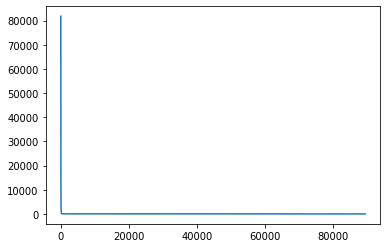

In [ ]:
import matplotlib.pyplot as plt
lengths = [len(c) for c in coms.communities]
plt.plot(lengths)

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities
coms_2 = algorithms.bimlpa(smallG)
coms_2
mod5 = evaluation.newman_girvan_modularity(smallG,coms_2)
print(mod5)
cond2 = evaluation.conductance(smallG,coms_2)
cond2

NameError: ignored

In [ ]:
len(coms_2.communities)

488559

In [ ]:
from networkx.algorithms import bipartite
print(bipartite.is_bipartite(G_a))

True


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
lens = [len(c) for c in coms_2.communities]
lens2 = [lens[i] for i in range(len(lens)) if lens[i] != 0]
counter = {}
for l in lens:
  counter[l] = counter.get(l, 0) + 1
counter

{0: 34307,
 1: 269556,
 2: 81246,
 3: 32628,
 4: 17441,
 5: 10774,
 6: 7084,
 7: 5523,
 8: 4296,
 9: 3163,
 10: 2509,
 11: 2118,
 12: 1796,
 13: 1474,
 14: 1198,
 15: 1073,
 16: 941,
 17: 806,
 18: 681,
 19: 605,
 20: 571,
 21: 506,
 22: 466,
 23: 416,
 24: 378,
 25: 328,
 26: 292,
 27: 257,
 28: 259,
 29: 259,
 30: 230,
 31: 190,
 32: 194,
 33: 182,
 34: 185,
 35: 176,
 36: 165,
 37: 156,
 38: 126,
 39: 110,
 40: 120,
 41: 109,
 42: 94,
 43: 94,
 44: 94,
 45: 82,
 46: 84,
 47: 77,
 48: 81,
 49: 64,
 50: 67,
 51: 73,
 52: 58,
 53: 67,
 54: 57,
 55: 54,
 56: 51,
 57: 57,
 58: 49,
 59: 62,
 60: 66,
 61: 48,
 62: 35,
 63: 46,
 64: 45,
 65: 40,
 66: 41,
 67: 35,
 68: 34,
 69: 37,
 70: 37,
 71: 39,
 72: 36,
 73: 18,
 74: 38,
 75: 28,
 76: 31,
 77: 20,
 78: 20,
 79: 26,
 80: 27,
 81: 25,
 82: 20,
 83: 31,
 84: 13,
 85: 27,
 86: 25,
 87: 15,
 88: 36,
 89: 22,
 90: 16,
 91: 11,
 92: 20,
 93: 19,
 94: 11,
 95: 16,
 96: 21,
 97: 21,
 98: 12,
 99: 12,
 100: 18,
 101: 13,
 102: 15,
 103: 23,
 104:

In [ ]:
!pip install infomap

     |████████████████████████████████| 302 kB 5.2 MB/s 
  Created wheel for infomap: filename=infomap-2.3.0-cp37-cp37m-linux_x86_64.whl size=6042494 sha256=ce51d4676f0ff5b132d0874cf0565dbd9acdf53ef273b888e08342d42e1370c3
  Stored in directory: /root/.cache/pip/wheels/86/44/89/1bf31dc5c68227c8ad1d470a0caf548b31de1bcbcc36dc5e5e
Successfully built infomap


In [ ]:
!pip install wurlitzer

In [ ]:
coms_3 = algorithms.infomap_bipartite(G_b)
coms_3
cond3 = evaluation.conductance(G_b,coms_3)
print(cond3)
print(cdlib.evaluation.newman_girvan_modularity(G_b, coms_3))
print(len(coms_3.communities))
print(len(coms_3.communities[0]))

AmbiguousSolution: ignored

In [ ]:
mod = cdlib.evaluation.modularity_density(smallG,coms_3)
mod

FitnessResult(min=None, max=None, score=1121.3463717522204, std=None)

In [ ]:
mod2 = cdlib.evaluation.newman_girvan_modularity(smallG, coms_3)

In [ ]:
mod2

In [ ]:
mod3 = nx.algorithms.community.quality.modularity(smallG, coms_3.communities)

In [ ]:
mod3

0.7757741356481828

In [ ]:
len(coms_3.communities)

452

In [ ]:
for i in coms_3.communities:
  print(len(i))

497107
51807
34213
27772
26710
26393
20252
20118
19371
16347
15106
15013
13996
13462
13091
11427
11017
10849
9735
8447
8224
7837
7817
7595
7548
7115
6952
6632
6582
6553
6528
6451
6156
6140
6107
6071
5968
5875
5826
5812
5800
5783
5719
5427
5422
5356
5316
5274
5204
5000
4948
4873
4819
4735
4511
4496
4461
4301
4287
3952
3949
3856
3794
3740
3715
3650
3641
3619
3505
3345
3341
3301
3266
3219
3208
3175
3128
3010
2908
2812
2779
2764
2711
2692
2652
2594
2552
2513
2488
2485
2480
2460
2458
2432
2406
2354
2353
2323
2188
2151
2072
2055
2032
1947
1871
1801
1710
1707
1700
1692
1645
1635
1627
1626
1620
1590
1570
1563
1537
1529
1518
1499
1461
1453
1427
1413
1409
1398
1384
1379
1374
1330
1327
1284
1284
1269
1269
1263
1221
1216
1188
1175
1173
1159
1153
1125
1088
1078
1056
1012
986
977
956
948
940
936
931
927
925
891
883
861
844
839
838
836
811
805
801
801
794
791
785
777
772
749
743
739
675
667
643
640
639
615
611
609
599
593
588
569
559
554
552
551
545
537
536
532
528
528
525
519
515
515
492
489
487
485

In [ ]:
# !pip uninstall cdlib
# !pip uninstall networkx
# !pip uninstall python-louvain
# !pip uninstall community
# !pip install python-louvain
# !pip install networkx
# !pip install cdlib

# from cdlib import algorithms
# import networkx as nx
#G = nx.karate_club_graph()
coms_4 = algorithms.louvain(smallG, resolution=1., randomize=False)
print(coms_4)


In [ ]:
auctions['purchase_number'].nunique()

1537216

In [ ]:
from cdlib import evaluation

In [ ]:
cond4 = evaluation.conductance(smallG,coms_4)
cond4

FitnessResult(min=0.0009956853634251576, max=0.14777810049375545, score=0.036845787422114334, std=0.026461388666344485)

In [ ]:
import cdlib
mod4 = cdlib.evaluation.newman_girvan_modularity(smallG, coms_4)
mod4

FitnessResult(min=None, max=None, score=0.9122597045781365, std=None)

In [ ]:
len(coms_4.communities)

395

In [ ]:
for c in coms_4.communities:
  print(len(c))

51062
48938
46195
42996
41136
40985
40442
34204
28003
27645
26633
26554
26298
25961
25254
25039
23503
23421
23190
23054
20819
20406
19717
18095
17475
17243
16398
15129
15125
15027
14837
14071
14054
13753
13517
13147
12442
12285
11949
11737
11653
11344
11072
10575
10473
10438
10187
9535
8593
8570
8395
7745
7333
7016
6820
6719
6707
6619
6571
6545
6161
6079
5605
5540
5535
5427
5343
5234
4924
4846
4653
4445
4353
4234
4220
4189
4160
4142
4140
3807
3799
3576
3460
3368
3295
3253
3228
3152
3092
3056
3006
2986
2950
2908
2883
2868
2846
2823
2678
2663
2615
2544
2507
2367
2325
2319
2239
2218
2201
2158
2027
1986
1853
1850
1825
1707
1703
1569
1448
1423
1408
1356
1355
1318
1314
1271
1154
1152
1147
1129
1045
923
915
915
902
867
861
843
734
516
473
448
437
435
429
429
394
363
341
332
331
329
303
302
297
294
231
225
214
211
206
201
201
197
196
195
184
167
164
161
161
159
153
152
149
149
142
139
136
135
135
132
128
127
126
126
123
123
122
119
115
113
109
109
109
107
106
104
104
103
102
102
100
98
97
96
9

In [ ]:
coms_5 = algorithms.bimlpa(G_b)
mod5 = cdlib.evaluation.newman_girvan_modularity(G_b, coms_5)
print(mod5)

cond5 = evaluation.conductance(G_b,coms_5)
cond5

FitnessResult(min=None, max=None, score=-0.003781711958026167, std=None)


FitnessResult(min=0, max=1.0, score=0.9255377517999709, std=0.2625216596645435)

In [ ]:
coms_5 = algorithms.bimlpa(G_b)
print(len(coms_5.communities))
print(len(coms_5.communities[0]))

535762
78646


In [ ]:
gr_no_single = gr[gr.groupby('auction_id')['auction_id'].transform('size') > 1]
gr_no_single

NameError: ignored

In [ ]:
gr_no_single['auction_id'].value_counts()

171773     86
261890     84
173307     76
172385     75
261853     74
           ..
618973      2
618970      2
618968      2
618965      2
1444717     2
Name: auction_id, Length: 648171, dtype: int64

In [ ]:
G_c = nx.Graph()
G_c.add_nodes_from(gr_no_single['auction_id'], bipartite=0)
G_c.add_nodes_from(gr_no_single['participant_inn'], bipartite=1)
G_c.add_edges_from([(row['auction_id'], row['participant_inn']) for idx, row in gr_no_single.iterrows()])
len(G_c)

1002768

In [ ]:
nx.is_connected(G_c)

False

In [ ]:
comps2 = [len(c) for c in sorted(nx.connected_components(G_c), key=len, reverse=True)]
comps2
print(len(comps2))

20051


In [ ]:
comps2[-1]

3

In [ ]:
len(coms_5.communities)

299484

In [ ]:
!pip uninstall cdlib
!pip uninstall networkx
!pip uninstall python-louvain
!pip uninstall community
!pip install python-louvain
!pip install networkx
!pip install cdlib

from cdlib import algorithms
import networkx as nx
#G = nx.karate_club_graph()
coms_6 = algorithms.louvain(G_c, resolution=1., randomize=False)
print(coms_6)

Found existing installation: networkx 2.6.3
Uninstalling networkx-2.6.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/networkx-2.6.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/networkx/*
    /usr/local/share/doc/networkx-2.6.3/LICENSE.txt
    /usr/local/share/doc/networkx-2.6.3/examples/3d_drawing/README.txt
    /usr/local/share/doc/networkx-2.6.3/examples/3d_drawing/mayavi2_spring.py
    /usr/local/share/doc/networkx-2.6.3/examples/3d_drawing/plot_basic.py
    /usr/local/share/doc/networkx-2.6.3/examples/README.txt
    /usr/local/share/doc/networkx-2.6.3/examples/algorithms/README.txt
    /usr/local/share/doc/networkx-2.6.3/examples/algorithms/WormNet.v3.benchmark.txt
    /usr/local/share/doc/networkx-2.6.3/examples/algorithms/hartford_drug.edgelist
    /usr/local/share/doc/networkx-2.6.3/examples/algorithms/plot_beam_search.py
    /usr/local/share/doc/networkx-2.6.3/examples/algorithms/plot_betweenness_centrality.py
    /usr/local/share/doc/networkx-2.6.3/ex

     |████████████████████████████████| 227 kB 4.9 MB/s 
     |████████████████████████████████| 14.2 MB 29.8 MB/s 
     |████████████████████████████████| 2.6 MB 34.5 MB/s 
     |████████████████████████████████| 62 kB 581 kB/s 
     |████████████████████████████████| 1.4 MB 41.7 MB/s 
     |████████████████████████████████| 50 kB 4.7 MB/s 
     |████████████████████████████████| 299 kB 54.5 MB/s 
     |████████████████████████████████| 1.8 MB 36.1 MB/s 
     |████████████████████████████████| 24.1 MB 9.5 kB/s 
     |████████████████████████████████| 3.1 MB 46.4 MB/s 
  Created wheel for infomap: filename=infomap-2.1.0-cp37-cp37m-linux_x86_64.whl size=5939819 sha256=64d01f909ce0e30517af30b31f39c692db711c632fc81e64e409c8d0f94c2ecb
  Stored in directory: /root/.cache/pip/wheels/aa/d0/05/420738292f376442e6408d5bc13b8bb74cf4c59330f21e1221
  Created wheel for karateclub: filename=karateclub-1.2.3-py3-none-any.whl size=97754 sha256=188cf78e81e796b4e7f4f71d25570fd69a25135df10baed7488a0710d41

In [ ]:
len(coms_6.communities)

20379

In [ ]:
lenss = [len(i) for i in coms_6.communities]
max(lenss)

59531

In [ ]:
import cdlib

In [ ]:
mod6 = cdlib.evaluation.newman_girvan_modularity(G_c, coms_6)
mod6

FitnessResult(min=None, max=None, score=0.9034167945811252, std=None)

In [ ]:
pip install karateclub

     |████████████████████████████████| 62 kB 483 kB/s 
     |████████████████████████████████| 1.8 MB 9.5 MB/s 
     |████████████████████████████████| 24.1 MB 3.1 MB/s 
  Created wheel for karateclub: filename=karateclub-1.2.3-py3-none-any.whl size=97754 sha256=ce565d91e0e41fcf3b69bd38a2c5ff83fa96c6cb9d0e1ec380161ad98e8bf10e
  Stored in directory: /root/.cache/pip/wheels/7a/09/80/0d50455fd4e297e88f8f38a711c6f4849e6bd1a330000dde3d
Successfully built karateclub
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
coms_7 = algorithms.ego_networks(G_b)
coms_7

In [ ]:
len(coms_7.communities[0])

9521

In [ ]:
len(coms_7.communities)

2258149

In [ ]:
mod7 = cdlib.evaluation.newman_girvan_modularity(G_b, coms_7)
mod7

FitnessResult(min=None, max=None, score=0.1283467600748314, std=None)

In [ ]:
cond7 = cdlib.evaluation.conductance(G_b, coms_7)
cond7

FitnessResult(min=0.0, max=0.9997899380317193, score=0.7528505136190506, std=0.2909743902021932)

In [ ]:
coms_11 = algorithms.ego_networks(smallG)
coms_11

In [ ]:
len(coms_11.communities)

1751815

In [ ]:
coms_7.communities == coms_11.communities

False

In [ ]:
len(coms_11.communities[0])

8980

In [ ]:
mod11 = cdlib.evaluation.newman_girvan_modularity(smallG, coms_11)
mod11

FitnessResult(min=None, max=None, score=0.11340509952703716, std=None)

In [ ]:
cond7 = cdlib.evaluation.conductance(smallG, coms_11)
cond7

FitnessResult(min=0.0031545741324921135, max=0.9997772828507795, score=0.8168361504115034, std=0.21158939456727988)

In [ ]:
# !pip uninstall cdlib
# !pip uninstall networkx
# !pip uninstall python-louvain
# !pip uninstall community
# !pip install python-louvain
# !pip install networkx
# !pip install cdlib

# from cdlib import algorithms
# import networkx as nx

coms_12 = algorithms.label_propagation(G_b)
coms_12

In [ ]:
len(coms_12.communities)

321598

In [ ]:
len(coms_12.communities[0])

14772

In [ ]:
mod12 = cdlib.evaluation.newman_girvan_modularity(G_b, coms_12)
mod12

FitnessResult(min=None, max=None, score=0.6485582195501403, std=None)

In [ ]:
cond12 = cdlib.evaluation.conductance(G_b, coms_12)
cond12

FitnessResult(min=0.0, max=0.9285714285714286, score=0.30592793274182645, std=0.23600992428382278)

In [ ]:

coms_13 = algorithms.label_propagation(smallG)
coms_13

In [ ]:
len(coms_13.communities)

219193

In [ ]:
len(coms_13.communities[0])

14772

In [ ]:
mod13 = cdlib.evaluation.newman_girvan_modularity(smallG, coms_13)
mod13

FitnessResult(min=None, max=None, score=0.6270082221648056, std=None)

In [ ]:
cond13 = cdlib.evaluation.conductance(smallG, coms_13)
cond13

FitnessResult(min=0.002553574441757129, max=0.9285714285714286, score=0.42650844784126757, std=0.17236267611976142)

In [ ]:
coms_l_1 = [algorithms.louvain(G_b), algorithms.label_propagation(G_b)]
coms_14 = algorithms.endntm(G_b, coms_l_1)
coms_14

NameError: ignored

In [ ]:
!pip install infomap

     |████████████████████████████████| 302 kB 1.8 MB/s 
  Created wheel for infomap: filename=infomap-2.3.0-cp37-cp37m-linux_x86_64.whl size=6031907 sha256=0d8ecafdde34854be1bdf4735cae1f129bd1f3011ff6bf98e61996792b09da77
  Stored in directory: /root/.cache/pip/wheels/86/44/89/1bf31dc5c68227c8ad1d470a0caf548b31de1bcbcc36dc5e5e
Successfully built infomap


In [ ]:
!pip install wurlitzer

In [ ]:
coms_5 = algorithms.infomap_bipartite(G_b)
coms_5

In [ ]:
len(coms_14.communities)

95460

In [ ]:
len(coms_14.communities[0])

129522

In [ ]:
mod14 = cdlib.evaluation.newman_girvan_modularity(G_b, coms_14)
mod14

FitnessResult(min=None, max=None, score=0.8801974075325646, std=None)

In [ ]:
cond14 = cdlib.evaluation.conductance(G_b, coms_14)
cond14

FitnessResult(min=0.0, max=0.2335083568182919, score=0.0003470738193716909, std=0.004927499855282671)

In [ ]:
coms_l_2 = [algorithms.louvain(G_b), algorithms.bimlpa(G_b)]
coms_15 = algorithms.endntm(G_b, coms_l_2)
coms_15

In [ ]:
len(coms_15.communities)

89354

In [ ]:
len(coms_15.communities[0])

77677

In [ ]:
mod15 = cdlib.evaluation.newman_girvan_modularity(G_b, coms_15)
mod15

FitnessResult(min=None, max=None, score=0.9120781281420167, std=None)

In [ ]:
cond15 = cdlib.evaluation.conductance(G_b, coms_15)
cond15

FitnessResult(min=0.0, max=0.3710532440329963, score=0.00015584874128510436, std=0.0035218954916297774)

In [ ]:
coms_l_3 = [algorithms.label_propagation(G_b), algorithms.bimlpa(G_b)]
coms_16 = algorithms.endntm(G_b, coms_l_3)
coms_16
print(len(coms_16.communities))
print(len(coms_16.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(G_b, coms_16))
print(cdlib.evaluation.conductance(G_b, coms_16))

288355
10329
FitnessResult(min=None, max=None, score=0.6034010584398785, std=None)
FitnessResult(min=0.0, max=0.9568345323741008, score=0.2654319402685733, std=0.21403251445331872)


In [ ]:
coms_l_4 = [algorithms.louvain(G_b), algorithms.label_propagation(G_b), algorithms.bimlpa(G_b)]
coms_17 = algorithms.endntm(G_b, coms_l_4)
coms_17
print(len(coms_17.communities))
print(len(coms_17.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(G_b, coms_17))
print(cdlib.evaluation.conductance(G_b, coms_17))


89464
98125
FitnessResult(min=None, max=None, score=0.911984865015375, std=None)
FitnessResult(min=0.0, max=0.18923651895355045, score=0.00023032903148811532, std=0.003951145565326324)


In [ ]:
coms_l_5 = [algorithms.louvain(smallG), algorithms.label_propagation(smallG)]
coms_18 = algorithms.endntm(smallG, coms_l_5)
coms_18
print(len(coms_18.communities))
print(len(coms_18.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallG, coms_18))
print(cdlib.evaluation.conductance(smallG, coms_18))

441
74923
FitnessResult(min=None, max=None, score=0.9022025486780515, std=None)
FitnessResult(min=0.0009937065253395165, max=0.2147309648552526, score=0.04001645939665182, std=0.036274800117743616)


In [ ]:
coms_l_6 = [algorithms.louvain(smallG), algorithms.bimlpa(smallG)]
coms_19 = algorithms.endntm(smallG, coms_l_6)
coms_19
print(len(coms_19.communities))
print(len(coms_19.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallG, coms_19))
print(cdlib.evaluation.conductance(smallG, coms_19))

498
89769
FitnessResult(min=None, max=None, score=0.9028130227390556, std=None)
FitnessResult(min=0.0009937065253395165, max=0.23811859937450175, score=0.044949467847686476, std=0.033919247335641854)


In [ ]:
coms_l_7 = [algorithms.louvain(smallG), algorithms.infomap_bipartite(smallG)]
coms_20 = algorithms.endntm(smallG, coms_l_7)
coms_20
print(len(coms_20.communities))
print(len(coms_20.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallG, coms_20))
print(cdlib.evaluation.conductance(smallG, coms_20))

368
52880
FitnessResult(min=None, max=None, score=0.90176004867615, std=None)
FitnessResult(min=0.0009937065253395165, max=0.2135644682954385, score=0.039408529584790235, std=0.039389859994602046)


In [ ]:
coms_l_8 = [algorithms.label_propagation(smallG), algorithms.bimlpa(smallG)]
coms_21 = algorithms.endntm(smallG, coms_l_8)
coms_21
print(len(coms_21.communities))
print(len(coms_21.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallG, coms_21))
print(cdlib.evaluation.conductance(smallG, coms_21))

In [ ]:
coms_l_9 = [algorithms.label_propagation(smallG), algorithms.infomap_bipartite(smallG)]
coms_22 = algorithms.endntm(smallG, coms_l_9)
coms_22
print(len(coms_22.communities))
print(len(coms_22.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallG, coms_22))
print(cdlib.evaluation.conductance(smallG, coms_22))

465
570163
FitnessResult(min=None, max=None, score=0.758295971198872, std=None)
FitnessResult(min=0.0009937065253395165, max=0.22982499210886262, score=0.054949082503314935, std=0.0399303615832562)


In [ ]:
coms_l_10 = [algorithms.bimlpa(smallG), algorithms.infomap_bipartite(smallG)]
coms_23 = algorithms.endntm(smallG, coms_l_10)
coms_23
print(len(coms_23.communities))
print(len(coms_23.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallG, coms_23))
print(cdlib.evaluation.conductance(smallG, coms_23))

465
570163
FitnessResult(min=None, max=None, score=0.758295971198872, std=None)
FitnessResult(min=0.0009937065253395165, max=0.22982499210886262, score=0.054949082503314935, std=0.0399303615832562)


In [ ]:
from multiprocessing import Process

def res_endntm(G, arr):
  coms = algorithms.endntm(G, arr)
  print(len(coms.communities))
  print(len(coms.communities[0]))
  print(cdlib.evaluation.newman_girvan_modularity(G, coms))
  print(cdlib.evaluation.conductance(G, coms))

if __name__ == '__main__':
 # argss = [[algorithms.louvain(smallG), coms_l_9[0], coms_l_10[0]], [algorithms.louvain(smallG)] + coms_l_9]
  for a in argss:
    proc = Process(target=res_endntm, args=(smallG,a,))
    proc.start()
    proc.join()


436
83004
FitnessResult(min=None, max=None, score=0.9014363144274743, std=None)
FitnessResult(min=0.0009937065253395165, max=0.3611895834403411, score=0.04300291944136642, std=0.03847237503880196)
514
89856
FitnessResult(min=None, max=None, score=0.9024231780927993, std=None)
FitnessResult(min=0.0009937065253395165, max=0.220954447198182, score=0.04384694917463349, std=0.03383976608223803)


In [ ]:
coms_l_11 =[argss[0][0]] + coms_l_10[0]
coms_24 = algorithms.endntm(smallG, coms_l_11)
coms_24
print(len(coms_24.communities))
print(len(coms_24.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallG, coms_24))
print(cdlib.evaluation.conductance(smallG, coms_24))

436
83004
FitnessResult(min=None, max=None, score=0.9014363144274743, std=None)
FitnessResult(min=0.0009937065253395165, max=0.3611895834403411, score=0.04300291944136642, std=0.03847237503880196)


In [ ]:
coms_l_12 = coms_l_9 + [coms_l_10[0]]
coms_25 = algorithms.endntm(smallG, coms_l_12)
coms_25
print(len(coms_25.communities))
print(len(coms_25.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallG, coms_25))
print(cdlib.evaluation.conductance(smallG, coms_25))

465
570163
FitnessResult(min=None, max=None, score=0.758295971198872, std=None)
FitnessResult(min=0.0009937065253395165, max=0.22982499210886262, score=0.054949082503314935, std=0.0399303615832562)


In [ ]:
!pip install leidenalg

In [ ]:
coms_26 = algorithms.leiden(smallG)
print(len(coms_26.communities))
print(len(coms_26.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallG, coms_26))
print(cdlib.evaluation.conductance(smallG, coms_26))

773
106845
FitnessResult(min=None, max=None, score=0.9074054456913864, std=None)
FitnessResult(min=0.0015313935681470138, max=0.15384615384615385, score=0.03887938641310912, std=0.0265359163075685)


In [ ]:
len(coms_26.communities)

543

In [ ]:
len(coms_26.communities[0])

59954

In [ ]:
print(cdlib.evaluation.newman_girvan_modularity(smallG, coms_26))
print(cdlib.evaluation.conductance(smallG, coms_26))

FitnessResult(min=None, max=None, score=0.9245255264300255, std=None)
FitnessResult(min=0.0009937065253395165, max=0.14701492537313432, score=0.02918648995037611, std=0.023101617925685977)


In [ ]:
coms_l_13 = [argss[0][0]] + coms_l_12
coms_26 = algorithms.endntm(smallG, coms_l_13)
coms_26
print(len(coms_26.communities))
print(len(coms_26.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallG, coms_26))
print(cdlib.evaluation.conductance(smallG, coms_26))

436
83004
FitnessResult(min=None, max=None, score=0.9014363144274743, std=None)
FitnessResult(min=0.0009937065253395165, max=0.3611895834403411, score=0.04300291944136642, std=0.03847237503880196)


In [ ]:
coms_l_14 = [coms_26] + [algorithms.louvain(smallG)]
coms_27 = algorithms.endntm(smallG, coms_l_14)
coms_27
print(len(coms_27.communities))
print(len(coms_27.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallG, coms_27))
print(cdlib.evaluation.conductance(smallG, coms_27))

543
66899
FitnessResult(min=None, max=None, score=0.912131030170231, std=None)
FitnessResult(min=0.0009937065253395165, max=0.2926777912301942, score=0.033352914696046815, std=0.03375733373299316)


In [ ]:
coms_l_15 = [algorithms.label_propagation(smallG), algorithms.leiden(smallG)]
coms_28= algorithms.endntm(smallG, coms_l_15)
coms_28
print(len(coms_28.communities))
print(len(coms_28.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallG, coms_28))
print(cdlib.evaluation.conductance(smallG, coms_28))

498
58907
FitnessResult(min=None, max=None, score=0.9106850562749335, std=None)
FitnessResult(min=0.0009937065253395165, max=0.2829075557479974, score=0.033163111572924155, std=0.033880202742036056)


In [ ]:
coms_l_16 = [algorithms.bimlpa(smallG)] +  [coms_l_15[1]]
coms_29 = algorithms.endntm(smallG, coms_l_16)
coms_29
print(len(coms_29.communities))
print(len(coms_29.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallG, coms_29))
print(cdlib.evaluation.conductance(smallG, coms_29))

498
58907
FitnessResult(min=None, max=None, score=0.9106850562749335, std=None)
FitnessResult(min=0.0009937065253395165, max=0.2829075557479974, score=0.033163111572924155, std=0.033880202742036056)


In [ ]:
coms_l_17 = [algorithms.infomap_bipartite(smallG), algorithms.leiden(smallG)]
coms_30 = algorithms.endntm(smallG, coms_l_17)
coms_30
print(len(coms_30.communities))
print(len(coms_30.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallG, coms_30))
print(cdlib.evaluation.conductance(smallG, coms_30))

559
66227
FitnessResult(min=None, max=None, score=0.9111289944873969, std=None)
FitnessResult(min=0.0009937065253395165, max=0.35148514851485146, score=0.03405860309930481, std=0.034481112248080634)


In [ ]:
#coms_l_18 = [algorithms.louvain(smallG), algorithms.label_propagation(smallG), algorithms.leiden(smallG)]
coms_31 = algorithms.endntm(smallG, coms_l_18)
coms_31
print(len(coms_31.communities))
print(len(coms_31.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallG, coms_31))
print(cdlib.evaluation.conductance(smallG, coms_31))

542
56657
FitnessResult(min=None, max=None, score=0.913669252863575, std=None)
FitnessResult(min=0.0009937065253395165, max=0.19886694992918438, score=0.03177365669429875, std=0.03134165378975561)


In [ ]:
coms_l_19 = [algorithms.louvain(smallG), algorithms.bimlpa(smallG), algorithms.leiden(smallG)]
coms_32 = algorithms.endntm(smallG, coms_l_19)
coms_32
print(len(coms_32.communities))
print(len(coms_32.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallG, coms_32))
print(cdlib.evaluation.conductance(smallG, coms_32))

512
53764
FitnessResult(min=None, max=None, score=0.9116190831366361, std=None)
FitnessResult(min=0.0009937065253395165, max=0.3154227625948184, score=0.031637967753649285, std=0.032337286797556916)


In [ ]:
coms_l_20 = [algorithms.label_propagation(smallG), algorithms.bimlpa(smallG), algorithms.leiden(smallG)]
coms_33 = algorithms.endntm(smallG, coms_l_20)
coms_33
print(len(coms_33.communities))
print(len(coms_33.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallG, coms_33))
print(cdlib.evaluation.conductance(smallG, coms_33))

540
66023
FitnessResult(min=None, max=None, score=0.9112231238717812, std=None)
FitnessResult(min=0.0009937065253395165, max=0.221561204254552, score=0.03273141930329961, std=0.03134034773654247)


In [ ]:
coms_l_21 = [algorithms.label_propagation(smallG), algorithms.infomap_bipartite(smallG), algorithms.leiden(smallG)]
coms_34 = algorithms.endntm(smallG, coms_l_21)
coms_34
print(len(coms_34.communities))
print(len(coms_34.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallG, coms_34))
print(cdlib.evaluation.conductance(smallG, coms_34))

471
46699
FitnessResult(min=None, max=None, score=0.9114698167963287, std=None)
FitnessResult(min=0.0009937065253395165, max=0.2283059454904309, score=0.030881868235781738, std=0.03282589546292516)


In [ ]:
coms_l_22 = [algorithms.bimlpa(smallG)] + coms_l_21[1:]
coms_35 = algorithms.endntm(smallG, coms_l_22)
coms_35
print(len(coms_35.communities))
print(len(coms_35.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallG, coms_35))
print(cdlib.evaluation.conductance(smallG, coms_35))

471
46699
FitnessResult(min=None, max=None, score=0.9114698167963287, std=None)
FitnessResult(min=0.0009937065253395165, max=0.2283059454904309, score=0.030881868235781738, std=0.03282589546292516)


In [ ]:
coms_l_23 = [algorithms.louvain(smallG)] + coms_l_21[1:]
coms_36 = algorithms.endntm(smallG, coms_l_23)
coms_36
print(len(coms_36.communities))
print(len(coms_36.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallG, coms_36))
print(cdlib.evaluation.conductance(smallG, coms_36))

471
46699
FitnessResult(min=None, max=None, score=0.9114698167963287, std=None)
FitnessResult(min=0.0009937065253395165, max=0.2283059454904309, score=0.030881868235781738, std=0.03282589546292516)


In [ ]:
coms_l_24 = [coms_l_23[0]] + [coms_l_21[0]] + [coms_l_22[0]] + [coms_l_21[2]]
coms_37 = algorithms.endntm(smallG, coms_l_24)
coms_37
print(len(coms_37.communities))
print(len(coms_37.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallG, coms_37))
print(cdlib.evaluation.conductance(smallG, coms_37))

471
46699
FitnessResult(min=None, max=None, score=0.9114698167963287, std=None)
FitnessResult(min=0.0009937065253395165, max=0.2283059454904309, score=0.030881868235781738, std=0.03282589546292516)


In [ ]:
coms_l_25 = [coms_l_23[0]] + coms_l_21
coms_38 = algorithms.endntm(smallG, coms_l_25)
coms_38
print(len(coms_38.communities))
print(len(coms_38.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallG, coms_38))
print(cdlib.evaluation.conductance(smallG, coms_38))

471
46699
FitnessResult(min=None, max=None, score=0.9114698167963287, std=None)
FitnessResult(min=0.0009937065253395165, max=0.2283059454904309, score=0.030881868235781738, std=0.03282589546292516)


In [ ]:
coms_l_26 = [coms_l_23[0]] + coms_l_22
coms_39 = algorithms.endntm(smallG, coms_l_26)
coms_39
print(len(coms_39.communities))
print(len(coms_39.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallG, coms_39))
print(cdlib.evaluation.conductance(smallG, coms_39))

471
46699
FitnessResult(min=None, max=None, score=0.9114698167963287, std=None)
FitnessResult(min=0.0009937065253395165, max=0.2283059454904309, score=0.030881868235781738, std=0.03282589546292516)


In [ ]:
coms_l_27 = coms_l_21 + [coms_l_22[0]]
coms_40 = algorithms.endntm(smallG, coms_l_27)
coms_40
print(len(coms_40.communities))
print(len(coms_40.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallG, coms_40))
print(cdlib.evaluation.conductance(smallG, coms_40))

471
46699
FitnessResult(min=None, max=None, score=0.9114698167963287, std=None)
FitnessResult(min=0.0009937065253395165, max=0.2283059454904309, score=0.030881868235781738, std=0.03282589546292516)


In [ ]:
coms_l_28 = [coms_l_23[0]] + coms_l_27
coms_41 = algorithms.endntm(smallG, coms_l_28)
coms_41
print(len(coms_41.communities))
print(len(coms_41.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallG, coms_41))
print(cdlib.evaluation.conductance(smallG, coms_41))

471
46699
FitnessResult(min=None, max=None, score=0.9114698167963287, std=None)
FitnessResult(min=0.0009937065253395165, max=0.2283059454904309, score=0.030881868235781738, std=0.03282589546292516)


In [ ]:
coms_42 = algorithms.lais2(G_b)
coms_42
print(len(coms_42.communities))
print(len(coms_42.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(G_b, coms_42))
print(cdlib.evaluation.conductance(G_b, coms_42))

In [ ]:
G_2017 = nx.Graph()
G_2017.add_nodes_from(gr_2017['auction_id'], bipartite=0)
G_2017.add_nodes_from(gr_2017['participant_inn'], bipartite=1)
G_2017.add_edges_from([(row['auction_id'], row['participant_inn']) for idx, row in gr_2017.iterrows()])

In [ ]:
!pip uninstall cdlib
!pip uninstall networkx
!pip uninstall python-louvain
!pip uninstall community
!pip install python-louvain
!pip install networkx
!pip install cdlib

from cdlib import algorithms
import networkx as nx
#G = nx.karate_club_graph()
coms_8 = algorithms.louvain(G_2017, resolution=1., randomize=False)
print(coms_8)

Found existing installation: cdlib 0.2.6
Uninstalling cdlib-0.2.6:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cdlib-0.2.6.dist-info/*
    /usr/local/lib/python3.7/dist-packages/cdlib/*
Proceed (y/n)? y
  Successfully uninstalled cdlib-0.2.6
Found existing installation: networkx 2.6.3
Uninstalling networkx-2.6.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/networkx-2.6.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/networkx/*
    /usr/local/share/doc/networkx-2.6.3/LICENSE.txt
    /usr/local/share/doc/networkx-2.6.3/examples/3d_drawing/README.txt
    /usr/local/share/doc/networkx-2.6.3/examples/3d_drawing/mayavi2_spring.py
    /usr/local/share/doc/networkx-2.6.3/examples/3d_drawing/plot_basic.py
    /usr/local/share/doc/networkx-2.6.3/examples/README.txt
    /usr/local/share/doc/networkx-2.6.3/examples/algorithms/README.txt
    /usr/local/share/doc/networkx-2.6.3/examples/algorithms/WormNet.v3.benchmark.txt
    /usr/local/share/doc/networkx-2.6.3

  Using cached cdlib-0.2.6-py3-none-any.whl (228 kB)
Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'wurlitzer', 'infomap', 'graph_tool', 'karateclub'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'ASLPAw', 'karateclub'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer', 'infomap', 'leidenalg'}


In [ ]:
len(coms_8.communities)

47966

In [ ]:
len(coms_8.communities[0])

17840

In [ ]:
auctions_2017['participant_inn'] = - auctions_2017['participant_inn']
auctions_2017['auction_id'] = auctions_2017['auction_id'] + 1


In [ ]:
comsx = auctions_2017[auctions_2017['participant_inn'].isin(coms_8.communities[4]) & auctions_2017['auction_id'].isin(coms_8.communities[4])]
comsx

purchase_number              region  procurer_reg_num  max_price  \
20866    0833600000817000187     Ivanovskaja_obl      8.336000e+09  249833.33   
26736    0325200000717000008  Astrakhanskaja_obl      3.252000e+09  110000.00   
26909    0325300098017000012  Astrakhanskaja_obl      3.253001e+09   26739.98   
26910    0325300098017000012  Astrakhanskaja_obl      3.253001e+09   26739.98   
42043    0326300007717000017   Belgorodskaja_obl      3.263000e+09  313642.50   
...                      ...                 ...               ...        ...   
3079180  0373100108117000559              Moskva      3.731001e+09  166659.32   
3079181  0373100108117000559              Moskva      3.731001e+09  166659.32   
3079182  0373100108117000559              Moskva      3.731001e+09  166659.32   
3079806  0373100108117000648              Moskva      3.731001e+09   62138.57   
3080285  0573100016517000698              Moskva      5.731000e+09  411539.85   

        currency          start_date             end_date prolong_date  \
20866       None 2017-12-12 08:40:00  2017-12-18 09:00:00          NaT   
26736       None 2017-03-07 08:30:00  2017-03-14 10:00:00          NaT   
26909       None 2017-05-25 11:30:00  2017-05-31 11:00:00          NaT   
26910       None 2017-05-25 11:30:00  2017-05-31 11:00:00          NaT   
42043       None 2017-11-29 08:00:00  2017-12-08 10:00:00          NaT   
...          ...                 ...                  ...          ...   
3079180     None 2017-11-28 08:00:00  2017-12-04 09:00:00          NaT   
3079181     None 2017-11-28 08:00:00  2017-12-04 09:00:00          NaT   
3079182     None 2017-11-28 08:00:00  2017-12-04 09:00:00          NaT   
3079806     None 2017-12-11 08:00:00  2017-12-15 09:00:00          NaT   
3080285     None 2017-12-18 09:00:00  2017-12-27 11:00:00          NaT   

         n_commission_members  participant_inn      price  \
20866                       4      -7713206173  249500.00   
26736                       3      -2313019099   72000.00   
26909                       3    -230902182089   25890.00   
26910                       3      -6163098723   25995.00   
42043                       5      -9718043487  312000.00   
...                       ...              ...        ...   
3079180                     3      -2618014850  109350.66   
3079181                     3    -262404407141  111195.08   
3079182                     3    -263200569202  127611.04   
3079806                     3      -2629800887   62048.00   
3080285                     3    -231107155927  308438.19   

                        date is_approved  is_after_prolong  auction_id  
20866    2017-12-14 13:42:00        True             False        9996  
26736    2017-03-09 15:48:00        True             False       12859  
26909    2017-05-30 17:00:00        True             False       12933  
26910    2017-05-30 16:05:00        True             False       12933  
42043    2017-12-05 11:10:00        True             False       20733  
...                      ...         ...               ...         ...  
3079180  2017-12-04 08:18:00        True             False     1443628  
3079181  2017-11-30 13:06:00        True             False     1443628  
3079182  2017-12-01 11:30:00        True             False     1443628  
3079806  2017-12-14 16:00:00        True             False     1443910  
3080285  2017-12-22 15:25:00        True             False     1444137  

[13157 rows x 15 columns]

In [ ]:
gr_2017ns = gr_2017[gr_2017.groupby('auction_id')['auction_id'].transform('size') > 1]
gr_2017ns

participant_inn  auction_id
1386         -2801002973         770
1387         -2801193816         770
1388       -280102545627         770
1390         -2801091620         772
1391         -2801139022         772
...                  ...         ...
3080395      -7719555477     1444198
3080423      -7703782668     1444211
3080424      -7723635566     1444211
3080600    -501604098690     1444299
3080601      -7106525843     1444299

[469501 rows x 2 columns]

In [ ]:
gr_2017.groupby('auction_id')['auction_id'].transform('size')

1385       1
1386       3
1387       3
1388       3
1389       1
          ..
3080453    1
3080491    1
3080600    2
3080601    2
3080629    1
Name: auction_id, Length: 637124, dtype: int64

In [ ]:
gr_obj_ns = gr_obj[gr_obj.groupby('auction_id')['auction_id'].transform('size') > 1]
gr_obj_ns

participant_inn  auction_id
0            -2901240562     3118694
1          -290602504061     3118768
2          -290602504061     3118768
3          -290602504061     3118768
4          -290602504061     3118768
...                  ...         ...
1698317       -816022143     3972863
1698318      -7709909310     3972863
1698319    -231294252879     3972943
1698320    -231294252879     3972943
1698321    -231294252879     3972943

[1242039 rows x 2 columns]

In [ ]:
G_2017ns = nx.Graph()
G_2017ns.add_nodes_from(gr_2017ns['auction_id'], bipartite=0)
G_2017ns.add_nodes_from(gr_2017ns['participant_inn'], bipartite=1)
G_2017ns.add_edges_from([(row['auction_id'], row['participant_inn']) for idx, row in gr_2017ns.iterrows()])

KeyboardInterrupt: ignored

In [ ]:
coms_9 = algorithms.louvain(G_2017ns, resolution=1., randomize=False)
print(coms_9)

In [ ]:
len(coms_9.communities)

8680

In [ ]:
len(coms_9.communities[0])

15223

In [ ]:
comsx2 = auctions_2017[auctions_2017['participant_inn'].isin(coms_9.communities[0]) & auctions_2017['auction_id'].isin(coms_9.communities[0])]
comsx2

purchase_number         region  procurer_reg_num  max_price  \
1637     0323100007417000006  Amurskaja_obl      3.231000e+09  179966.67   
1638     0323100007417000006  Amurskaja_obl      3.231000e+09  179966.67   
1643     0323100007417000005  Amurskaja_obl      3.231000e+09  410200.00   
1644     0323100007417000005  Amurskaja_obl      3.231000e+09  410200.00   
1645     0323100007417000005  Amurskaja_obl      3.231000e+09  410200.00   
...                      ...            ...               ...        ...   
3080267  0373100109617000071         Moskva      3.731001e+09  491872.35   
3080268  0373100109617000071         Moskva      3.731001e+09  491872.35   
3080269  0373100109617000071         Moskva      3.731001e+09  491872.35   
3080600  0373200594917000138         Moskva      3.732006e+09  151112.00   
3080601  0373200594917000138         Moskva      3.732006e+09  151112.00   

        currency          start_date             end_date prolong_date  \
1637        None 2017-06-15 09:00:00  2017-06-21 09:00:00          NaT   
1638        None 2017-06-15 09:00:00  2017-06-21 09:00:00          NaT   
1643        None 2017-06-14 09:00:00  2017-06-23 09:00:00          NaT   
1644        None 2017-06-14 09:00:00  2017-06-23 09:00:00          NaT   
1645        None 2017-06-14 09:00:00  2017-06-23 09:00:00          NaT   
...          ...                 ...                  ...          ...   
3080267     None 2017-12-18 11:00:00  2017-12-27 12:00:00          NaT   
3080268     None 2017-12-18 11:00:00  2017-12-27 12:00:00          NaT   
3080269     None 2017-12-18 11:00:00  2017-12-27 12:00:00          NaT   
3080600     None 2017-12-24 09:00:00  2018-01-16 09:15:00          NaT   
3080601     None 2017-12-24 09:00:00  2018-01-16 09:15:00          NaT   

         n_commission_members  participant_inn     price                 date  \
1637                        3      -1435203784  176000.0  2017-06-20 16:30:00   
1638                        3    -143504744108  178000.0  2017-06-20 16:12:00   
1643                        4      -1435203784  379800.0  2017-06-21 16:10:00   
1644                        4    -773714403100  396000.0  2017-06-19 15:53:00   
1645                        4    -143504744108  410000.0  2017-06-21 15:05:00   
...                       ...              ...       ...                  ...   
3080267                     4      -7722791033  480000.0  2017-12-27 11:10:00   
3080268                     4      -7726296752  438000.0  2017-12-27 11:10:00   
3080269                     4      -7718875033  357943.0  2017-12-27 11:00:00   
3080600                     3    -501604098690  140000.0  2017-12-28 14:10:00   
3080601                     3      -7106525843  128000.0  2017-12-28 11:10:00   

        is_approved  is_after_prolong  auction_id  
1637           True             False         903  
1638           True             False         903  
1643           True             False         907  
1644           True             False         907  
1645           True             False         907  
...             ...               ...         ...  
3080267        True             False     1444124  
3080268        True             False     1444124  
3080269        True             False     1444124  
3080600        True             False     1444299  
3080601        True             False     1444299  

[28238 rows x 15 columns]

In [ ]:
G_l = nx.Graph()
G_l.add_nodes_from(gr['participant_inn'], bipartite=0)
dct  = gr.groupby('auction_id')['participant_inn'].apply(list).to_dict()
for a in dct:
  for i in range(len(dct[a])):
    for j in range(i, len(dct[a])):
      G_l.add_edge(dct[a][i], dct[a][j])
len(G_l)  

490576

In [ ]:
G_n = nx.Graph()
G_n.add_nodes_from(gr_ns['participant_inn'], bipartite=0)
dct  = gr_ns.groupby('auction_id')['participant_inn'].apply(list).to_dict()
for a in dct:
  for i in range(len(dct[a])):
    for j in range(i, len(dct[a])):
      G_n.add_edge(dct[a][i], dct[a][j])
len(G_n)  

406372

In [ ]:
G_w = nx.Graph()
G_w.add_nodes_from(gr['participant_inn'], bipartite=0)
dct  = gr.groupby('auction_id')['participant_inn'].apply(list).to_dict()
for a in dct:
  for i in range(len(dct[a])):
    for j in range(i, len(dct[a])):
      if G_w.has_edge(dct[a][i], dct[a][j]):
                # we added this one before, just increase the weight by one
        G_w[dct[a][i]][dct[a][j]]['weight'] += 1
      else:
                # new edge. add with weight=1
        G_w.add_edge(dct[a][i], dct[a][j], weight=1)
len(G_w)  

490576

In [ ]:
G_nw = nx.Graph()
G_nw.add_nodes_from(gr_ns['participant_inn'], bipartite=0)
dct  = gr_ns.groupby('auction_id')['participant_inn'].apply(list).to_dict()
for a in dct:
  for i in range(len(dct[a])):
    for j in range(i, len(dct[a])):
      if G_nw.has_edge(dct[a][i], dct[a][j]):
                # we added this one before, just increase the weight by one
        G_nw[dct[a][i]][dct[a][j]]['weight'] += 1
      else:
                # new edge. add with weight=1
        G_nw.add_edge(dct[a][i], dct[a][j], weight=1)
len(G_nw) 

406372

In [ ]:
coms_44 = algorithms.louvain(G_l)
print(len(coms_44.communities))
print(len(coms_44.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(G_l, coms_44))
print(cdlib.evaluation.conductance(G_l, coms_44))

92592
25964
FitnessResult(min=None, max=None, score=0.7774620150230712, std=None)
FitnessResult(min=0.0, max=0.3028549825487588, score=0.0002600801472224625, std=0.005266213260282819)


In [ ]:
coms_45 = algorithms.leiden(G_l)
print(len(coms_45.communities))
print(len(coms_45.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(G_l, coms_45))
print(cdlib.evaluation.conductance(G_l, coms_45))

92682
31095
FitnessResult(min=None, max=None, score=0.7847343887539314, std=None)
FitnessResult(min=0.0, max=0.29587941151346697, score=0.00034115828229115024, std=0.005951667372492313)


In [ ]:
coms_46 = algorithms.louvain(G_w)
print(len(coms_46.communities))
print(len(coms_46.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(G_w, coms_46))
print(cdlib.evaluation.conductance(G_w, coms_46))

92695
28598
FitnessResult(min=None, max=None, score=0.8685040415715761, std=None)
FitnessResult(min=0.0, max=0.8367346938775511, score=0.000589671934917729, std=0.01186812244736315)


In [ ]:
coms_47 = algorithms.leiden(G_w)
print(len(coms_47.communities))
print(len(coms_47.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(G_w, coms_45))
print(cdlib.evaluation.conductance(G_w, coms_45))

92684
26756
FitnessResult(min=None, max=None, score=0.8059067995163992, std=None)
FitnessResult(min=0.0, max=0.29587941151346697, score=0.00034115828229115024, std=0.005951667372492313)


In [ ]:
auctions.columns

Index(['purchase_number', 'region', 'procurer_reg_num', 'max_price',
       'currency', 'start_date', 'end_date', 'prolong_date',
       'n_commission_members', 'participant_inn', 'price', 'date',
       'is_approved', 'is_after_prolong', 'auction_id', 'Unnamed: 0', 'code_1',
       'code_2', 'code_3', 'code_4', 'name', 'object'],
      dtype='object')

In [ ]:
auctions['all_code'] = auctions['code_1'].map(str) + auctions['code_2'].map(str) + auctions['code_3'].map(str) + auctions['code_4'].map(str)

In [ ]:
auctions_unique = auctions.groupby(['auction_id', 'participant_inn'])['all_code'].unique().reset_index()

In [ ]:
gr = auctions_unique[['auction_id', 'participant_inn']]

NameError: ignored

In [ ]:
gr['participant_inn'] = -gr['participant_inn']
gr['auction_id'] = gr['auction_id'] + 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
set(gr['auction_id']) & set(gr['participant_inn'])

set()

In [ ]:
gr_ns = gr[gr.groupby('auction_id')['auction_id'].transform('size') > 1]
gr_ns

participant_inn  auction_id
1            -5261068940      373737
2          -524300861251      373737
3            -5261022216      373737
4            -5260292548      373737
5            -7705201083      373737
...                  ...         ...
3375718    -390401513615     5972583
3375719      -1215228078     5972583
3375720    -290121939800     5972583
3375725      -7706196090     6076020
3375726      -7705513090     6076020

[2651300 rows x 2 columns]

In [ ]:
gr_ns['participant_inn'].nunique()

406372

In [ ]:
gr_ns[gr_ns['participant_inn'] == 5261068940]

Empty DataFrame
Columns: [participant_inn, auction_id]
Index: []

In [ ]:
auctions[(auctions['single'] == True)]['auction_id'].nunique()

702976

In [ ]:
auctions[~auctions['participant_inn'].isin(gr_ns['participant_inn'])]['participant_inn'].nunique()

480787

In [ ]:
G_ns = nx.Graph()
G_ns.add_nodes_from(gr_ns['auction_id'], bipartite=0)
G_ns.add_nodes_from(gr_ns['participant_inn'], bipartite=1)
G_ns.add_edges_from([(row['auction_id'], row['participant_inn']) for idx, row in gr_ns.iterrows()])

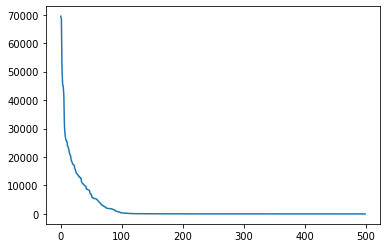

In [ ]:
import matplotlib.pyplot as plt

coms_48 = algorithms.louvain(G_ns)
lens = [len(c) for c in coms_48.communities[:500]]
plt.plot(lens)

In [ ]:
plt.plot(lens)

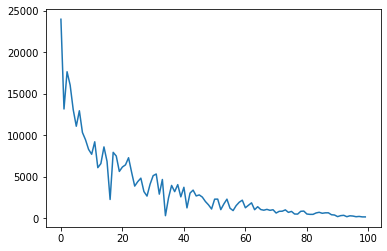

In [ ]:
import numpy as np

lens = [np.array(c.copy()) for c in coms_48.communities[:100]]
lens = [len(c[c<0]) for c in lens]
plt.plot(lens)

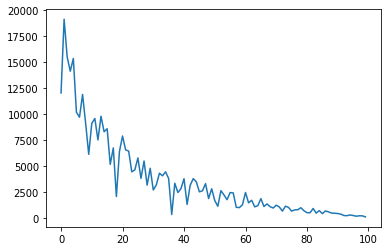

In [ ]:
import numpy as np

lens = [np.array(c.copy()) for c in coms_50.communities[:100]]
lens = [len(c[c<0]) for c in lens]
plt.plot(lens)

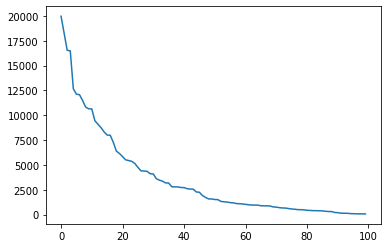

In [ ]:
import matplotlib.pyplot as plt

lens = [len(c) for c in coms_54.communities[:100]]
plt.plot(lens)

In [ ]:
len(coms_48.communities)

19287

In [ ]:
coms_48 = algorithms.louvain(G_ns)
print(len(coms_48.communities))
print(len(coms_48.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(G_ns, coms_48))
print(cdlib.evaluation.conductance(G_ns, coms_48))

19262
76782
FitnessResult(min=None, max=None, score=0.8794528317342616, std=None)
FitnessResult(min=0.0, max=0.20214580107726193, score=0.0007356088636090389, std=0.007375071288970244)


In [ ]:
import numpy as np
c1 = coms_48.communities[0]
c1 = np.array(c1.copy())
len(c1[c1 < 0])

23978

In [ ]:
coms_48 = algorithms.louvain(G_ns)

In [ ]:
coms_49 = algorithms.label_propagation(G_ns)
print(len(coms_49.communities))
print(len(coms_49.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(G_ns, coms_49))
print(cdlib.evaluation.conductance(G_ns, coms_49))

208235
12943
FitnessResult(min=None, max=None, score=0.6139847435844047, std=None)
FitnessResult(min=0.0, max=0.9661016949152542, score=0.42385374035854173, std=0.20079689069618625)


In [ ]:
c1 = coms_49.communities[:3]
c1 = [np.array(ci.copy()) for ci in c1] 
lens = [len(ci[ci < 0]) for ci in c1]
sum(lens)/3

2128.0

In [ ]:
c1 = coms_50.communities[:3]
c1 = [np.array(ci.copy()) for ci in c1] 
lens = [len(ci[ci < 0]) for ci in c1]
sum(lens)/3

15553.333333333334

In [ ]:
c1 = coms_48.communities[:3]
c1 = [np.array(ci.copy()) for ci in c1] 
lens = [len(ci[ci < 0]) for ci in c1]
sum(lens)/3

18268.333333333332

In [ ]:
comps = [c for c in sorted(nx.connected_components(G_ns), key=len, reverse=True)]
comps
print(len(comps))

18971


In [ ]:
comps[:50]

In [ ]:
largest_cc = max(nx.connected_components(G_ns), key=len)
len(largest_cc)
smallGns = G_ns.subgraph(largest_cc).copy()
smallGns

In [ ]:
coms_50 = algorithms.leiden(smallGns)
coms_50.communities += comps[1:]
print(len(coms_50.communities))
print(len(coms_50.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallGns, coms_50))
print(cdlib.evaluation.conductance(smallGns, coms_50))

19330
62099
FitnessResult(min=None, max=None, score=0.8909664594958784, std=None)
FitnessResult(min=0, max=0.1941233971594503, score=0.0007797070506622545, std=0.0070742884505352)


In [ ]:
!pip install leidenalg

In [ ]:
auctions['currency'].value_counts()

RUB    700430
Name: currency, dtype: int64

In [ ]:
coms_56 = algorithms.ego_networks(G_ns)
print(len(coms_56.communities))
print(len(coms_56.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(G_ns, coms_56))
print(cdlib.evaluation.conductance(G_ns, coms_56))


KeyboardInterrupt: ignored

In [ ]:
coms_l_1 = [algorithms.louvain(G_ns), algorithms.label_propagation(G_ns)]
coms_57 = algorithms.endntm(G_ns, coms_l_1)
print(len(coms_57.communities))
print(len(coms_57.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(G_ns, coms_57))
print(cdlib.evaluation.conductance(G_ns, coms_57))

19320
100645
FitnessResult(min=None, max=None, score=0.8687301408471131, std=None)
FitnessResult(min=0.0, max=0.28547671840354766, score=0.0010714587238506272, std=0.010116954103295907)


In [ ]:
print(cdlib.evaluation.conductance(G_ns, coms_56))

FitnessResult(min=0.0, max=0.9997515836542045, score=0.7546754530385772, std=0.24219862423237873)


In [ ]:
coms_l_2 = [coms_l_1[0]] + [algorithms.bimlpa(G_ns)]
coms_58 = algorithms.endntm(G_ns, coms_l_2)
print(len(coms_58.communities))
print(len(coms_58.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(G_ns, coms_58))
print(cdlib.evaluation.conductance(G_ns, coms_58))

In [ ]:
auctions['region'].value_counts()

Moskovskaja_obl                  274678
Moskva                           208722
Sankt-Peterburg                  128217
Krasnodarskij_kraj               110343
Khanty-Mansijskij_AO-Jugra_AO     99123
                                  ...  
Chukotskij_AO                      5791
Karachaevo-Cherkesskaja_Resp       5059
Evrejskaja_Aobl                    4960
Ingushetija_Resp                   3731
Neneckij_AO                         708
Name: region, Length: 85, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]),
 <a list of 85 Text major ticklabel objects>)

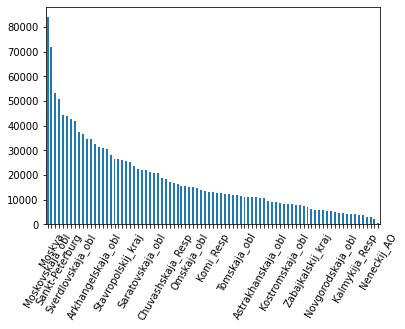

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(1,1)
auctions.drop_duplicates('auction_id')['region'].value_counts().plot(kind='bar', ax=ax1)
labels = [auctions.drop_duplicates('auction_id')['region'].value_counts().index[i] if (i % 6 == 0 or i == 1 or i == 3) else "" for i in range(85)]    
ax1.set_xticklabels(labels)
plt.xticks(rotation=60)


In [ ]:
auctions.drop_duplicates('auction_id')['region'].value_counts()

Moskovskaja_obl                  83989
Moskva                           71846
Krasnodarskij_kraj               53350
Sankt-Peterburg                  50662
Khanty-Mansijskij_AO-Jugra_AO    44272
                                 ...  
Sevastopol_g                      3769
Evrejskaja_Aobl                   3045
Karachaevo-Cherkesskaja_Resp      3044
Ingushetija_Resp                  2171
Neneckij_AO                        456
Name: region, Length: 85, dtype: int64

In [ ]:
auctions[['purchase_number', 'region', 'procurer_reg_num', 'max_price',
       'currency', 'start_date', 'end_date', 'prolong_date',
       'n_commission_members', 'participant_inn', 'price', 'date',
       'is_approved', 'is_after_prolong', 'auction_id', 'single', 'bid_date',
       'bid_price', 'con.met', 'won', 'con.win', 'sel_num', 'sel.period',
       'au.reserve', 'au.duration']].isna().sum()

purchase_number               0
region                        0
procurer_reg_num              0
max_price                     0
currency                2668108
start_date                    0
end_date                      0
prolong_date            3359809
n_commission_members          0
participant_inn               0
price                         0
date                          0
is_approved                   0
is_after_prolong              0
auction_id                    0
single                        0
bid_date                      0
bid_price                     0
con.met                       0
won                           0
con.win                  310046
sel_num                       0
sel.period                    0
au.reserve                    0
au.duration                   0
dtype: int64

In [ ]:
auctions.columns

Index(['purchase_number', 'region', 'procurer_reg_num', 'max_price',
       'currency', 'start_date', 'end_date', 'prolong_date',
       'n_commission_members', 'participant_inn', 'price', 'date',
       'is_approved', 'is_after_prolong', 'auction_id', 'Unnamed: 0', 'code_1',
       'code_2', 'code_3', 'code_4', 'name', 'object', 'single', 'bid_date',
       'bid_price', 'con.met', 'won', 'con.win', 'sel_num', 'sel.period',
       'au.reserve', 'au.duration'],
      dtype='object')

In [ ]:
coms_l_3 = [coms_l_1[1]] + [coms_l_2[1]]
coms_59 = algorithms.endntm(G_ns, coms_l_3)
print(len(coms_59.communities))
print(len(coms_59.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(G_ns, coms_59))
print(cdlib.evaluation.conductance(G_ns, coms_59))

215106
12126
FitnessResult(min=None, max=None, score=0.5339213636896395, std=None)
FitnessResult(min=0.0, max=0.9860529986052998, score=0.3816948521511533, std=0.18230196042486424)


In [ ]:
coms_l_4 = coms_l_3 + [coms_l_1[0]]
coms_60 = algorithms.endntm(G_ns, coms_l_4)
print(len(coms_60.communities))
print(len(coms_60.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(G_ns, coms_60))
print(cdlib.evaluation.conductance(G_ns, coms_60))

20136
116436
FitnessResult(min=None, max=None, score=0.870540575149323, std=None)
FitnessResult(min=0.0, max=0.23471349478618253, score=0.0012781188739426983, std=0.010462525331576126)


In [ ]:
coms_l_5 = [algorithms.louvain(smallGns), algorithms.leiden(smallGns)]
coms_61 = algorithms.endntm(smallGns, coms_l_5)
print(len(coms_61.communities))
print(len(coms_61.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallGns, coms_61))
print(cdlib.evaluation.conductance(smallGns, coms_61))

375
100473
FitnessResult(min=None, max=None, score=0.8622328251899082, std=None)
FitnessResult(min=0.0019801980198019802, max=0.25002607865321813, score=0.053616277074474375, std=0.044153204551165386)


In [ ]:
coms_l_6 = [coms_l_5[0], algorithms.bimlpa(smallGns)]
coms_62 = algorithms.endntm(smallGns, coms_l_6)
print(len(coms_62.communities))
print(len(coms_62.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallGns, coms_62))
print(cdlib.evaluation.conductance(smallGns, coms_62))

375
100473
FitnessResult(min=None, max=None, score=0.8622328251899082, std=None)
FitnessResult(min=0.0019801980198019802, max=0.25002607865321813, score=0.053616277074474375, std=0.044153204551165386)


In [ ]:
coms_l_7 = [coms_l_6[0], algorithms.leiden(smallGns)]
coms_63 = algorithms.endntm(smallGns, coms_l_7)
print(len(coms_63.communities))
print(len(coms_63.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallGns, coms_63))
print(cdlib.evaluation.conductance(smallGns, coms_63))

370
76316
FitnessResult(min=None, max=None, score=0.8735716981874931, std=None)
FitnessResult(min=0.0019801980198019802, max=0.2489144968089652, score=0.04825147699041943, std=0.04327455034329604)


In [ ]:
coms_l_8 = [coms_l_6[1], coms_l_5[1]]
coms_64 = algorithms.endntm(smallGns, coms_l_8)
print(len(coms_64.communities))
print(len(coms_64.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallGns, coms_64))
print(cdlib.evaluation.conductance(smallGns, coms_64))

190615
12126
FitnessResult(min=None, max=None, score=0.5231691566461498, std=None)
FitnessResult(min=0.004878048780487805, max=0.9860529986052998, score=0.4218882462984177, std=0.14673076581807257)


In [ ]:
coms_l_9 = [coms_l_6[1], coms_l_7[1]]
coms_65 = algorithms.endntm(smallGns, coms_l_9)
print(len(coms_65.communities))
print(len(coms_65.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallGns, coms_65))
print(cdlib.evaluation.conductance(smallGns, coms_65))

370
76316
FitnessResult(min=None, max=None, score=0.8735716981874931, std=None)
FitnessResult(min=0.0019801980198019802, max=0.2489144968089652, score=0.04825147699041943, std=0.04327455034329604)


In [ ]:
coms_l_10 = [coms_l_7[1], coms_l_8[1]]
coms_66 = algorithms.endntm(smallGns, coms_l_10)
print(len(coms_66.communities))
print(len(coms_66.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallGns, coms_66))
print(cdlib.evaluation.conductance(smallGns, coms_66))

370
76316
FitnessResult(min=None, max=None, score=0.8735716981874931, std=None)
FitnessResult(min=0.0019801980198019802, max=0.2489144968089652, score=0.04825147699041943, std=0.04327455034329604)


In [ ]:
coms_l_11 = coms_l_6 + [coms_l_8[1]]
coms_67 = algorithms.endntm(smallGns, coms_l_11)
print(len(coms_67.communities))
print(len(coms_67.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallGns, coms_67))
print(cdlib.evaluation.conductance(smallGns, coms_67))

375
100473
FitnessResult(min=None, max=None, score=0.8622328251899082, std=None)
FitnessResult(min=0.0019801980198019802, max=0.25002607865321813, score=0.053616277074474375, std=0.044153204551165386)


In [ ]:
coms_l_12 = [coms_l_6[0]] + coms_l_10
coms_68 = algorithms.endntm(smallGns, coms_l_12)
print(len(coms_68.communities))
print(len(coms_68.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallGns, coms_68))
print(cdlib.evaluation.conductance(smallGns, coms_68))

370
76316
FitnessResult(min=None, max=None, score=0.8735716981874931, std=None)
FitnessResult(min=0.0019801980198019802, max=0.2489144968089652, score=0.04825147699041943, std=0.04327455034329604)


In [ ]:
coms_l_13 = coms_l_6 + [coms_l_7[1]]
coms_69 = algorithms.endntm(smallGns, coms_l_13)
print(len(coms_69.communities))
print(len(coms_69.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallGns, coms_69))
print(cdlib.evaluation.conductance(smallGns, coms_69))

370
76316
FitnessResult(min=None, max=None, score=0.8735716981874931, std=None)
FitnessResult(min=0.0019801980198019802, max=0.2489144968089652, score=0.04825147699041943, std=0.04327455034329604)


In [ ]:
coms_l_14 = coms_l_8 + [coms_l_7[1]]
coms_70 = algorithms.endntm(smallGns, coms_l_14)
print(len(coms_70.communities))
print(len(coms_70.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallGns, coms_70))
print(cdlib.evaluation.conductance(smallGns, coms_70))

370
76316
FitnessResult(min=None, max=None, score=0.8735716981874931, std=None)
FitnessResult(min=0.0019801980198019802, max=0.2489144968089652, score=0.04825147699041943, std=0.04327455034329604)


In [ ]:
coms_l_15 = [coms_l_5[0]] + coms_l_14
coms_71 = algorithms.endntm(smallGns, coms_l_15)
print(len(coms_71.communities))
print(len(coms_71.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallGns, coms_71))
print(cdlib.evaluation.conductance(smallGns, coms_71))

370
76316
FitnessResult(min=None, max=None, score=0.8735716981874931, std=None)
FitnessResult(min=0.0019801980198019802, max=0.2489144968089652, score=0.04825147699041943, std=0.04327455034329604)


In [ ]:
coms_51 = algorithms.bimlpa(G_ns)
print(len(coms_51.communities))
print(len(coms_51.communities[0]))
# print(cdlib.evaluation.newman_girvan_modularity(G_ns, coms_51))
# print(cdlib.evaluation.conductance(G_ns, coms_51))

375715
27873
FitnessResult(min=None, max=None, score=-0.0019001412307603173, std=None)


KeyboardInterrupt: ignored

In [ ]:
print(cdlib.evaluation.newman_girvan_modularity(G_ns, coms_51))
print(cdlib.evaluation.conductance(G_ns, coms_51.communities))

AttributeError: ignored

In [ ]:
coms_51 = algorithms.bimlpa(G_ns)

for c in coms_51.communities.copy():

  if len(c) == 0 or c[0] > 0:
    coms_51.communities.remove(c)

print(len(coms_51.communities))
print(len(coms_51.communities[0])) 
for c in coms_51.communities.copy():
  firms = c.copy()
  for f in firms:
    c += (G_ns.neighbors(f)))

print(cdlib.evaluation.newman_girvan_modularity(G_ns, coms_51))
print(cdlib.evaluation.conductance(G_ns, coms_51))

178312
65990


TypeError: ignored

In [ ]:
print(cdlib.evaluation.newman_girvan_modularity(G_ns, coms_51))
print(cdlib.evaluation.conductance(G_ns, coms_51))

FitnessResult(min=None, max=None, score=0.53970323073857, std=None)
FitnessResult(min=0.0, max=0.9634464751958225, score=0.3918389428814992, std=0.20577722857756175)


In [ ]:
for c in coms_51.communities.copy():
  firms = c.copy()
  for f in firms:
    if isinstance(f, list):
      c.remove(f)


In [ ]:
for c in coms_51.communities.copy():
  firms = c.copy()
  for f in firms:
    c += G_ns.neighbors(f)

In [ ]:
n = 0 
for c in coms_51.communities.copy():

  if len(c) == 0 or c[0] > 0:
    coms_51.communities.remove(c)

In [ ]:
len(coms_51.communities)

237876

In [ ]:
len(coms_51.communities[0])

9516

In [ ]:
for c in coms_51.communities.copy():
  firms = c.copy()
  for f in firms:
    c.append(list(G_ns.neighbors(f)))

In [ ]:
for c in coms_51.communities.copy():
  if len(c) == 0:
    coms_51.communities.remove(c)

NameError: ignored

In [ ]:
len(coms_51.communities[0])

19032

In [ ]:
import numpy as np

coms_arr = np.array(coms_51.communities)
coms_arr = coms_arr[coms_arr[:,0] < 0]
coms_51.communities = list(coms_arr)

In [ ]:
gr

participant_inn  auction_id
1299922      -6330055841      603231
829607       -5261068940      373738
829606     -524300861251      373738
829608       -5261022216      373738
829609       -5260292548      373738
...                  ...         ...
1239109      -7816363890     6060512
1630161      -3528209013     6013848
121090       -7706196090     6076021
121089       -7705513090     6076021
216886       -6311012306     5994105

[3351442 rows x 2 columns]

In [ ]:
# !pip install  igraph
!pip install karateclub

     |████████████████████████████████| 62 kB 475 kB/s 
     |████████████████████████████████| 1.8 MB 10.5 MB/s 
     |████████████████████████████████| 24.1 MB 54.4 MB/s 
  Created wheel for karateclub: filename=karateclub-1.2.3-py3-none-any.whl size=97754 sha256=47cb6411bbf4a7db351b28f3c0d0348e7c73ef8f19d50755bfd09708efd52c71
  Stored in directory: /root/.cache/pip/wheels/7a/09/80/0d50455fd4e297e88f8f38a711c6f4849e6bd1a330000dde3d
Successfully built karateclub
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
# !pip uninstall cdlib
# !pip uninstall networkx
# !pip uninstall python-louvain
# !pip uninstall community
# !pip install python-louvain
# !pip install networkx
# !pip install cdlib

# from cdlib import algorithms
# import networkx
# nx.set_edge_attributes(smallGns, values=1, name='weight')
coms_72 = algorithms.core_expansion(smallGns)
print(len(coms_72.communities))
print(len(coms_72.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(smallGns, coms_72))
print(cdlib.evaluation.conductance(smallGns, coms_72))

NameError: ignored

In [ ]:
coms_52 = algorithms.louvain(G_n)
print(len(coms_52.communities))
print(len(coms_52.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(G_n, coms_52))
print(cdlib.evaluation.conductance(G_n, coms_52))

19372
30007
FitnessResult(min=None, max=None, score=0.7701564717546542, std=None)
FitnessResult(min=0.0, max=0.30965216835028586, score=0.0016483485564248424, std=0.013158066207462498)


In [ ]:
print(cdlib.evaluation.newman_girvan_modularity(G_n, coms_52))
print(cdlib.evaluation.conductance(G_n, coms_52))

FitnessResult(min=None, max=None, score=0.7676670292486991, std=None)
FitnessResult(min=0.0, max=0.3035002007414398, score=0.001484017279659118, std=0.012437992086830666)


In [ ]:
!pip install leidenalg

     |████████████████████████████████| 1.3 MB 7.4 MB/s 


In [ ]:
coms_53 = algorithms.label_propagation(G_n)
print(len(coms_53.communities))
print(len(coms_53.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(G_n, coms_53))
print(cdlib.evaluation.conductance(G_n, coms_53))

406372
1
FitnessResult(min=None, max=None, score=0.1264804426435892, std=None)
FitnessResult(min=0.3333333333333333, max=0.999468791500664, score=0.6519576214923966, std=0.221441088043795)


In [ ]:
coms_54 = algorithms.louvain(G_nw)
print(len(coms_54.communities))
print(len(coms_54.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(G_nw, coms_54))
print(cdlib.evaluation.conductance(G_nw, coms_54))

19369
23869
FitnessResult(min=None, max=None, score=0.8666169163495577, std=None)
FitnessResult(min=0.0, max=0.4532120311919792, score=0.0021764954752295073, std=0.018631612740571592)


In [ ]:
coms_54 = algorithms.louvain(G_nw)
len(coms_54)

TypeError: ignored

In [ ]:
len(coms_54.communities)

19374

In [ ]:
import numpy as np

c1 = coms_54.communities[:3]
c1 = [np.array(ci.copy()) for ci in c1] 
lens = [len(ci[ci < 0]) for ci in c1]
sum(lens)/3

18253.333333333332

In [ ]:
c2 = coms_55.communities[:3]
c2 = [np.array(ci.copy()) for ci in c2] 
lens = [len(ci[ci < 0]) for ci in c2]
sum(lens)/3

22458.333333333332

In [ ]:
len(coms_54.communities[0])

19962

In [ ]:
coms_55 = algorithms.leiden(G_nw)
print(len(coms_55.communities))
print(len(coms_55.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(G_nw, coms_55))
print(cdlib.evaluation.conductance(G_nw, coms_55))

19349
26224
FitnessResult(min=None, max=None, score=0.8592181371632431, std=None)
FitnessResult(min=0.0, max=0.3265983184998817, score=0.0014400271656902612, std=0.012047881379138837)


In [ ]:
# coms_56 = algorithms.leiden(G_n)
print(len(coms_56.communities))
print(len(coms_56.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(G_n, coms_56))
print(cdlib.evaluation.conductance(G_n, coms_56))

19550
30697
FitnessResult(min=None, max=None, score=0.7773708993587839, std=None)
FitnessResult(min=0.0, max=0.28808118830388246, score=0.003144557624965719, std=0.01977688799506746)


In [ ]:
import numpy as np
def count_anova(df, coms, features):
  vals = {feature:[] for feature in features}
  inp = {}
  for i,com in enumerate(coms):
    df['com'] = df['participant_inn'].isin(com)
    comsx = df[(df.groupby(['auction_id'])['com'].transform('prod') == 1) ]
    dcts = []
    inp[i] = np.array(comsx['auction_id'].unique())
    #   dct = np.array((comsx[feature].mean(), comsx[feature].std(), len(comsx)))
    #   dcts.append(dct)
    # inp.append(np.array(dct))
  return inp, vals

In [ ]:
aucts_mo = pd.read_csv('auctions_objs.xlsx', engine='python')
aucts_mo

NameError: ignored

In [ ]:
G_f = nx.Graph()
G_f.add_nodes_from(gr_2017ns['participant_inn'], bipartite=0)
dct  = gr_2017ns.groupby('auction_id')['participant_inn'].apply(list).to_dict()
for a in dct:
  for i in range(len(dct[a])):
    for j in range(i, len(dct[a])):
      G_f.add_edge(dct[a][i], dct[a][j])
len(G_f)  

122710

In [ ]:
G_o = nx.Graph()
G_o.add_nodes_from(gr_obj_ns['participant_inn'], bipartite=0)
dct  = gr_obj_ns.groupby('auction_id')['participant_inn'].apply(list).to_dict()
for a in dct:
  for i in range(len(dct[a])):
    for j in range(i, len(dct[a])):
      if G_o.has_edge(dct[a][i], dct[a][j]):
                # we added this one before, just increase the weight by one
        G_o[dct[a][i]][dct[a][j]]['weight'] += 1
      else:
                # new edge. add with weight=1
        G_o.add_edge(dct[a][i], dct[a][j], weight=1)
len(G_o)  

127924

In [ ]:
coms_10 = algorithms.louvain(G_f, resolution=1., randomize=False)
print(coms_10)

In [ ]:
coms_43 = algorithms.louvain(G_o, resolution=1., randomize=False)
print(coms_43)

In [ ]:
coms_43 = algorithms.louvain(G_o, weight='weight', resolution=1., randomize=False)
print(coms_43)

In [ ]:
len(coms_43.communities)

5846

In [ ]:
len(coms_43.communities[0])

26162

In [ ]:
auctions_obj['participant_inn'] = - auctions_obj['participant_inn']
auctions_obj['auction_id'] = auctions_obj['auction_id'] + 1

In [ ]:
auctions_obj['com1'] = auctions_obj['participant_inn'].isin(coms_43.communities[1])
comsx = auctions_obj[auctions_obj.groupby(['auction_id'])['com1'].transform('sum') > 1]
comsx

Unnamed: 0     purchase_number              region  procurer_reg_num  \
432             432  524300002918000017  Arkhangelskaja_obl        5243000029   
433             433  524300002918000017  Arkhangelskaja_obl        5243000029   
711             711  324100011719000134  Arkhangelskaja_obl        3241000117   
712             712  324100011719000134  Arkhangelskaja_obl        3241000117   
713             713  324100011719000134  Arkhangelskaja_obl        3241000117   
...             ...                 ...                 ...               ...   
1698284     1698284  131200001020003710   Voronezhskaja_obl        1312000010   
1698285     1698285  131200001020003710   Voronezhskaja_obl        1312000010   
1698286     1698286  131200001020003706   Voronezhskaja_obl        1312000010   
1698287     1698287  131200001020003706   Voronezhskaja_obl        1312000010   
1698288     1698288  131200001020003706   Voronezhskaja_obl        1312000010   

         max_price currency           start_date             end_date  \
432        93833.4      NaN  2018-05-15 08:30:00  2018-05-22 11:00:00   
433        93833.4      NaN  2018-05-15 08:30:00  2018-05-22 11:00:00   
711         9500.0      RUB  2019-11-14 17:25:03  2019-11-25 09:00:00   
712         9500.0      RUB  2019-11-14 17:25:03  2019-11-25 09:00:00   
713         9500.0      RUB  2019-11-14 17:25:03  2019-11-25 09:00:00   
...            ...      ...                  ...                  ...   
1698284    15556.5      RUB  2020-04-22 15:26:27  2020-05-13 09:00:00   
1698285    15556.5      RUB  2020-04-22 15:26:27  2020-05-13 09:00:00   
1698286    26030.5      RUB  2020-04-22 15:23:24  2020-05-13 09:00:00   
1698287    26030.5      RUB  2020-04-22 15:23:24  2020-05-13 09:00:00   
1698288    26030.5      RUB  2020-04-22 15:23:24  2020-05-13 09:00:00   

        prolong_date  n_commission_members  ...  is_after_prolong  code_1  \
432              NaN                     5  ...             False      25   
433              NaN                     5  ...             False      25   
711              NaN                     3  ...             False      28   
712              NaN                     3  ...             False      28   
713              NaN                     3  ...             False      28   
...              ...                   ...  ...               ...     ...   
1698284          NaN                     8  ...             False      13   
1698285          NaN                     8  ...             False      13   
1698286          NaN                     8  ...             False      36   
1698287          NaN                     8  ...             False      36   
1698288          NaN                     8  ...             False      36   

        code_2 code_3  code_4  \
432         29     11       0   
433         29     11       0   
711         74     11     190   
712         74     11     190   
713         74     11     190   
...        ...    ...     ...   
1698284     92     13     150   
1698285     92     13     150   
1698286     62     11       0   
1698287     62     11       0   
1698288     62     11       0   

                                                      name  object  \
432      Резервуары, цистерны, баки и аналогичные емкос...     NaN   
433      Резервуары, цистерны, баки и аналогичные емкос...     NaN   
711      Изделия резьбовые из черных металлов прочие, н...     NaN   
712      Изделия резьбовые из черных металлов прочие, н...     NaN   
713      Изделия резьбовые из черных металлов прочие, н...     NaN   
...                                                    ...     ...   
1698284              Белье столовое из нетканых материалов     NaN   
1698285              Белье столовое из нетканых материалов     NaN   
1698286                  Метлы и щетки для домашней уборки     NaN   
1698287                  Метлы и щетки для домашней уборки     NaN   
1698288                  Метлы и щетки для домашней уборки     NaN 

In [ ]:
comsx[['code_1', 'code_2', 'code_3']].value_counts().head(20)

NameError: ignored

In [ ]:
d4 = comsx['region'].value_counts()

In [ ]:
d4.head(20)

Moskovskaja_obl                  65006
Moskva                           56212
Samarskaja_obl                   12086
Voronezhskaja_obl                10258
Ivanovskaja_obl                  10173
Vologodskaja_obl                  8550
Vladimirskaja_obl                 7224
Sankt-Peterburg                   6353
Saratovskaja_obl                  6339
Nizhegorodskaja_obl               6227
Rostovskaja_obl                   4997
Cheljabinskaja_obl                4932
Arkhangelskaja_obl                4429
Chuvashskaja_Resp                 4302
Bashkortostan_Resp                4147
Brjanskaja_obl                    3819
Smolenskaja_obl                   3776
Khanty-Mansijskij_AO-Jugra_AO     3634
Lipeckaja_obl                     3578
Kaluzhskaja_obl                   3544
Name: region, dtype: int64

In [ ]:
len(coms_10.communities)

NameError: ignored

In [ ]:
import numpy as np

lenss = [len(i) for i in coms_10.communities]
cms = np.array(lenss)
len(cms[cms < 10])

8504

In [ ]:
evaluation.newman_girvan_modularity(G_f, coms_10)

FitnessResult(min=None, max=None, score=0.8382217754142283, std=None)

In [ ]:
len(coms_10.communities[1])

7110

In [ ]:
auctions_2017['com0'] = auctions_2017['participant_inn'].isin(coms_10.communities[0])
comsx3 = auctions_2017[auctions_2017.groupby(['auction_id'])['com0'].transform('sum') > 1]
comsx3[comsx3['com0'] == False]['participant_inn'].value_counts()

-7839399170      64
-7802843456      23
-6165167690      23
-1658111150      22
-5043031757      20
                 ..
-5001077887       1
-462001836866     1
-5033003020       1
-5002002203       1
-7726680373       1
Name: participant_inn, Length: 3689, dtype: int64

In [ ]:
comsx3['participant_inn'].value_counts()

-7736035485      1541
-7710026574      1500
-7716748907       875
-7713056834       579
-7709031643       562
                 ... 
-540450372329       1
-5638054430         1
-5610075101         1
-561602189396       1
-7726680373         1
Name: participant_inn, Length: 11745, dtype: int64

In [ ]:
auctions_2017['com1'] = auctions_2017['participant_inn'].isin(coms_10.communities[1])
comsx5 = auctions_2017[auctions_2017.groupby(['auction_id'])['com1'].transform('sum') > 1]
comsx5

purchase_number                region  procurer_reg_num  \
4579     0835200000816001021  Kaliningradskaja_obl      8.352000e+09   
4580     0835200000816001021  Kaliningradskaja_obl      8.352000e+09   
10926    0334200002117000175        Irkutskaja_obl      3.342000e+09   
10927    0334200002117000175        Irkutskaja_obl      3.342000e+09   
10928    0334200002117000175        Irkutskaja_obl      3.342000e+09   
...                      ...                   ...               ...   
3079181  0373100108117000559                Moskva      3.731001e+09   
3079182  0373100108117000559                Moskva      3.731001e+09   
3079917  0373100093917000080                Moskva      3.731001e+09   
3079918  0373100093917000080                Moskva      3.731001e+09   
3079919  0373100093917000080                Moskva      3.731001e+09   

         max_price currency          start_date             end_date  \
4579     140870.84     None 2016-12-30 10:00:00  2017-01-12 08:45:00   
4580     140870.84     None 2016-12-30 10:00:00  2017-01-12 08:45:00   
10926    499080.00     None 2017-10-02 12:00:00  2017-10-11 12:00:00   
10927    499080.00     None 2017-10-02 12:00:00  2017-10-11 12:00:00   
10928    499080.00     None 2017-10-02 12:00:00  2017-10-11 12:00:00   
...            ...      ...                 ...                  ...   
3079181  166659.32     None 2017-11-28 08:00:00  2017-12-04 09:00:00   
3079182  166659.32     None 2017-11-28 08:00:00  2017-12-04 09:00:00   
3079917  212906.67     None 2017-12-11 18:00:00  2017-12-15 12:00:00   
3079918  212906.67     None 2017-12-11 18:00:00  2017-12-15 12:00:00   
3079919  212906.67     None 2017-12-11 18:00:00  2017-12-15 12:00:00   

        prolong_date  n_commission_members  participant_inn      price  \
4579             NaT                     6      -7814615327   15885.60   
4580             NaT                     6      -7736674114   49506.16   
10926            NaT                     5      -3810314530  337040.00   
10927            NaT                     5      -5408130693  290012.58   
10928            NaT                     5      -3810053158  331452.00   
...              ...                   ...              ...        ...   
3079181          NaT                     3    -262404407141  111195.08   
3079182          NaT                     3    -263200569202  127611.04   
3079917          NaT                     6      -7716755750  210000.00   
3079918          NaT                     6      -3665065194  212000.00   
3079919          NaT                     6      -7704738358  200000.00   

                        date is_approved  is_after_prolong  auction_id   com0  \
4579     2017-01-11 16:03:00        True             False        2231  False   
4580     2017-01-11 14:17:00        True             False        2231  False   
10926    2017-10-06 12:42:00        True             False        5543  False   
10927    2017-10-11 11:34:00        True             False        5543  False   
10928    2017-10-11 10:52:13        True             False        5543  False   
...                      ...         ...               ...         ...    ...   
3079181  2017-11-30 13:06:00        True             False     1443628  False   
3079182  2017-12-01 11:30:00        True             False     1443628  False   
3079917  2017-12-14 15:50:00        True             False     1443955  False   
3079918  2017-12-14 14:53:00        True             False     1443955  False   
3079919  2017-12-15 09:57:00        True             False     1443955  False   

          com1  
4579      True  
4580      True  
10926    False  
10927     True  
10928     True  
...        ...  
3079181   True  
3079182   True  
3079917   True  
3079918   True  
3079919   True  

[36638 rows x 17 columns]

In [ ]:
auctions_2017['com2'] = auctions_2017['participant_inn'].isin(coms_10.communities[2])
comsx7 = auctions_2017[auctions_2017.groupby(['auction_id'])['com2'].transform('sum') > 1]
comsx7

purchase_number         region  procurer_reg_num  max_price  \
1432     0323100013117000062  Amurskaja_obl      3.231000e+09   151078.6   
1433     0323100013117000062  Amurskaja_obl      3.231000e+09   151078.6   
1434     0323100013117000062  Amurskaja_obl      3.231000e+09   151078.6   
1497     0123300001917000027  Amurskaja_obl      1.233000e+09    25200.0   
1498     0123300001917000027  Amurskaja_obl      1.233000e+09    25200.0   
...                      ...            ...               ...        ...   
3079598  0373200626217000046         Moskva      3.732006e+09    96000.0   
3079599  0373200626217000046         Moskva      3.732006e+09    96000.0   
3080234  0573100015917000044         Moskva      5.731000e+09   238500.0   
3080235  0573100015917000044         Moskva      5.731000e+09   238500.0   
3080236  0573100015917000044         Moskva      5.731000e+09   238500.0   

        currency          start_date             end_date prolong_date  \
1432        None 2017-03-02 15:40:00  2017-03-20 11:15:00          NaT   
1433        None 2017-03-02 15:40:00  2017-03-20 11:15:00          NaT   
1434        None 2017-03-02 15:40:00  2017-03-20 11:15:00          NaT   
1497        None 2017-04-03 08:00:00  2017-04-07 10:00:00          NaT   
1498        None 2017-04-03 08:00:00  2017-04-07 10:00:00          NaT   
...          ...                 ...                  ...          ...   
3079598     None 2017-11-28 08:00:00  2017-12-12 09:05:00          NaT   
3079599     None 2017-11-28 08:00:00  2017-12-12 09:05:00          NaT   
3080234     None 2017-12-20 10:00:00  2017-12-26 12:00:00          NaT   
3080235     None 2017-12-20 10:00:00  2017-12-26 12:00:00          NaT   
3080236     None 2017-12-20 10:00:00  2017-12-26 12:00:00          NaT   

         n_commission_members  participant_inn     price                 date  \
1432                        6      -7721284658  109822.6  2017-03-15 15:11:00   
1433                        6      -4345215879  119000.0  2017-03-14 11:57:00   
1434                        6      -3329080502  143834.4  2017-03-13 10:35:00   
1497                        5      -2812008261   18500.0  2017-04-07 09:06:00   
1498                        5      -2801159565   13300.0  2017-04-06 11:10:00   
...                       ...              ...       ...                  ...   
3079598                     3      -7841345341   65600.0  2017-12-07 09:20:00   
3079599                     3      -7729494449   78400.0  2017-12-11 13:20:00   
3080234                     6      -7726510942  154500.0  2017-12-26 10:50:00   
3080235                     6      -7723017312  155710.0  2017-12-26 11:10:00   
3080236                     6      -7722566398  214650.0  2017-12-26 10:00:00   

        is_approved  is_after_prolong  auction_id   com0   com1  com2  
1432           True             False         798  False  False  True  
1433           True             False         798  False  False  True  
1434           True             False         798  False  False  True  
1497           True             False         837  False  False  True  
1498           True             False         837  False  False  True  
...             ...               ...         ...    ...    ...   ...  
3079598        True             False     1443812  False  False  True  
3079599        True             False     1443812  False  False  True  
3080234        True             False     1444109  False  False  True  
3080235        True             False     1444109  False  False  True  
3080236        True             False     1444109  False  False  True  

[19022 rows x 18 columns]

In [ ]:
comsx4 = auctions_2017[auctions_2017['participant_inn'].isin(coms_10.communities[0]) & auctions_2017['auction_id'].isin(comsx3['auction_id'])]
comsx4

purchase_number         region  procurer_reg_num  max_price  \
1566     0123300017117000039  Amurskaja_obl      1.233000e+09   33855.53   
1567     0123300017117000039  Amurskaja_obl      1.233000e+09   33855.53   
1581     0123200001517000006  Amurskaja_obl      1.232000e+09  221759.17   
1582     0123200001517000006  Amurskaja_obl      1.232000e+09  221759.17   
1583     0123200001517000006  Amurskaja_obl      1.232000e+09  221759.17   
...                      ...            ...               ...        ...   
3080338  0573100016417000022         Moskva      5.731000e+09  230161.66   
3080339  0573100016417000022         Moskva      5.731000e+09  230161.66   
3080340  0573100016417000022         Moskva      5.731000e+09  230161.66   
3080600  0373200594917000138         Moskva      3.732006e+09  151112.00   
3080601  0373200594917000138         Moskva      3.732006e+09  151112.00   

        currency          start_date             end_date prolong_date  \
1566        None 2017-05-02 08:00:00  2017-05-12 09:00:00          NaT   
1567        None 2017-05-02 08:00:00  2017-05-12 09:00:00          NaT   
1581        None 2017-05-10 17:30:00  2017-05-18 14:30:00          NaT   
1582        None 2017-05-10 17:30:00  2017-05-18 14:30:00          NaT   
1583        None 2017-05-10 17:30:00  2017-05-18 14:30:00          NaT   
...          ...                 ...                  ...          ...   
3080338     None 2017-12-22 14:00:00  2017-12-29 11:00:00          NaT   
3080339     None 2017-12-22 14:00:00  2017-12-29 11:00:00          NaT   
3080340     None 2017-12-22 14:00:00  2017-12-29 11:00:00          NaT   
3080600     None 2017-12-24 09:00:00  2018-01-16 09:15:00          NaT   
3080601     None 2017-12-24 09:00:00  2018-01-16 09:15:00          NaT   

         n_commission_members  participant_inn      price  \
1566                        4      -7710026574   32836.62   
1567                        4      -7736035485   32836.62   
1581                        4      -7710026574  206879.11   
1582                        4      -7707067683  221759.17   
1583                        4      -7706196090  221759.17   
...                       ...              ...        ...   
3080338                     5      -7710026574  192863.00   
3080339                     5      -7723011286  175000.00   
3080340                     5      -7744002620  184000.00   
3080600                     3    -501604098690  140000.00   
3080601                     3      -7106525843  128000.00   

                        date is_approved  is_after_prolong  auction_id  com0  
1566     2017-05-02 14:05:00        True             False         862  True  
1567     2017-05-02 08:05:00        True             False         862  True  
1581     2017-05-15 14:27:00        True             False         868  True  
1582     2017-05-10 17:42:00        True             False         868  True  
1583     2017-05-12 14:00:00        True             False         868  True  
...                      ...         ...               ...         ...   ...  
3080338  2017-12-28 13:30:00        True             False     1444168  True  
3080339  2017-12-26 13:20:00        True             False     1444168  True  
3080340  2017-12-28 11:30:00        True             False     1444168  True  
3080600  2017-12-28 14:10:00        True             False     1444299  True  
3080601  2017-12-28 11:10:00        True             False     1444299  True  

[48778 rows x 16 columns]

In [ ]:
comsx6 = auctions_2017[auctions_2017['participant_inn'].isin(coms_10.communities[1]) & auctions_2017['auction_id'].isin(comsx5['auction_id'])]
comsx6

purchase_number                region  procurer_reg_num  \
4579     0835200000816001021  Kaliningradskaja_obl      8.352000e+09   
4580     0835200000816001021  Kaliningradskaja_obl      8.352000e+09   
10927    0334200002117000175        Irkutskaja_obl      3.342000e+09   
10928    0334200002117000175        Irkutskaja_obl      3.342000e+09   
10929    0334200002117000175        Irkutskaja_obl      3.342000e+09   
...                      ...                   ...               ...   
3079181  0373100108117000559                Moskva      3.731001e+09   
3079182  0373100108117000559                Moskva      3.731001e+09   
3079917  0373100093917000080                Moskva      3.731001e+09   
3079918  0373100093917000080                Moskva      3.731001e+09   
3079919  0373100093917000080                Moskva      3.731001e+09   

         max_price currency          start_date             end_date  \
4579     140870.84     None 2016-12-30 10:00:00  2017-01-12 08:45:00   
4580     140870.84     None 2016-12-30 10:00:00  2017-01-12 08:45:00   
10927    499080.00     None 2017-10-02 12:00:00  2017-10-11 12:00:00   
10928    499080.00     None 2017-10-02 12:00:00  2017-10-11 12:00:00   
10929    499080.00     None 2017-10-02 12:00:00  2017-10-11 12:00:00   
...            ...      ...                 ...                  ...   
3079181  166659.32     None 2017-11-28 08:00:00  2017-12-04 09:00:00   
3079182  166659.32     None 2017-11-28 08:00:00  2017-12-04 09:00:00   
3079917  212906.67     None 2017-12-11 18:00:00  2017-12-15 12:00:00   
3079918  212906.67     None 2017-12-11 18:00:00  2017-12-15 12:00:00   
3079919  212906.67     None 2017-12-11 18:00:00  2017-12-15 12:00:00   

        prolong_date  n_commission_members  participant_inn      price  \
4579             NaT                     6      -7814615327   15885.60   
4580             NaT                     6      -7736674114   49506.16   
10927            NaT                     5      -5408130693  290012.58   
10928            NaT                     5      -3810053158  331452.00   
10929            NaT                     5      -3849059909  319200.00   
...              ...                   ...              ...        ...   
3079181          NaT                     3    -262404407141  111195.08   
3079182          NaT                     3    -263200569202  127611.04   
3079917          NaT                     6      -7716755750  210000.00   
3079918          NaT                     6      -3665065194  212000.00   
3079919          NaT                     6      -7704738358  200000.00   

                        date is_approved  is_after_prolong  auction_id   com0  \
4579     2017-01-11 16:03:00        True             False        2231  False   
4580     2017-01-11 14:17:00        True             False        2231  False   
10927    2017-10-11 11:34:00        True             False        5543  False   
10928    2017-10-11 10:52:13        True             False        5543  False   
10929    2017-10-09 10:30:01        True             False        5543  False   
...                      ...         ...               ...         ...    ...   
3079181  2017-11-30 13:06:00        True             False     1443628  False   
3079182  2017-12-01 11:30:00        True             False     1443628  False   
3079917  2017-12-14 15:50:00        True             False     1443955  False   
3079918  2017-12-14 14:53:00        True             False     1443955  False   
3079919  2017-12-15 09:57:00        True             False     1443955  False   

         com1  
4579     True  
4580     True  
10927    True  
10928    True  
10929    True  
...       ...  
3079181  True  
3079182  True  
3079917  True  
3079918  True  
3079919  True  

[33681 rows x 17 columns]

In [ ]:
date = pd.to_datetime(auctions_obj['date'], errors='coerce')
auctions_obj['year'] = pd.DatetimeIndex(date).year
auctions_obj['month'] = pd.DatetimeIndex(date).month

In [ ]:
auctions_obj1 = auctions_obj[auctions_obj['year'] == 2021]
gr_obj_s = auctions_obj1[auctions_obj1.groupby(['auction_id'])['auction_id'].transform('size') == 1]
gr_obj_s.index = gr_obj_s['auction_id']
gr_obj_s = gr_obj_s[['region', 'code_1', 'code_2', 'code_3', 'code_4']]

In [ ]:
gr_obj_s

region  code_1  code_2  code_3  code_4
auction_id                                                   
5407002         Amurskaja_obl       2      20      14     129
5410291     Belgorodskaja_obl      33      13      12       0
5413963        Irkutskaja_obl      55      20      11       0
5413973        Irkutskaja_obl      55      20      11       0
5416910       Ivanovskaja_obl      96       3      12     123
...                       ...     ...     ...     ...     ...
6065250                Moskva      31       1      11     129
6066649                Moskva      23      19      23     110
6067229                Moskva      71      12      31       0
6074959                Moskva      86      22      19       0
6075791                Moskva      62       2      30       0

[19742 rows x 5 columns]

In [ ]:
sim_matrix = [[0 for _ in range(len(gr_obj_s))] for _ in range(len(gr_obj_s))]
for i in range(len(gr_obj_s)):
  for j in range(i+1, len(gr_obj_s)):
    if  gr_obj_s.iloc[i]['region'] != gr_obj_s.iloc[j]['region']:
      sim_matrix[i][j] = df_dist_matrix[gr_obj_s.iloc[i]['region']][gr_obj_s.iloc[j]['region']]
    sim_matrix[i][j] += code_m[gr_obj_s.iloc[i]['code_1']-1][gr_obj_s.iloc[j]['code_1']-1]



In [ ]:
gr_obj_s['code'] = gr_obj_s['code_1'].map(str) + gr_obj_s['code_2'].map(str) + gr_obj_s['code_3'].map(str) + gr_obj_s['code_4'].map(str)
gr_obj_s = gr_obj_s[['region', 'code']]

In [ ]:
!pip install gower

In [ ]:
import gower

distance_matrix = gower.gower_matrix(gr_obj_s)

In [ ]:
from sklearn.cluster import DBSCAN

# Configuring the parameters of the clustering algorithm
dbscan_cluster = DBSCAN(eps=0.3, 
                        min_samples=2, 
                        metric="precomputed")

# Fitting the clustering algorithm
dbscan_cluster.fit(sim_matrix)

# Adding the results to a new column in the dataframe
gr_obj_s["cluster"] = dbscan_cluster.labels

ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]),
 <a list of 85 Text major ticklabel objects>)

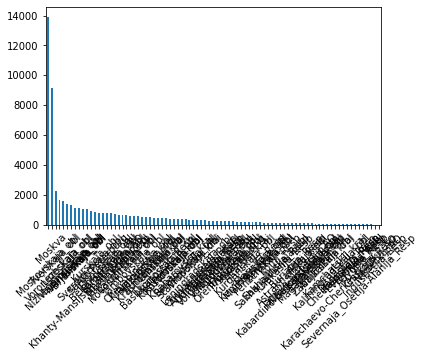

In [ ]:
comsx3['region'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)

In [ ]:
comsx3['region'].value_counts().head(20)

Moskovskaja_obl                  13877
Moskva                            9135
Tverskaja_obl                     2242
Voronezhskaja_obl                 1650
Nizhegorodskaja_obl               1556
Lipeckaja_obl                     1359
Vladimirskaja_obl                 1327
Ivanovskaja_obl                   1099
Brjanskaja_obl                    1089
Tulskaja_obl                      1059
Khanty-Mansijskij_AO-Jugra_AO     1027
Sverdlovskaja_obl                  887
Kurskaja_obl                       823
Sankt-Peterburg                    799
Belgorodskaja_obl                  796
Orlovskaja_obl                     744
Samarskaja_obl                     740
Smolenskaja_obl                    675
Jaroslavskaja_obl                  664
Novosibirskaja_obl                 628
Name: region, dtype: int64

In [ ]:
d0 = comsx3['region'].value_counts()

In [ ]:
d1 = comsx5['region'].value_counts()

In [ ]:
d2 = comsx7['region'].value_counts()
#d3 = comsx7['region'].value_counts()

In [ ]:
freq_r = comsx3['region'].value_counts().idxmax()
freq_r

reg_n = comsx3['region'].value_counts().to_dict()

mean_d = 0
for reg1 in reg_n:
    dist = df_dist_matrix[freq_r][reg1]
    #print(dist)
    dist = dist * (reg_n[freq_r] * reg_n[reg1])
    mean_d += dist 
   # print(mean_d)

mean_d = mean_d * 2/ (len(comsx3) * (len(comsx3)-1))
mean_d

292.40432189989

In [ ]:
!pip install gmaps
!pip install pandas
!pip install widgetsnbextension

     |████████████████████████████████| 1.1 MB 6.6 MB/s 
  Created wheel for gmaps: filename=gmaps-0.9.0-py2.py3-none-any.whl size=2076111 sha256=bf61bd0b0049b6b7ca2aff1fc595efb0fe7cefdf82ce8a34d04a42490f87fdce
  Stored in directory: /root/.cache/pip/wheels/3d/1c/cb/c46f4199210e632b28d78d05a00bfdccbf6dfcd3f5b051d6bf
Successfully built gmaps


In [ ]:
!pip install ipyleaflet

     |████████████████████████████████| 3.3 MB 4.2 MB/s 


In [ ]:
import os
import json
import random
import requests
from ipyleaflet import GeoJSON, Map

def load_data(url, filename, file_type):
    r = requests.get(url)
    with open(filename, 'w') as f:
        f.write(r.content.decode("utf-8"))
    with open(filename, 'r') as f:
        return file_type(f)

data = load_data(
    'https://raw.githubusercontent.com/tttdddnet/Python-Jupyter-Geo/main/geo_ru.json',
    'geo_ru.json',
     json.load)    

def random_color(feature):
    return {
        'color': 'black',
        'fillColor': random.choice(['red', 'yellow', '#efed69', '#fcba03', '#9900ff', '#00ff15', '#db2751', '#00ff95']),
    }

m = Map(center=(66.25, 94.15), zoom=3)

geo_json = GeoJSON(
    data=data,
    style={
        'opacity': 1, 'dashArray': '9', 'fillOpacity': 0.2, 'weight': 1
    },
    hover_style={
        'color': 'white', 'dashArray': '0', 'fillOpacity': 0.7
    },
    style_callback=random_color
)

m.add_layer(geo_json)

m

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd

In [ ]:
c = gpd.read_file('coords.gpkg')
c.index = c['region']
# c['com0'] = d4
# c

In [ ]:
c['com1'] = d1
c

id  \
region                                    
Neneckij_AO                    None  81   
Khanty-Mansijskij_AO-Jugra_AO  None  82   
Chukotskij_AO                  None  83   
Jamalo-Neneckij_AO             None  84   
Evrejskaja_Aobl                None  80   
...                             ...  ..   
Tulskaja_obl                   None  72   
Tjumenskaja_obl                None  73   
Uljanovskaja_obl               None  74   
Cheljabinskaja_obl             None  75   
Jaroslavskaja_obl              None  76   

                                                                subject  \
region                                                                    
Neneckij_AO                                                 Ненецкий АО   
Khanty-Mansijskij_AO-Jugra_AO  Ханты-Мансийский автономный округ — Югра   
Chukotskij_AO                                              Чукотский АО   
Jamalo-Neneckij_AO                                    Ямало-Ненецкий АО   
Evrejskaja_Aobl                            Еврейская автономная область   
...                                                                 ...   
Tulskaja_obl                                           Тульская область   
Tjumenskaja_obl                                       Тюменская область   
Uljanovskaja_obl                                    Ульяновская область   
Cheljabinskaja_obl                                  Челябинская область   
Jaroslavskaja_obl                                   Ярославская область   

                                       center       lat        lon  \
region                                                               
Neneckij_AO                        Нарьян-Мар  67.63869   53.00371   
Khanty-Mansijskij_AO-Jugra_AO  Ханты-Мансийск  61.00417   69.00194   
Chukotskij_AO                         Анадырь  64.73424  177.51030   
Jamalo-Neneckij_AO                   Салехард  66.53000   66.60194   
Evrejskaja_Aobl                    Биробиджан  48.79284  132.92386   
...                                       ...       ...        ...   
Tulskaja_obl                             Тула  54.19609   37.61822   
Tjumenskaja_obl                        Тюмень  57.15222   65.52722   
Uljanovskaja_obl                    Ульяновск  54.32824   48.38657   
Cheljabinskaja_obl                  Челябинск  55.15402   61.42915   
Jaroslavskaja_obl                   Ярославль  57.62987   39.87368   

                                       lat_radians         long_radians  type  \
region                                                                          
Neneckij_AO                     1.1805178422357629  0.92508925527224362    АО   
Khanty-Mansijskij_AO-Jugra_AO   1.0647236239463489    1.204311043263576    АО   
Chukotskij_AO                   1.1298256267762139   3.0981391912028902    АО   
Jamalo-Neneckij_AO              1.1611675513518269    1.162423141215712    АО   
Evrejskaja_Aobl                0.85159570939879004   2.3199590114599902  Аобл   
...                                            ...                  ...   ...   
Tulskaja_obl                   0.94590021220717357  0.65656179773958134   обл   
Tjumenskaja_obl                 0.9974944138241536    1.143665738678679   обл   
Uljanovskaja_obl               0.94820666481368421  0.84450496024671262   обл   
Cheljabinskaja_obl             0.96261924471080296    1.072140924201475   обл   
Jaroslavskaja_obl                1.005830978996304  0.69592700088661263   обл   

                                                      region  \
region                                                         
Neneckij_AO                                      Neneckij_AO   
Khanty-Mansijskij_AO-Jugra_AO  Khanty-Mansijskij_AO-Jugra_AO   
Chukotskij_AO                                  Chukotskij_AO   
Jamalo-Neneckij_AO                        Jamalo-Neneckij_AO   
Evrejskaja_Aobl                              Evrejskaja_Aobl   
...                                                      ...   
Tulskaja_obl            

In [ ]:
import numpy as np

c['com2'] = d2
# c['exp'] = cn['exp']
# c['exp'].replace(0, np.nan)

In [ ]:
c['com7'] = d3

/usr/local/lib/python3.7/dist-packages/fiona/collection.py:208: FeatureWarning: Empty field name at index 0
  self._schema = self.session.get_schema()
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:600: UserWarning: Empty field name at index 0
  for feature in features_lst:


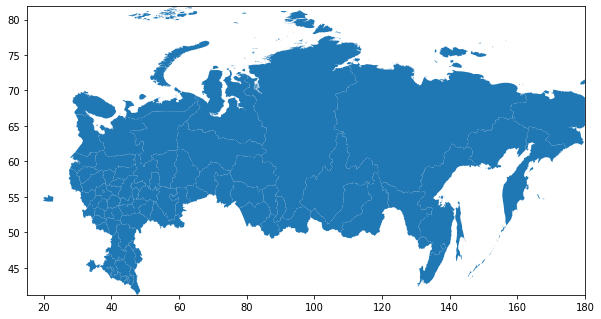

In [ ]:
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
import json

def load_data(url, filename, file_type):
    r = requests.get(url)
    with open(filename, 'w') as f:
        f.write(r.content.decode("utf-8"))
    with open(filename, 'r') as f:
        return file_type(f)

data = load_data(
    'https://raw.githubusercontent.com/tttdddnet/Python-Jupyter-Geo/main/geo_ru.json',
    'geo_ru.json',
     json.load)    


regs = gpd.read_file('geo_ru.json')
c = gpd.read_file('coords.gpkg')
c.index = c['region']

fig, ax = plt.subplots(figsize = (10,6))
xlim = ([15,  regs.total_bounds[2]])
ylim = ([regs.total_bounds[1],  regs.total_bounds[3]])

ax.set_xlim(xlim)
ax.set_ylim(ylim)
base = regs.plot(ax=ax)
# c.plot(markersize=c['com0'], color='yellow', ax=base)
#c.plot(markersize=c['exp'], color='red', ax=base, alpha=0.5)

In [ ]:
cn.index = cn['region']
# cn['com0'] = d4
#cn.to_excel('distr.xlsx')

In [ ]:
auctions['code'] = auctions['code_1'].map(str) + auctions['code_2'].map(str)

In [ ]:
cn['com0'].sum()

3.7177899969142344e-06

In [ ]:
cn

Unnamed: 0  id  \
region                                          
Neneckij_AO                            81  81   
Khanty-Mansijskij_AO-Jugra_AO          82  82   
Chukotskij_AO                          83  83   
Jamalo-Neneckij_AO                     84  84   
Evrejskaja_Aobl                        80  80   
...                                   ...  ..   
Tulskaja_obl                           72  72   
Tjumenskaja_obl                        73  73   
Uljanovskaja_obl                       74  74   
Cheljabinskaja_obl                     75  75   
Jaroslavskaja_obl                      76  76   

                                                                subject  \
region                                                                    
Neneckij_AO                                                 Ненецкий АО   
Khanty-Mansijskij_AO-Jugra_AO  Ханты-Мансийский автономный округ — Югра   
Chukotskij_AO                                              Чукотский АО   
Jamalo-Neneckij_AO                                    Ямало-Ненецкий АО   
Evrejskaja_Aobl                            Еврейская автономная область   
...                                                                 ...   
Tulskaja_obl                                           Тульская область   
Tjumenskaja_obl                                       Тюменская область   
Uljanovskaja_obl                                    Ульяновская область   
Cheljabinskaja_obl                                  Челябинская область   
Jaroslavskaja_obl                                   Ярославская область   

                                       center       lat        lon  \
region                                                               
Neneckij_AO                        Нарьян-Мар  67.63869   53.00371   
Khanty-Mansijskij_AO-Jugra_AO  Ханты-Мансийск  61.00417   69.00194   
Chukotskij_AO                         Анадырь  64.73424  177.51030   
Jamalo-Neneckij_AO                   Салехард  66.53000   66.60194   
Evrejskaja_Aobl                    Биробиджан  48.79284  132.92386   
...                                       ...       ...        ...   
Tulskaja_obl                             Тула  54.19609   37.61822   
Tjumenskaja_obl                        Тюмень  57.15222   65.52722   
Uljanovskaja_obl                    Ульяновск  54.32824   48.38657   
Cheljabinskaja_obl                  Челябинск  55.15402   61.42915   
Jaroslavskaja_obl                   Ярославль  57.62987   39.87368   

                               lat_radians  long_radians  type  \
region                                                           
Neneckij_AO                       1.180518      0.925089    АО   
Khanty-Mansijskij_AO-Jugra_AO     1.064724      1.204311    АО   
Chukotskij_AO                     1.129826      3.098139    АО   
Jamalo-Neneckij_AO                1.161168      1.162423    АО   
Evrejskaja_Aobl                   0.851596      2.319959  Аобл   
...                                    ...           ...   ...   
Tulskaja_obl                      0.945900      0.656562   обл   
Tjumenskaja_obl                   0.997494      1.143666   обл   
Uljanovskaja_obl                  0.948207      0.844505   обл   
Cheljabinskaja_obl                0.962619      1.072141   обл   
Jaroslavskaja_obl                 1.005831      0.695927   обл   

                                                      region   № population  \
region                                                                        
Neneckij_AO                                      Neneckij_AO  85     44 540   
Khanty-Mansijskij_AO-Jugra_AO  Khanty-Mansijskij_AO-Jugra_AO  28  1 702 240   
Chukotskij_AO                                  Chukotskij_AO  84     50 040   
Jamalo-Neneckij_AO                        Jamalo-Neneckij_AO  71    552 117   
Evrejskaja_Aobl                              Evrejskaja_Aobl  82    153 831   
...                                                      ...  ..        ...   
Tulskaja_obl   

In [ ]:
cn['com1'] = d1

In [ ]:
cn['population'] = cn['population'].str.split().str.join('').astype(int)
cn[['population', 'com0']].corr(method='spearman')

population      com0
population    1.000000  0.486587
com0          0.486587  1.000000

In [ ]:
from scipy import stats
cn['com1'] = cn['com1'].fillna(0)
cn['com2'] = cn['com2'].fillna(0)
cn['com7'] = cn['com7'].fillna(0)
stats.spearmanr(cn['population'], cn['com7'])


SpearmanrResult(correlation=0.572998403064792, pvalue=1.0001999101144729e-08)

In [ ]:
cn.columns

Index(['Unnamed: 0', 'id', 'subject', 'center', 'lat', 'lon', 'lat_radians',
       'long_radians', 'type', 'region', '№', 'population', '% от общ.',
       'com0', 'com1', 'com2'],
      dtype='object')

In [ ]:
cn['com1'] = d1
cn[['population', 'com1']].corr(method='spearman')

population      com1
population    1.000000  0.439984
com1          0.439984  1.000000

In [ ]:
cn['com2'] = d2
cn[['population', 'com7']].corr(method='spearman')

KeyError: ignored

In [ ]:
from scipy.stats import chisquare
# cn['com0'] = cn['com0'].fillna(0)
# cn['com0'] = cn['com0'] / len(comsx)
# cn['exp'] = cn['% от общ.'] / 100
# chisquare(cn['com0'] * 85, f_exp=cn['exp'] * 85)
#cn.plot.bar(x='region', y='exp')
# for i in range(len(cn)):
#   print(cn['exp'][i], cn['com2'][i])

In [ ]:
from scipy.stats import chi
chi(cn['com0'] * 85, cn['exp'] * 85)

In [ ]:
max_reg = cn[cn['com0'] == cn['com0'].max()].index
max_reg

Index(['Moskovskaja_obl'], dtype='object', name='region')

In [ ]:
d4.head(20)

Moskovskaja_obl                  65006
Moskva                           56212
Samarskaja_obl                   12086
Voronezhskaja_obl                10258
Ivanovskaja_obl                  10173
Vologodskaja_obl                  8550
Vladimirskaja_obl                 7224
Sankt-Peterburg                   6353
Saratovskaja_obl                  6339
Nizhegorodskaja_obl               6227
Rostovskaja_obl                   4997
Cheljabinskaja_obl                4932
Arkhangelskaja_obl                4429
Chuvashskaja_Resp                 4302
Bashkortostan_Resp                4147
Brjanskaja_obl                    3819
Smolenskaja_obl                   3776
Khanty-Mansijskij_AO-Jugra_AO     3634
Lipeckaja_obl                     3578
Kaluzhskaja_obl                   3544
Name: region, dtype: int64

In [ ]:
df_dist_matrix[max_reg].sort_values(by=max_reg[0]).head(30)

region               Moskovskaja_obl
region                              
Moskovskaja_obl             0.000000
Moskva                      0.000000
Kaluzhskaja_obl           160.447408
Tverskaja_obl             162.225846
Tulskaja_obl              173.033844
Vladimirskaja_obl         178.352505
Rjazanskaja_obl           181.709681
Ivanovskaja_obl           248.678404
Jaroslavskaja_obl         250.177997
Kostromskaja_obl          301.428156
Orlovskaja_obl            325.504091
Brjanskaja_obl            347.992648
Smolenskaja_obl           369.220633
Lipeckaja_obl             372.529012
Nizhegorodskaja_obl       401.685627
Vologodskaja_obl          409.087128
Tambovskaja_obl           417.797784
Kurskaja_obl              456.180880
Voronezhskaja_obl         465.260828
Novgorodskaja_obl         490.935864
Mordovija_Resp            512.739303
Penzenskaja_obl           554.920378
Belgorodskaja_obl         575.837197
Chuvashskaja_Resp         601.072939
Pskovskaja_obl            608.569149
Sankt-Peterburg           634.430920
Leningradskaja_obl        634.430920
Marij_El_Resp             642.640146
Karelija_Resp             696.552092
Uljanovskaja_obl          703.517676

In [ ]:
auct_obj_s = auctions_obj[~auctions_obj['participant_inn'].isin(gr_obj_ns['participant_inn'])]
auct_obj_s['region'] = auct_obj_s['region'].str.strip()
auct_obj_s[auct_obj_s.groupby('participant_inn')['code_1'].transform('nunique') > 1].groupby('participant_inn')['code_1'].apply(list)


participant_inn
-920451773120                                        [28, 30]
-920400128394                                    [18, 33, 18]
-910227078500                                [93, 93, 93, 56]
-910200128859                            [58, 63, 63, 58, 58]
-890103331405                                        [23, 19]
                                     ...                     
-278109628       [61, 61, 61, 61, 61, 61, 61, 61, 61, 64, 61]
-277047150                               [21, 21, 24, 20, 24]
-269022339                                       [10, 15, 10]
-264076919                                           [26, 43]
-224950721                                           [42, 43]
Name: code_1, Length: 1313, dtype: object

In [ ]:
codes = auct_obj_s.groupby('participant_inn')['code_1'].agg('unique')
u_regs = auct_obj_s.groupby('participant_inn')['region'].agg('unique')

In [ ]:
set(comsx['region'].value_counts().head(20).index)

{'Arkhangelskaja_obl',
 'Bashkortostan_Resp',
 'Brjanskaja_obl',
 'Cheljabinskaja_obl',
 'Chuvashskaja_Resp',
 'Ivanovskaja_obl',
 'Kaluzhskaja_obl',
 'Khanty-Mansijskij_AO-Jugra_AO',
 'Lipeckaja_obl',
 'Moskovskaja_obl',
 'Moskva',
 'Nizhegorodskaja_obl',
 'Rostovskaja_obl',
 'Samarskaja_obl',
 'Sankt-Peterburg',
 'Saratovskaja_obl',
 'Smolenskaja_obl',
 'Vladimirskaja_obl',
 'Vologodskaja_obl',
 'Voronezhskaja_obl'}

In [ ]:
for f in s_firms:
  if set(u_regs[f]).issubset(set(comsx['region'].value_counts().head(10).index)):
    for i in codes[f]:
      flag = True
      if i not in comsx['code_1'].value_counts().head(10).index:
        flag = False
      if flag:
        print(f)

-3305716796
-7731345684
-7731345684
-440108339500
-3702187066
-3702123866
-7722796627
-7729109714
-7703726303
-522101876965
-5029072624
-7705041337
-3329037850
-7709930344
-6321450193
-525601940808
-6319094371
-3702080387
-6829106095
-6829106095
-784301849123
-504200380093
-7729698410
-7710492328
-7710492328
-7106056535
-7813314863
-3702741686
-3702741686
-9718111881
-7840057365
-525628199182
-5260429601
-5260429601
-7813174729
-7810226305
-7810226305
-7805613620
-7805613620
-366407263201
-366407263201
-6330037881
-5031064500
-7801508649
-5258041794
-3666176605
-7707332807
-5262346076
-6312079590
-5045048717
-7726395560
-7726395560
-7716900012
-7839485863
-7839485863
-7839485863
-5032221234
-5260410495
-7806362873
-7729370690
-5018188401
-5258105649
-5258105649
-7725576250
-373100060040
-373100060040
-6450087080
-7718606827
-5262360754
-7703469600
-5027205621
-9719006706
-7826176265
-583407942767
-3702639146
-3702639146
-6318175973
-3525279252
-3321034568
-9731050638
-9731050638
-77143

KeyboardInterrupt: ignored

In [ ]:
auctions_obj[auctions_obj['participant_inn'] == -3305716796]

Unnamed: 0     purchase_number             region  procurer_reg_num  \
29247         29247  328300047921000001  Vladimirskaja_obl        3283000479   
46663         46663  328300037721000003  Vladimirskaja_obl        3283000377   
190178       190178  328300037720000028  Vladimirskaja_obl        3283000377   
378921       378907  333300018921000088    Ivanovskaja_obl        3333000189   
582644       582640  328300047921000163  Vladimirskaja_obl        3283000479   
615138       615138  333300018921000132    Ivanovskaja_obl        3333000189   
788923       788921  328300049421000118  Vladimirskaja_obl        3283000494   
938462       938460  328300047921000161  Vladimirskaja_obl        3283000479   
1088091     1088091  328300047921000227  Vladimirskaja_obl        3283000479   
1144590     1144590  328200001719000032  Vladimirskaja_obl        3282000017   
1307529     1307526  333300018921000079    Ivanovskaja_obl        3333000189   
1335019     1335016  328300006619000055  Vladimirskaja_obl        3283000066   

          max_price currency           start_date             end_date  \
29247     491475.00      RUB  2021-01-27 15:09:09  2021-02-04 23:59:00   
46663     240342.68      RUB  2021-02-02 20:18:40  2021-02-16 17:00:00   
190178     89421.24      RUB  2020-06-25 13:25:03  2020-07-06 17:00:00   
378921    522000.00      RUB  2021-06-17 10:03:44  2021-06-24 11:00:00   
582644    298816.80      RUB  2021-10-06 11:10:05  2021-10-13 09:00:00   
615138    261000.00      RUB  2021-07-22 15:32:57  2021-07-29 18:00:00   
788923    397625.28      RUB  2021-12-22 14:56:04  2021-12-29 14:34:00   
938462    298816.80      RUB  2021-09-27 14:27:41  2021-10-04 09:00:00   
1088091   498338.88      RUB  2021-12-13 10:01:42  2021-12-20 10:00:00   
1144590    69600.00      RUB  2019-04-15 15:20:23  2019-04-23 11:00:00   
1307529  1044000.00      RUB  2021-05-21 09:13:33  2021-05-28 09:00:00   
1335019   499588.09      RUB  2019-10-14 16:06:52  2019-10-22 11:44:00   

        prolong_date  n_commission_members  ...  is_after_prolong  code_1  \
29247            NaN                     0  ...             False      24   
46663            NaN                     0  ...             False      24   
190178           NaN                     0  ...             False      24   
378921           NaN                     3  ...             False      24   
582644           NaN                     5  ...             False      24   
615138           NaN                     3  ...             False      24   
788923           NaN                     9  ...             False      21   
938462           NaN                     5  ...             False      24   
1088091          NaN                     5  ...             False      24   
1144590          NaN                     3  ...             False      24   
1307529          NaN                     3  ...             False      24   
1335019          NaN                     4  ...             False      24   

        code_2 code_3  code_4                               name  object  \
29247       11     11     160                           Кислород     NaN   
46663       11     11     160                           Кислород     NaN   
190178      11     11     160                           Кислород     NaN   
378921      11     11     160                           Кислород     NaN   
582644      11     11     160                           Кислород     NaN   
615138      11     11     160                           Кислород     NaN   
788923      20     23     190  Препараты фармацевтические прочие     NaN   
938462      11     11     160                           Кислород     NaN   
1088091     11     11     160                           Кислород     NaN   
1144590     11     11     160                           Кислород     NaN   
1307529     11     11     160                           Кислород     NaN   
1335019     11     11     160                           Кислород     NaN   

         aucti

In [ ]:
def describe_comm(df, com_n, plot=False):

  df['com'] = df['com_n'] == com_n
  comsx = df[df.groupby(['auction_id'])['com'].transform('sum') > 1]
  d = comsx['region'].value_counts()
  freq_r = comsx['region'].value_counts().idxmax()
  regs = d[d > len(comsx) * 0.02].index.to_list()
 # print(d)
  for i in range(len(regs)):
    flag = False
    if len(regs) == 1:
      flag = True
    for j in range(len(regs)):
      if regs[i] == regs[j]:
        continue
      if regs[j] == 'Sankt-Peterburg':
        reg = 'Leningradskaja_obl'
      elif regs[j] == 'Moskva':
        reg = 'Moskovskaja_obl'
      elif regs[j] == 'Sevastopol_g':
        reg = 'Krim_Resp'
      elif regs[j] == 'Adygeja_Resp':
        reg = 'Krasnodarskij_kraj'
      else:
        reg = regs[j]
      neighbs = neighbors2['subjectsLabel'].loc[reg]
      if regs[i] != regs[j] and regs[i] in neighbs:
        flag = True
    if not flag:
   #   print(regs[i])
      break
  cn['com'] = d
  cn['com'] = cn['com'].fillna(0)
  cn['com'] = cn['com'] / len(comsx)  
  cn['exp'] = cn['% от общ.'] / 100
  pv = chisquare(cn['com'] * 85, f_exp=cn['exp'] * 85)[1]
 # print('p-value', pv)
  mtype = ''
  if pv < 0.01 and flag:
  #  print('regional')
    mtype = 'regional'
    regs = d[d > len(comsx) * 0.01].index.to_list()
  #  print(regs)

  else:
    mtype = 'federal'
    regs = []
  #  print('federal')
  
  codes = (comsx['code'].map(str)).value_counts()
 # print(codes)
  codes = codes[(codes > (len(comsx) - codes.get('nannan', 0)) * 0.05) ]
  codes = codes[codes.index != 'nannan'].index.to_list()
#  print(codes)
  if plot:
    c['com'] = d
    regions = gpd.read_file('geo_ru.json')
    fig, ax = plt.subplots(figsize = (10,6))
    xlim = ([15,  regions.total_bounds[2]])
    ylim = ([regions.total_bounds[1],  regions.total_bounds[3]])

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    base = regions.plot(ax=ax)
    c.plot(markersize=c['com']/50, color='yellow', ax=base)

    fig, ax1 = plt.subplots(1,1)
    cn['com'].plot(kind='bar', ax = ax1)
    labels = [cn['region'][i] if cn['com'][i] > 0.05 else "" for i in range(85)]    
    ax1.set_xticklabels(labels)
    ax1.set_title('Actual distribution of community')
  return regs, codes



([], ['18.012.0', '17.023.0'])

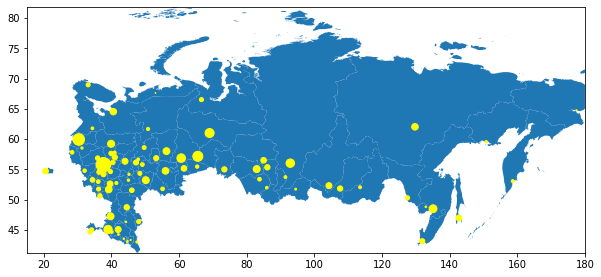

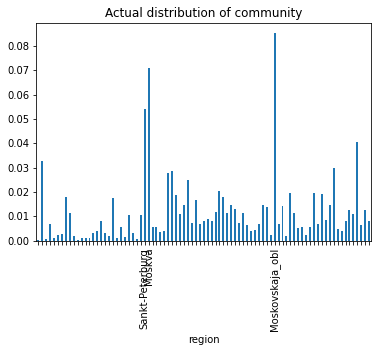

In [ ]:
describe_comm(auctions, 1, plot=True)

In [ ]:
neighbors = pd.read_csv('query.csv')
neighbors = neighbors[['subjectLabel', 'subjectsLabel']]
for r in neighbors['subjectLabel'].unique():
  if r not in population['subject'].unique():
    print(r)
print('  ')
for r in population['subject'].unique():
  if r not in neighbors['subjectLabel'].unique():
    print(r)

Тыва
Карелия
Адыгея
Калмыкия
Дагестан
Чечня
Ингушетия
Республика Северная Осетия-Алания
Кабардино-Балкария
Карачаево-Черкесия
Мордовия
Удмуртия
Марий Эл
Чувашия
Татарстан
Хакасия
Якутия
Бурятия
Ненецкий автономный округ
Ямало-Ненецкий автономный округ
Чукотский автономный округ
  
Республика Татарстан
Республика Дагестан
Чеченская Республика
Удмуртская Республика
Чувашская Республика
Республика Саха (Якутия)
Республика Бурятия
Кабардино-Балкарская Республика
Республика Мордовия
Республика Северная Осетия — Алания
Республика Марий Эл
Республика Карелия
Ямало-Ненецкий АО
Республика Хакасия
Республика Ингушетия
Республика Адыгея
Карачаево-Черкесская Республика
Республика Тыва
Республика Калмыкия
Чукотский АО
Ненецкий АО


In [ ]:
replaces = {'Тыва': 'Республика Тыва', 'Карелия': 'Республика Карелия', 'Адыгея': 'Республика Адыгея', 'Калмыкия': 'Республика Калмыкия', 
           'Дагестан': 'Республика Дагестан', 'Чечня': 'Чеченская Республика', 'Ингушетия': 'Республика Ингушетия', 'Республика Северная Осетия-Алания': 'Республика Северная Осетия — Алания',
            'Кабардино-Балкария': 'Кабардино-Балкарская Республика', 'Карачаево-Черкесия': 'Карачаево-Черкесская Республика', 'Мордовия': 'Республика Мордовия',
            'Удмуртия': 'Удмуртская Республика', 'Марий Эл': 'Республика Марий Эл', 'Чувашия': 'Чувашская Республика', 'Татарстан': 'Республика Татарстан',
            'Хакасия': 'Республика Хакасия', 'Якутия': 'Республика Саха (Якутия)', 'Бурятия': 'Республика Бурятия'
            }
neighbors.replace(replaces, inplace=True)
neighbors.replace('автономный округ', 'АО', inplace=True, regex=True)
neighbors.replace('Ханты-Мансийский АО — Югра', 'Ханты-Мансийский автономный округ — Югра', inplace=True)

In [ ]:
cn.index = cn['subject']
translit = cn['region'].to_dict()
cn.index = cn['region']

In [ ]:
neighbors['subjectsLabel'] = neighbors['subjectsLabel'].fillna(neighbors['subjectLabel'])

In [ ]:
neighbors.replace(translit, inplace=True)
neighbors = neighbors.fillna(neighbors['subjectLabel'])

In [ ]:
neighbors2 = neighbors.groupby('subjectLabel')['subjectsLabel'].agg('unique')
neighbors2 = neighbors2.reset_index()
neighbors2.index = neighbors2['subjectLabel']

In [ ]:
neighbors2.head()

subjectLabel  \
subjectLabel                             
Adygeja_Resp              Adygeja_Resp   
Altaj_Resp                  Altaj_Resp   
Altajskij_kraj          Altajskij_kraj   
Amurskaja_obl            Amurskaja_obl   
Arkhangelskaja_obl  Arkhangelskaja_obl   

                                                        subjectsLabel  
subjectLabel                                                           
Adygeja_Resp                       [Adygeja_Resp, Krasnodarskij_kraj]  
Altaj_Resp          [Altaj_Resp, Tyva_Resp, Altajskij_kraj, Kemero...  
Altajskij_kraj      [Altajskij_kraj, Novosibirskaja_obl, Altaj_Res...  
Amurskaja_obl       [Amurskaja_obl, Sakha_Jakutija_Resp, Zabajkals...  
Arkhangelskaja_obl  [Arkhangelskaja_obl, Murmanskaja_obl, Karelija...

In [ ]:
len(auctions_obj)

1698323

In [ ]:
describe_comm(auctions_obj, coms_43.communities[4])

('regional',
 ['Moskva',
  'Moskovskaja_obl',
  'Vladimirskaja_obl',
  'Ivanovskaja_obl',
  'Vologodskaja_obl',
  'Sankt-Peterburg',
  'Voronezhskaja_obl',
  'Khanty-Mansijskij_AO-Jugra_AO',
  'Kaluzhskaja_obl',
  'Jaroslavskaja_obl',
  'Samarskaja_obl',
  'Rostovskaja_obl'],
 [25, 28, 20, 22, 24, 27, 26, 32, 23, 13, 17, 36, 16, 29, 14, 8, 31])

In [ ]:
def find_firms(df, com):
  firms = []
  mtype, regs, cods = describe_comm(df, com)
  for f in s_firms:
    if set(u_regs[f]).issubset(set(regs)) or mtype == 'federal':
      for i in codes[f]:
        flag = True
        if i not in cods:
          flag = False
        if flag:
          
          firms.append(f)
  return firms

In [ ]:
d32 = find_firms(auctions_obj, coms_43.communities[10])
len(d32)

420

In [ ]:
auctions_obj[auctions_obj['participant_inn'].isin(d32)].groupby('participant_inn')['participant_inn'].count().sort_values(ascending=False)

participant_inn
-7731345684      11
-252601135370    10
-6163145469       8
-253713621902     7
-440108339500     7
                 ..
-7814725601       1
-7816289774       1
-7816591417       1
-7816644757       1
-201103900        1
Name: participant_inn, Length: 417, dtype: int64

In [ ]:
import numpy as np
from tqdm import tqdm

def count_anova(df, coms, features):
  df['com_n'] = 0
  df['sus'] = False
  vals = {feature:[] for feature in features}
  inp = {}
  df_1, df_2 = pd.DataFrame(columns=auctions.columns), pd.DataFrame(columns=auctions.columns)
  for i,com in enumerate(tqdm(coms)):
    df['com'] = df['participant_inn'].isin(com)
    comsx = df[(df.groupby(['auction_id'])['com'].transform('prod') == 1) ]
    df.loc[df['com'], ['com_n']] = i
    if comsx['single'].mean() > 0.5:
      df.loc[df['com'], ['sus']] = True
  return df

In [ ]:
auctions['participant_inn'] = -auctions['participant_inn']
auctions['auciton_id'] = auctions['auction_id'] + 1

In [ ]:
updated_auctions = count_anova(auctions, coms_54.communities, ['single'])
updated_auctions.to_csv("/content/drive/MyDrive/Maria Mitrankova/updated.csv")

100%|██████████| 19376/19376 [3:53:54<00:00,  1.38it/s]


In [ ]:
import pandas as pd
auctions = pd.read_csv("/content/drive/MyDrive/Maria Mitrankova/updated.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,8,22,25,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
auctions.columns

Index(['Unnamed: 0', 'purchase_number', 'region', 'procurer_reg_num',
       'max_price', 'currency', 'start_date', 'end_date', 'prolong_date',
       'n_commission_members', 'participant_inn', 'price', 'date',
       'is_approved', 'is_after_prolong', 'auction_id', 'Unnamed: 0.1',
       'code_1', 'code_2', 'code_3', 'code_4', 'name', 'object',
       'Unnamed: 0_y', 'auction_id_y', 'start_date_y', 'code_1_y', 'code_2_y',
       'code_3_y', 'code_4_y', 'if_okpd2', 'name_y', 'single', 'bid_date',
       'bid_price', 'con.met', 'won', 'con.win', 'sel_num', 'sel.period',
       'au.reserve', 'au.duration', 'auciton_id', 'com_n', 'sus', 'com'],
      dtype='object')

In [ ]:
auctions = auctions[['Unnamed: 0', 'purchase_number', 'region', 'procurer_reg_num',
       'max_price', 'currency', 'start_date', 'end_date', 'prolong_date',
       'n_commission_members', 'participant_inn', 'price', 'date',
       'is_approved', 'is_after_prolong', 'auction_id', 'Unnamed: 0.1',
       'code_1', 'code_2', 'code_3', 'code_4', 'name', 'object','single', 'bid_date',
       'bid_price', 'con.met', 'won', 'con.win', 'sel_num', 'sel.period',
       'au.reserve', 'au.duration', 'auciton_id', 'com_n', 'sus', 'com']]

In [ ]:
new_objs = pd.read_csv("/content/drive/MyDrive/Maria Mitrankova/auctions_objs2.csv")
new_objs = new_objs.drop_duplicates(['purchase_number'])
new_objs.i
auctions_t = auctions.merge(new_objs, on=['purchase_number'], how='left', suffixes=('', '_x'))
auctions_t.columns

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['Unnamed: 0', 'purchase_number', 'region', 'procurer_reg_num',
       'max_price', 'currency', 'start_date', 'end_date', 'prolong_date',
       'n_commission_members', 'participant_inn', 'price', 'date',
       'is_approved', 'is_after_prolong', 'auction_id', 'Unnamed: 0.1',
       'code_1', 'code_2', 'code_3', 'code_4', 'name', 'object', 'single',
       'bid_date', 'bid_price', 'con.met', 'won', 'con.win', 'sel_num',
       'sel.period', 'au.reserve', 'au.duration', 'auciton_id', 'com_n', 'sus',
       'com', 'Unnamed: 0_x', 'auction_id_x', 'procurer_reg_num_x',
       'start_date_x', 'code_1_x', 'code_2_x', 'code_3_x', 'code_4_x',
       'if_okpd2', 'name_x', 'region_id'],
      dtype='object')

In [ ]:
auctions = auctions_t

In [ ]:
# auctions['code_1'] = auctions['code_1'].fillna(auctions['code_1_y'])
# auctions['code_2'] = auctions['code_2'].fillna(auctions['code_2_y'])
# auctions['code_3'] = auctions['code_3'].fillna(auctions['code_3_y'])
# auctions['code_4'] = auctions['code_4'].fillna(auctions['code_4_y'])
# auctions['name'] = auctions['name'].fillna(auctions['name_y'])
auctions['code_1'] = auctions['code_1'].fillna(auctions['code_1_x'])
auctions['code_2'] = auctions['code_2'].fillna(auctions['code_2_x'])
auctions['code_3'] = auctions['code_3'].fillna(auctions['code_3_x'])
auctions['code_4'] = auctions['code_4'].fillna(auctions['code_4_x'])
auctions['name'] = auctions['name'].fillna(auctions['name_x'])

In [ ]:
auctions[~auctions['code_1'].isna()]

In [ ]:
auctions.columns

Index(['Unnamed: 0', 'purchase_number', 'region', 'procurer_reg_num',
       'max_price', 'currency', 'start_date', 'end_date', 'prolong_date',
       'n_commission_members', 'participant_inn', 'price', 'date',
       'is_approved', 'is_after_prolong', 'auction_id', 'Unnamed: 0.1',
       'code_1', 'code_2', 'code_3', 'code_4', 'name', 'object', 'single',
       'bid_date', 'bid_price', 'con.met', 'won', 'con.win', 'sel_num',
       'sel.period', 'au.reserve', 'au.duration', 'auciton_id', 'com_n', 'sus',
       'com', 'Unnamed: 0_x', 'auction_id_x', 'procurer_reg_num_x',
       'start_date_x', 'code_1_x', 'code_2_x', 'code_3_x', 'code_4_x',
       'if_okpd2', 'name_x', 'region_id'],
      dtype='object')

In [ ]:
auctions_t = auctions_m.merge(auctions_new_obj, on=['purchase_number'], how='left', suffixes=('', '_y'))
auctions_t.columns

In [ ]:
new_objs[new_objs['purchase_number'].isin(auctions['purchase_number'])]

Unnamed: 0  auction_id  purchase_number  procurer_reg_num  \
0                 0       199.0     2.231000e+17      2.231000e+09   
3                 3       733.0     3.232000e+17      3.232000e+09   
4                 4       733.0     3.232000e+17      3.232000e+09   
5                 5       733.0     3.232000e+17      3.232000e+09   
6                 6       733.0     3.232000e+17      3.232000e+09   
...             ...         ...              ...               ...   
3087070       20186     14060.0     3.472000e+17               NaN   
3087071       20187     14061.0     3.472000e+17               NaN   
3087072       20188     14062.0     3.472000e+17               NaN   
3087073       20189     14063.0     3.472000e+17               NaN   
3087074       20190     14063.0     3.472000e+17               NaN   

                  start_date  code_1  code_2  code_3  code_4  if_okpd2  \
0        2014-02-26 10:00:00    21.0    12.0    14.0   190.0     False   
3        2014-04-11 17:00:00    15.0    51.0    40.0   113.0     False   
4        2014-04-11 17:00:00    15.0    51.0    52.0   141.0     False   
5        2014-04-11 17:00:00    15.0    51.0    52.0   170.0     False   
6        2014-04-11 17:00:00    15.0    51.0    52.0   232.0     False   
...                      ...     ...     ...     ...     ...       ...   
3087070                  NaN    10.0    89.0    19.0   130.0      True   
3087071                  NaN     1.0    12.0    13.0   119.0     False   
3087072                  NaN    10.0    84.0    30.0   140.0      True   
3087073                  NaN    10.0    39.0    16.0     0.0      True   
3087074                  NaN    10.0    39.0    17.0   119.0      True   

                                                      name  region_id  
0        Бумага для печати, не включенная в другие груп...        NaN  
3          Творог с массовой долей жира от 4,0 % до 18,0 %        NaN  
4            Кефир без пищевых продуктов и пищевых добавок        NaN  
5                                                  Ряженка        NaN  
6        Сметана с массовой долей жира от 15,0 % до 34,0 %        NaN  
...                                                    ...        ...  
3087070  Продукты пищевые из муки, крупы, крахмала (кро...        1.0  
3087071                                     Капуста прочая        1.0  
3087072                               Соль пищевая молотая        1.0  
3087073  Горох, консервированный без уксуса или уксусно...        1.0  
3087074  Овощи (кроме картофеля), консервированные без ...        1.0  

[2624900 rows x 12 columns]

In [ ]:
auctions['com_n'].max()

19375

In [ ]:
auctions[auctions['sus']].groupby(['com_n'])['bid_date'].mean().mean()

Timedelta('2 days 07:46:35.001962691')

TypeError: ignored

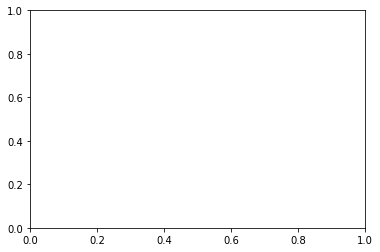

In [ ]:
auctions[auctions['sus']].groupby(['com_n'])['bid_date'].mean().hist()

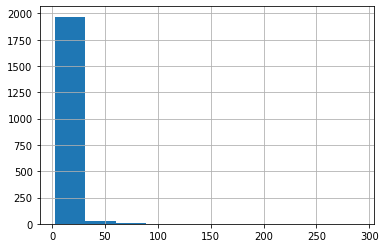

In [ ]:
auctions[auctions['sus']].groupby(['com_n'])['con.win'].mean().hist()

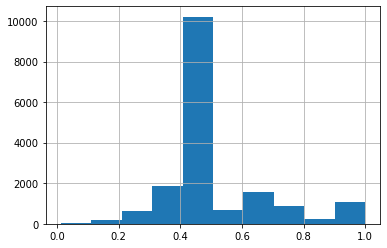

In [ ]:
auctions[~auctions['sus']].groupby(['com_n'])['con.win'].mean().hist()

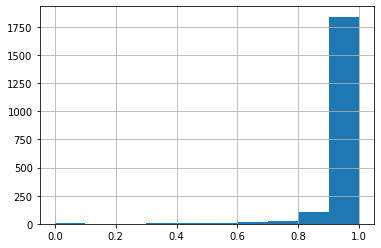

In [ ]:
auctions[auctions['sus'] & auctions['single']].groupby(['com_n'])['bid_price'].mean().hist()

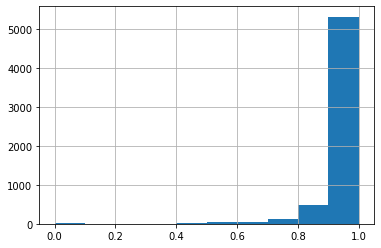

In [ ]:
auctions[(~auctions['sus']) & (auctions['single'])].groupby(['com_n'])['bid_price'].mean().hist()

In [ ]:
auctions[~auctions['sus']].groupby(['com_n'])['bid_date'].mean().mean()

Timedelta('1 days 23:33:00.222174335')

In [ ]:
print(auctions[auctions['sus']].groupby(['com_n'])['bid_price'].mean().mean())
auctions[~auctions['sus']].groupby(['com_n'])['bid_price'].mean().mean()

0.9547951841367864


0.9479528613306836

In [ ]:
print(auctions[auctions['sus']].groupby(['com_n'])['con.win'].mean().mean())
auctions[~auctions['sus']].groupby(['com_n'])['con.win'].mean().mean()

0.6200767611890413


0.5334270000060952

In [ ]:
print(auctions[auctions['sus']].groupby(['com_n'])['sel_num'].mean().mean())
auctions[~auctions['sus']].groupby(['com_n'])['sel_num'].mean().mean()

7.530606275204799


3.029342953903483

In [ ]:
print(auctions[auctions['sus']].groupby(['com_n'])['au.duration'].mean().mean())
auctions[~auctions['sus']].groupby(['com_n'])['au.duration'].mean().mean()

7.934988513605171


7.750193305727324

In [ ]:
import pandas as pd

auctions = pd.read_csv("/content/drive/MyDrive/Maria Mitrankova/counted.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6,9,23,26,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
from tqdm import tqdm

centralities = []
for i in tqdm(range(19376)):
  firms = auctions[(auctions['com_n'] == i)]['participant_inn'].unique().tolist()
  G = G_nw.subgraph(firms)
  c = nx.degree_centrality(G)
  centralities.append(c)

100%|██████████| 19376/19376 [02:34<00:00, 125.11it/s]


In [ ]:
centralities_cl = []
for i in tqdm(range(19376)):
  firms = auctions[(auctions['com_n'] == i)]['participant_inn'].unique().tolist()
  G = G_nw.subgraph(firms)
  c = nx.closeness_centrality(G)
  centralities_cl.append(c)

  0%|          | 1/19376 [5:02:35<97714:27:07, 18155.98s/it]

In [ ]:
import numpy as np

centrals = []
for m in centralities:
  central = []
  for key in m:
    central.append(m[key])
  central = np.array(central)
  centrals.append(central)

centrals = np.array(centrals)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
means = []
for c in centrals:
  means.append(c.mean())

In [ ]:
centralities = np.array(centralities)

In [ ]:
auctions['win_rate'] = auctions.groupby('participant_inn')['won'].transform('mean')
auctions['win_rate']

0          0.476684
1          0.617021
2          0.476190
3          0.330739
4          0.900000
             ...   
3243236    0.556701
3243237    0.523077
3243238    0.269916
3243239    0.319728
3243240    0.732984
Name: win_rate, Length: 3243241, dtype: float64

In [ ]:
global_d = {}
for c in centralities:
  global_d.update(c)

In [ ]:
auctions['d_centrality'] = auctions['participant_inn'].apply(lambda x: global_d.get(x))
auctions

Unnamed: 0  Unnamed: 0.1  purchase_number               region  \
0                 1        829607     3.323003e+17  Nizhegorodskaja_obl   
1                 2        829606     3.323003e+17  Nizhegorodskaja_obl   
2                 3        829608     3.323003e+17  Nizhegorodskaja_obl   
3                 4        829609     3.323003e+17  Nizhegorodskaja_obl   
4                 5        829610     3.323003e+17  Nizhegorodskaja_obl   
...             ...           ...              ...                  ...   
3243236     3375723       4273650     3.283000e+17    Vladimirskaja_obl   
3243237     3375724       4711880     3.303000e+17     Vologodskaja_obl   
3243238     3375725       3202809     3.731001e+17               Moskva   
3243239     3375726       3202808     3.731001e+17               Moskva   
3243240     3375727       3298605     3.422000e+17       Samarskaja_obl   

         procurer_reg_num   max_price currency           start_date  \
0            3.323003e+09    95690.00      NaN  2014-02-10 08:00:00   
1            3.323003e+09    95690.00      NaN  2014-02-10 08:00:00   
2            3.323003e+09    95690.00      NaN  2014-02-10 08:00:00   
3            3.323003e+09    95690.00      NaN  2014-02-10 08:00:00   
4            3.323003e+09    95690.00      NaN  2014-02-10 08:00:00   
...                   ...         ...      ...                  ...   
3243236      3.283000e+09  1288259.67      RUB  2021-12-31 12:32:29   
3243237      3.303000e+09   258615.57      RUB  2021-12-31 13:20:28   
3243238      3.731001e+09   500000.00      RUB  2021-12-31 14:08:08   
3243239      3.731001e+09   500000.00      RUB  2021-12-31 14:08:08   
3243240      3.422000e+09   315720.97      RUB  2021-12-31 14:29:53   

                    end_date prolong_date  ...  one_com  cv_price  cv_bidding  \
0        2014-02-13 16:30:00          NaN  ...     True       NaN         NaN   
1        2014-02-13 16:30:00          NaN  ...     True  6.269499    0.000039   
2        2014-02-13 16:30:00          NaN  ...     True       NaN         NaN   
3        2014-02-13 16:30:00          NaN  ...     True       NaN         NaN   
4        2014-02-13 16:30:00          NaN  ...     True       NaN         NaN   
...                      ...          ...  ...      ...       ...         ...   
3243236  2022-01-14 13:00:00          NaN  ...     True  1.225696    0.000008   
3243237  2022-01-17 09:00:00          NaN  ...     True  1.225696    0.000008   
3243238  2022-01-14 11:00:00          NaN  ...     True       NaN         NaN   
3243239  2022-01-14 11:00:00          NaN  ...     True  1.085352    0.000011   
3243240  2022-01-19 11:00:00          NaN  ...     True  1.210562    0.000012   

             code  stable  cartel  coherent  exclusive  win_rate  d_centrality  
0          nannan    True   False     False      False  0.476684      0.005502  
1          nannan    True   False     False      False  0.617021      0.002113  
2          nannan    True   False     False      False  0.476190      0.001937  
3          nannan    True   False     False      False  0.330739      0.015098  
4          nannan    True   False     False      False  0.900000      0.000308  
...           ...     ...     ...       ...        ...       ...           ...  
3243236  21.020.0    True   False     False      False  0.556701      0.009342  
3243237  21.020.0    True   False     False      False  0.523077      0.007526  
3243238  65.012.0    True   False     False      False  0.269916      0.385321  
3243239  65.012.0    True   False     False      False  0.319728      0.134557  
3243240  71.012.0    True   False     False      False  0.732984      0.005471  

[3243241 rows x 58 columns]

In [ ]:
mean_c = auctions.groupby('participant_inn')['d_centrality'].mean().mean()
mean_wr = auctions.groupby('participant_inn')['win_rate'].mean().mean()

In [ ]:
plt.heatmap(mean_c, mean_wr)

In [ ]:
print(auctions[(auctions['win_rate'] > mean_wr)  & (auctions['ev_centrality'] > mean_c) & auctions['stable']]['participant_inn'].nunique()/auctions[auctions['stable']]['participant_inn'].nunique())
print(auctions[(auctions['win_rate'] > mean_wr)  & (auctions['ev_centrality'] > mean_c) & (~auctions['stable'])]['participant_inn'].nunique()/auctions[~auctions['stable']]['participant_inn'].nunique())

0.04636844761325552
0.3857865478038764


In [ ]:
auctions['high_win'] = (auctions['win_rate'] > mean_wr)  & (auctions['d_centrality'] > mean_c)
auctions[auctions['high_win']]

Unnamed: 0  Unnamed: 0.1  purchase_number  \
18               21       2030068     8.101000e+17   
28               32       1658429     3.023000e+17   
46               51       1383832     3.583000e+17   
83               94        444862     1.048300e+18   
123             137       2628076     3.203000e+17   
...             ...           ...              ...   
3242940     3375422       4512181     3.873000e+17   
3242968     3375450       4036935     3.303001e+17   
3242992     3375475       3640813     3.722000e+17   
3242999     3375482       4644438     1.131000e+17   
3243112     3375598       3555720     3.653000e+17   

                                 region  procurer_reg_num  max_price currency  \
18       Severnaja_Osetija-Alanija_Resp      8.101000e+09  235232.91      NaN   
28                       Burjatija_Resp      3.023000e+09  248650.99      NaN   
46                      Rostovskaja_obl      3.583000e+09    4140.80      NaN   
83                      Moskovskaja_obl      1.048300e+10   19000.00      NaN   
123                     Primorskij_kraj      3.203000e+09  336329.67      NaN   
...                                 ...               ...        ...      ...   
3242940   Khanty-Mansijskij_AO-Jugra_AO      3.873000e+09  357785.20      RUB   
3242968                Vologodskaja_obl      3.303001e+09  636000.00      RUB   
3242992                 Sankt-Peterburg      3.722000e+09  467677.10      RUB   
3242999                Udmurtskaja_Resp      1.131000e+09   50000.00      RUB   
3243112                    Tomskaja_obl      3.653000e+09  499884.04      RUB   

                  start_date             end_date prolong_date  ...      code  \
18       2014-04-08 00:00:00  2014-04-17 18:00:00          NaN  ...    nannan   
28       2014-04-21 08:00:00  2014-04-24 17:00:00          NaN  ...    nannan   
46       2014-05-08 09:00:00  2014-05-15 17:00:00          NaN  ...    nannan   
83       2014-05-16 14:00:00  2014-05-20 14:00:00          NaN  ...    nannan   
123      2014-05-22 08:00:00  2014-05-30 10:00:00          NaN  ...    nannan   
...                      ...                  ...          ...  ...       ...   
3242940  2021-12-30 15:14:26  2022-01-14 12:00:00          NaN  ...   62.09.0   
3242968  2021-12-30 16:05:37  2022-01-18 09:00:00          NaN  ...  61.020.0   
3242992  2021-12-30 16:36:23  2022-01-14 10:00:00          NaN  ...  21.020.0   
3242999  2021-12-30 16:49:38  2022-01-14 10:00:00          NaN  ...  58.029.0   
3243112  2021-12-30 21:02:00  2022-01-14 10:00:00          NaN  ...  34.030.0   

         stable  cartel coherent  exclusive  win_rate  d_centrality  high_win  \
18        False   False    False       True  1.000000      2.000000      True   
28         True   False     True       True  1.000000      3.000000      True   
46         True   False     True       True  1.000000      3.000000      True   
83        False   False    False       True  1.000000      0.750000      True   
123        True   False     True       True  1.000000      3.000000      True   
...         ...     ...      ...        ...       ...           ...       ...   
3242940    True   False    False      False  0.752805      0.427211      True   
3242968    True   False    False      False  0.752805      0.427211      True   
3242992   False   False    False      False  1.000000      0.666667      True   
3242999   False   False    False       True  1.000000      1.333333      True   
3243112   False   False     True       True  1.000000      3.000000      True   

         ev_centrality  high_win_ev  
18            0.707107         True  
28            0.707107         True  
46            0.707107         True  
83            0.353551         True  
123           0.707107         True  
...                ...          ...  
3242940       0.524065         True  
3242968       0.524065         True  
3242992       0.246916         True  
3242999       0.601501         True  
3243112       0.707107 

In [ ]:
print(auctions[auctions['stable']]['high_win'].mean())
auctions[~auctions['stable']]['high_win'].mean()

0.018992743456412862


0.34194564136559497

In [ ]:
print(auctions[auctions['coherent'] & auctions['exclusive']]['high_win'].mean())
auctions[~(auctions['coherent'] & auctions['exclusive'])]['high_win'].mean()

0.6930354023624634


0.018992785880668796

In [ ]:
print(auctions[auctions['cartel']]['high_win'].mean())
auctions[~(auctions['cartel'])]['high_win'].mean()

0.042903249740317555


0.030808674802756317

In [ ]:
print(auctions[auctions['coherent'] & auctions['exclusive'] & auctions['stable']]['high_win'].mean())
auctions[~(auctions['coherent'] & auctions['exclusive'] & auctions['stable'])]['high_win'].mean()

0.6003981564809512


0.02449843633637417

In [ ]:
auctions[auctions['coherent'] & auctions['exclusive'] & auctions['stable'] & auctions['high_win']]

Unnamed: 0  Unnamed: 0.1  purchase_number  \
28               32       1658429     3.023000e+17   
46               51       1383832     3.583000e+17   
123             137       2628076     3.203000e+17   
230             249       2101177     3.112001e+17   
292             316       1038887     1.513000e+17   
...             ...           ...              ...   
3241739     3374178       3224700     3.732001e+17   
3241762     3374202       4773884     3.732001e+17   
3241981     3374426       3556233     3.732001e+17   
3242328     3374783       3836989     3.732000e+17   
3242355     3374812       3345093     3.873001e+17   

                                region  procurer_reg_num   max_price currency  \
28                      Burjatija_Resp      3.023000e+09   248650.99      NaN   
46                     Rostovskaja_obl      3.583000e+09     4140.80      NaN   
123                    Primorskij_kraj      3.203000e+09   336329.67      NaN   
230                     Tatarstan_Resp      3.112001e+09   461451.00      NaN   
292                 Novosibirskaja_obl      1.513000e+09    23940.00      NaN   
...                                ...               ...         ...      ...   
3241739                         Moskva      3.732001e+09  2945126.80      RUB   
3241762                         Moskva      3.732001e+09  2363532.60      RUB   
3241981                         Moskva      3.732001e+09  2975280.00      RUB   
3242328                         Moskva      3.732000e+09  1487259.85      RUB   
3242355  Khanty-Mansijskij_AO-Jugra_AO      3.873001e+09   173520.00      RUB   

                  start_date             end_date prolong_date  ...  cv_price  \
28       2014-04-21 08:00:00  2014-04-24 17:00:00          NaN  ...       NaN   
46       2014-05-08 09:00:00  2014-05-15 17:00:00          NaN  ...       NaN   
123      2014-05-22 08:00:00  2014-05-30 10:00:00          NaN  ...       NaN   
230      2014-05-26 09:00:00  2014-06-17 09:00:00          NaN  ...       NaN   
292      2014-05-27 11:00:00  2014-06-02 18:00:00          NaN  ...  0.565409   
...                      ...                  ...          ...  ...       ...   
3241739  2021-12-28 09:43:51  2022-01-12 09:00:00          NaN  ...  0.125551   
3241762  2021-12-28 10:53:43  2022-01-13 09:00:00          NaN  ...  0.125551   
3241981  2021-12-28 15:58:08  2022-01-12 09:00:00          NaN  ...  0.125551   
3242328  2021-12-29 13:50:21  2022-01-13 09:00:00          NaN  ...  1.411841   
3242355  2021-12-29 14:17:17  2022-01-13 08:30:00          NaN  ...       NaN   

           cv_bidding      code stable  cartel  coherent  exclusive  win_rate  \
28                NaN    nannan   True   False      True       True       1.0   
46                NaN    nannan   True   False      True       True       1.0   
123               NaN    nannan   True   False      True       True       1.0   
230               NaN    nannan   True   False      True       True       1.0   
292      1.417527e-05    nannan   True   False      True       True       0.5   
...               ...       ...    ...     ...       ...        ...       ...   
3241739  5.159645e-08  21.020.0   True    True      True       True       1.0   
3241762  5.159645e-08  21.020.0   True    True      True       True       1.0   
3241981  5.159645e-08  21.020.0   True    True      True       True       1.0   
3242328  1.897000e-06  10.051.0   True   False      True       True       1.0   
3242355           NaN  71.012.0   True    True      True       True       1.0   

         d_centrality  high_win  
28                3.0      True  
46                3.0      True  
123               3.0      True  
230               2.0      True  
292               3.0      True  
...               ...       ...  
3241739           3.0      True  
3241762           3.0      True  
3241981           3.0      True  
3242328           3.0      True  
3242355           2.0      True  

[22016 rows x 59 columns]

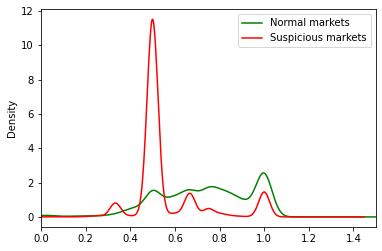

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1,1)
ax.set_xlim([0,1.5])
auctions[(~(auctions['exclusive'] & auctions['coherent'] & auctions['stable']))  & (auctions['com_n'] != -1)].groupby(['com_n'])['high_win_ev'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['exclusive']) & (auctions['coherent']) &  (auctions['com_n'] != -1) & (auctions['stable'])].groupby(['com_n'])['high_win_ev'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

In [ ]:
centralities_ev = []
for i in tqdm(range(19376)):
  firms = auctions[(auctions['com_n'] == i)]['participant_inn'].unique().tolist()
  G = G_nw.subgraph(firms)
  c = nx.eigenvector_centrality(G, max_iter=1000)
  centralities_ev.append(c)

100%|██████████| 19376/19376 [07:01<00:00, 46.01it/s] 


In [ ]:
centralities_ev[-1]

{-5753061178: 0.7071067811865475, -278970428: 0.7071067811865475}

In [ ]:
centralities_ev = np.array(centralities_ev)

In [ ]:
global_d_e = {}
for c in centralities_ev:
  global_d_e.update(c)

In [ ]:
auctions['ev_centrality'] = auctions['participant_inn'].apply(lambda x: global_d_e.get(x))
auctions

In [ ]:
mean_ev = auctions.groupby('participant_inn')['ev_centrality'].mean().mean()

In [ ]:
auctions['high_win_ev'] = (auctions['win_rate'] > mean_wr)  & (auctions['ev_centrality'] > mean_ev)
auctions[auctions['high_win_ev']]

Unnamed: 0  Unnamed: 0.1  purchase_number  \
18               21       2030068     8.101000e+17   
19               22       2551150     3.183002e+17   
28               32       1658429     3.023000e+17   
46               51       1383832     3.583000e+17   
83               94        444862     1.048300e+18   
...             ...           ...              ...   
3243175     3375661       4054952     3.283000e+17   
3243180     3375666       3834348     3.352000e+17   
3243185     3375671       3834350     3.352000e+17   
3243193     3375679       4389650     3.023000e+17   
3243194     3375680       4389652     3.023000e+17   

                                 region  procurer_reg_num  max_price currency  \
18       Severnaja_Osetija-Alanija_Resp      8.101000e+09  235232.91      NaN   
19                   Krasnodarskij_kraj      3.183002e+09   67340.00      NaN   
28                       Burjatija_Resp      3.023000e+09  248650.99      NaN   
46                      Rostovskaja_obl      3.583000e+09    4140.80      NaN   
83                      Moskovskaja_obl      1.048300e+10   19000.00      NaN   
...                                 ...               ...        ...      ...   
3243175               Vladimirskaja_obl      3.283000e+09   48660.00      RUB   
3243180            Kaliningradskaja_obl      3.352000e+09  322200.00      RUB   
3243185            Kaliningradskaja_obl      3.352000e+09  322200.00      RUB   
3243193                  Burjatija_Resp      3.023000e+09  764350.00      RUB   
3243194                  Burjatija_Resp      3.023000e+09  764350.00      RUB   

                  start_date             end_date prolong_date  ...      code  \
18       2014-04-08 00:00:00  2014-04-17 18:00:00          NaN  ...    nannan   
19       2014-04-08 13:00:00  2014-04-14 13:00:00          NaN  ...    nannan   
28       2014-04-21 08:00:00  2014-04-24 17:00:00          NaN  ...    nannan   
46       2014-05-08 09:00:00  2014-05-15 17:00:00          NaN  ...    nannan   
83       2014-05-16 14:00:00  2014-05-20 14:00:00          NaN  ...    nannan   
...                      ...                  ...          ...  ...       ...   
3243175  2021-12-31 08:46:20  2022-01-14 09:00:00          NaN  ...  32.050.0   
3243180  2021-12-31 08:55:29  2022-01-17 12:00:00          NaN  ...  32.050.0   
3243185  2021-12-31 08:55:29  2022-01-17 12:00:00          NaN  ...  32.050.0   
3243193  2021-12-31 09:56:54  2022-01-19 10:05:00          NaN  ...  10.012.0   
3243194  2021-12-31 09:56:54  2022-01-19 10:05:00          NaN  ...  10.012.0   

         stable  cartel coherent  exclusive  win_rate  d_centrality  high_win  \
18        False   False    False       True  1.000000      2.000000      True   
19         True   False    False      False  0.909836      0.023007     False   
28         True   False     True       True  1.000000      3.000000      True   
46         True   False     True       True  1.000000      3.000000      True   
83        False   False    False       True  1.000000      0.750000      True   
...         ...     ...      ...        ...       ...           ...       ...   
3243175    True   False    False      False  0.459502      0.027962     False   
3243180    True   False    False      False  0.387387      0.026275     False   
3243185    True   False    False      False  0.581325      0.038017     False   
3243193    True   False    False      False  0.489362      0.059036     False   
3243194    True   False    False      False  0.485714      0.039759     False   

         ev_centrality  high_win_ev  
18            0.707107         True  
19            0.089531         True  
28            0.707107         True  
46            0.707107         True  
83            0.353551         True  
...                ...          ...  
3243175       0.082579         True  
3243180       0.097590         True  
3243185       0.134639         True  
3243193       0.273780         True  
3243194       0.202317 

In [ ]:
auctions['bid_date'] = pd.to_timedelta(auctions['bid_date'])

In [ ]:
def conv_to_mins(date):
  return date // 3600

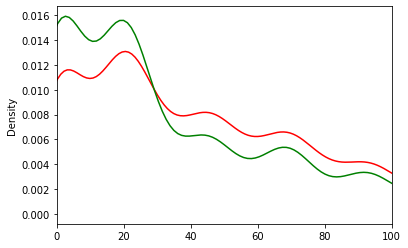

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,1e2])

auctions[auctions['high_win_ev']].groupby(['com_n'])['bid_date'].mean().dt.total_seconds().apply(conv_to_mins).plot.density(color='red', ax=ax, label='Suspicious markets')
auctions[~auctions['high_win_ev']].groupby(['com_n'])['bid_date'].mean().dt.total_seconds().apply(conv_to_mins).plot.density(color='green', ax=ax, label='Normal markets')

In [ ]:
print(auctions[(auctions['win_rate'] > mean_wr)  & (auctions['d_centrality'] > mean_c) & auctions['coherent'] & auctions['exclusive']]['participant_inn'].nunique())
print(auctions[(auctions['win_rate'] > mean_wr)  & (auctions['d_centrality'] > mean_c) & (~(auctions['coherent'] & auctions['exclusive']))]['participant_inn'].nunique())

18044
8468


In [ ]:
print(auctions[(auctions['win_rate'] > mean_wr)  & (auctions['d_centrality'] > mean_c) & auctions['cartel']]['participant_inn'].nunique())
print(auctions[(auctions['win_rate'] > mean_wr)  & (auctions['d_centrality'] > mean_c) & (~auctions['cartel'])]['participant_inn'].nunique())

607
25905


In [ ]:
print(auctions[(auctions['win_rate'] > mean_wr)  & (auctions['d_centrality'] > mean_c) & auctions['coherent'] & auctions['exclusive'] & auctions['stable']]['participant_inn'].nunique())
print(auctions[(auctions['win_rate'] > mean_wr)  & (auctions['d_centrality'] > mean_c) & (~(auctions['coherent'] & auctions['exclusive'] & auctions['stable']))]['participant_inn'].nunique())

14020
12492


In [ ]:
from scipy.stats import mannwhitneyu
mannwhitneyu(auctions[(auctions['sus']) & (auctions['single'])].groupby(['com_n'])['bid_price'].mean(), auctions[(~auctions['sus']) & (auctions['single'])].groupby(['com_n'])['bid_price'].mean())

MannwhitneyuResult(statistic=5670811.0, pvalue=1.3614544710568962e-06)

In [ ]:
mannwhitneyu(auctions[(auctions['sus']) & (auctions['single'])].groupby(['com_n'])['bid_date'].mean(), auctions[(~auctions['sus']) & (auctions['single'])].groupby(['com_n'])['bid_date'].mean())

In [ ]:
mannwhitneyu(auctions[(auctions['sus']) & (auctions['single'])].groupby(['com_n'])['con.win'].mean(), auctions[(~auctions['sus']) & (auctions['single'])].groupby(['com_n'])['con.win'].mean())

MannwhitneyuResult(statistic=5688683.5, pvalue=4.151018408111415e-06)

In [ ]:
mannwhitneyu(auctions[(auctions['sus']) & (auctions['single'])].groupby(['com_n'])['sel_num'].mean(), auctions[(~auctions['sus']) & (auctions['single'])].groupby(['com_n'])['sel_num'].mean())

MannwhitneyuResult(statistic=2408401.0, pvalue=0.0)

In [ ]:
mannwhitneyu(auctions[(auctions['sus']) & (auctions['single'])].groupby(['com_n'])['au.duration'].mean(), auctions[(~auctions['sus']) & (auctions['single'])].groupby(['com_n'])['au.duration'].mean())

MannwhitneyuResult(statistic=5379320.0, pvalue=1.4591231212037007e-15)

In [ ]:
#print(mannwhitneyu(auctions[auctions['sus']].groupby(['com_n'])['bid_date'].median(), auctions[~auctions['sus']].groupby(['com_n'])['bid_date'].median()))
print(mannwhitneyu(auctions[auctions['sus']].groupby(['com_n'])['bid_price'].median(), auctions[~auctions['sus']].groupby(['com_n'])['bid_price'].median()))
print(mannwhitneyu(auctions[auctions['sus']].groupby(['com_n'])['con.win'].median(), auctions[~auctions['sus']].groupby(['com_n'])['con.win'].median()))
print(mannwhitneyu(auctions[auctions['sus']].groupby(['com_n'])['sel_num'].median(), auctions[~auctions['sus']].groupby(['com_n'])['sel_num'].median()))
print(mannwhitneyu(auctions[auctions['sus']].groupby(['com_n'])['au.duration'].median(), auctions[~auctions['sus']].groupby(['com_n'])['au.duration'].median()))

MannwhitneyuResult(statistic=12727620.0, pvalue=4.7306740622424285e-88)
MannwhitneyuResult(statistic=11860854.0, pvalue=2.529061199112509e-132)
MannwhitneyuResult(statistic=2417407.5, pvalue=0.0)
MannwhitneyuResult(statistic=16912958.5, pvalue=0.015715781644550807)


In [ ]:
auctions[auctions['sus']]['region'].value_counts()

Magadanskaja_obl      1688
Krasnojarskij_kraj     874
Cheljabinskaja_obl     791
Irkutskaja_obl         789
Arkhangelskaja_obl     735
                      ... 
Khakasija_Resp          45
Neneckij_AO             32
Adygeja_Resp            28
Evrejskaja_Aobl         20
Sevastopol_g             2
Name: region, Length: 85, dtype: int64

In [ ]:
auctions[auctions['sus']]['code_1'].value_counts()

86.0    561
62.0    218
10.0    174
42.0    131
49.0    126
       ... 
8.0       2
91.0      2
77.0      2
31.0      1
64.0      1
Name: code_1, Length: 75, dtype: int64

In [ ]:
auctions[auctions['sus']]['name'].value_counts()

Услуги в области медицины прочие, не включенные в другие группировки                                            210
Услуги санаторно-курортных организаций                                                                          121
Услуги, предоставляемые врачами общей врачебной практики, прочие, не включенные в другие группировки             97
Услуги по технической поддержке информационных технологий                                                        76
Услуги по сопровождению компьютерных систем                                                                      75
                                                                                                               ... 
Услуги по перевозке грузов дорожными транспортными средствами, приводимыми в движение человеком или животным      1
Машины стиральные бытовые                                                                                         1
Молоко питьевое пастеризованное                                         

In [ ]:
auctions['code_1'] = auctions['code_1'].fillna(auctions['code_1_y'])
auctions['code_2'] = auctions['code_2'].fillna(auctions['code_2_y'])
auctions['code_3'] = auctions['code_3'].fillna(auctions['code_3_y'])
auctions['code_4'] = auctions['code_4'].fillna(auctions['code_4_y'])
auctions['name'] = auctions['name'].fillna(auctions['name_y'])

In [ ]:
auctions['single'].mean()

0.20824426612570682

In [ ]:
from tqdm import tqdm

descriptions = []
for i in tqdm(range(19376)):
  descriptions.append(describe_comm(auctions, i))
len(descriptions)

100%|██████████| 19376/19376 [4:04:52<00:00,  1.32it/s]


19376

In [ ]:
descriptions[]

array([list([]), list(['32.050.0', '21.020.0', '20.059.0'])], dtype=object)

In [ ]:
auctions.to_csv("/content/drive/MyDrive/Maria Mitrankova/backup.csv")

In [ ]:
import numpy as np

descriptions = np.array(descriptions)
len(descriptions[len(descriptions[0] == 0)])

2

In [ ]:
len(descriptions[len(descriptions[:,0] == 0)])

IndexError: ignored

In [ ]:
mylen = np.vectorize(len)
len(descriptions[mylen(descriptions[:, 0]) == 0])

324

In [ ]:
mylen(descriptions[:, 1][mylen(descriptions[:,1])!=0]).mean()

1.3845940319222763

In [ ]:
descriptions[mylen(descriptions[:, 1]) == mylen(descriptions[:, 1]).max()]

array([[list(['Kurskaja_obl']),
        list(['32.099.0', '93.01.0', '32.050.0', '24.065.0', '27.034.0', '74.070.0', '29.023.0', '36.063.0', '74.060.0', '29.022.0', '61.020.0', '22.011.0', '58.014.0', '17.022.0', '66.022.0', '68.020.0'])]],
      dtype=object)

In [ ]:
auctions.columns

Index(['Unnamed: 0', 'purchase_number', 'region', 'procurer_reg_num',
       'max_price', 'currency', 'start_date', 'end_date', 'prolong_date',
       'n_commission_members', 'participant_inn', 'price', 'date',
       'is_approved', 'is_after_prolong', 'auction_id', 'Unnamed: 0.1',
       'code_1', 'code_2', 'code_3', 'code_4', 'name', 'object', 'single',
       'bid_date', 'bid_price', 'con.met', 'won', 'con.win', 'sel_num',
       'sel.period', 'au.reserve', 'au.duration', 'auciton_id', 'com_n', 'sus',
       'com', 'Unnamed: 0_x', 'auction_id_x', 'procurer_reg_num_x',
       'start_date_x', 'code_1_x', 'code_2_x', 'code_3_x', 'code_4_x',
       'if_okpd2', 'name_x', 'region_id', 'code'],
      dtype='object')

In [ ]:
auctions[auctions['com_n'] == 4]['name'].value_counts().head(10)

Инструменты и приспособления, применяемые в медицинских целях, прочие, не включенные в другие группировки                                                                      19727
Реагенты сложные диагностические или лабораторные прочие, не включенные в другие группировки                                                                                    6247
Шприцы, иглы, катетеры, канюли и аналогичные инструменты                                                                                                                        6141
Изделия медицинские, в том числе хирургические, прочие, не включенные в другие группировки                                                                                      5480
Средства дезинфекционные                                                                                                                                                        4012
Изделия медицинские, в том числе хирургические, прочие                                         

In [ ]:
auctions[auctions['code'] == '33.012.0']['name']

1142865    Услуги по ремонту и техническому обслуживанию ...
1142873    Услуги п о ремонту и техническому обслуживанию...
1142874    Услуги п о ремонту и техническому обслуживанию...
1142875    Услуги п о ремонту и техническому обслуживанию...
1142876    Услуги п о ремонту и техническому обслуживанию...
                                 ...                        
3375638    Услуги по ремонту и техническому обслуживанию ...
3375639    Услуги по ремонту и техническому обслуживанию ...
3375640    Услуги по ремонту и техническому обслуживанию ...
3375641    Услуги по ремонту и техническому обслуживанию ...
3375642    Услуги по ремонту и техническому обслуживанию ...
Name: name, Length: 49027, dtype: object

In [ ]:
similar = {}
are_subsets = {}
for i in range(len(descriptions)):
  for j, d in enumerate(descriptions[i+1:], start=i+1):
    if len(d[1]) == 0 or len(descriptions[i][1]) == 0:
      continue
    if len(d[0]) == 0 or len(descriptions[i][0]) == 0:
      continue
    if j in are_subsets:
      continue
    # elif descriptions[i][0] == 'regional' and d[0] == 'regional':
    if set(d[0])== (set(descriptions[i][0])) and set(d[1]) == (set(descriptions[i][1])):
      similar[i] = similar.get(i, [])
      similar[i].append((j, d))
      are_subsets[j] = 1
len(similar)

2258

In [ ]:
similar

{90: [(614, (['Kalmykija_Resp'], ['23.020.0', '19.020.0'])),
  (615, (['Kalmykija_Resp'], ['23.020.0', '19.020.0']))],
 91: [(208, (['Moskva'], ['71.012.0'])),
  (1828, (['Moskva'], ['71.012.0'])),
  (4759, (['Moskva'], ['71.012.0'])),
  (4778, (['Moskva'], ['71.012.0'])),
  (4787, (['Moskva'], ['71.012.0'])),
  (15461, (['Moskva'], ['71.012.0'])),
  (15577, (['Moskva'], ['71.012.0'])),
  (15854, (['Moskva'], ['71.012.0'])),
  (16368, (['Moskva'], ['71.012.0'])),
  (18773, (['Moskva'], ['71.012.0'])),
  (19146, (['Moskva'], ['71.012.0']))],
 147: [(9138, (['Moskovskaja_obl'], ['41.00.0'])),
  (18593, (['Moskovskaja_obl'], ['41.00.0'])),
  (18683, (['Moskovskaja_obl'], ['41.00.0']))],
 155: [(207, (['Permskij_kraj'], ['29.014.0'])),
  (1657, (['Permskij_kraj'], ['29.014.0']))],
 174: [(523, (['Sankt-Peterburg'], ['77.011.0'])),
  (4375, (['Sankt-Peterburg'], ['77.011.0'])),
  (14268, (['Sankt-Peterburg'], ['77.011.0']))],
 184: [(19327, (['Chukotskij_AO'], ['43.039.0']))],
 200: [(1277,

In [ ]:
f = open("/content/drive/MyDrive/Maria Mitrankova/demofile6.txt", "w")
f.write(str(descriptions))
f.close()

In [ ]:
with open(r'/content/drive/MyDrive/Maria Mitrankova/demofile5.txt', 'w') as fp:
    for item in list(susp):
        # write each item on a new line
        fp.write("%s " % item)
    print('Done')

Done


In [ ]:
f = open("/content/drive/MyDrive/Maria Mitrankova/demofile6.txt", "r")
s = ''
for l in f.readlines():
  s += l

s 

"[([], []), ([], ['18.012.0', '17.023.0']), ([], ['34.030.0', '45.020.0', '19.020.0', '22.011.0']), (['Krasnodarskij_kraj', 'Rostovskaja_obl', 'Stavropolskij_kraj', 'Kabardino-Balkarskaja_Resp', 'Adygeja_Resp', 'Krim_Resp', 'Severnaja_Osetija-Alanija_Resp', 'Karachaevo-Cherkesskaja_Resp'], []), ([], ['32.050.0', '21.020.0', '20.059.0']), (['Moskovskaja_obl', 'Moskva', 'Tverskaja_obl', 'Rjazanskaja_obl', 'Kaluzhskaja_obl', 'Tulskaja_obl'], ['33.012.0']), ([], ['28.023.0', '26.020.0', '95.011.0']), (['Sankt-Peterburg', 'Leningradskaja_obl', 'Pskovskaja_obl', 'Novgorodskaja_obl', 'Karelija_Resp'], []), ([], ['27.040.0']), (['Khanty-Mansijskij_AO-Jugra_AO', 'Sverdlovskaja_obl', 'Cheljabinskaja_obl', 'Tjumenskaja_obl', 'Kurganskaja_obl'], []), (['Krasnojarskij_kraj', 'Irkutskaja_obl', 'Burjatija_Resp', 'Khakasija_Resp', 'Tyva_Resp'], []), (['Novosibirskaja_obl', 'Kemerovskaja_obl', 'Tomskaja_obl', 'Altajskij_kraj', 'Altaj_Resp'], []), ([], ['71.020.0']), ([], ['74.070.0', '74.060.0', '80.02

In [ ]:
# up = ''
# for ch in s:
#   if ch.isdigit() or ch == '[' or ch == ',' or ch =='.' or ch == ']':
#     up += ch

# up

# l = up.split('],[')
# l
# for el in l.copy():
#   if not (el and el[0].isdigit()):
#     l.remove(el)
# l
for i in range(len(l)):
  l[i] = l[i].split(',')
len(l)
l

In [ ]:
susp = set()
for k in similar:
  susp.add(k)
  for f in similar[k]:
    susp.add(f[0])
len(susp)

7008

In [ ]:
lis

In [ ]:
auctions['cartel'] = auctions['com_n'].isin(susp)

In [ ]:
auctions.loc[(~auctions['participant_inn'].isin(gr_ns['participant_inn'])), ['com_n']] = -1

In [ ]:
auctions['one_com'] = auctions.groupby('auction_id')['com_n'].transform('nunique') == 1
auctions['cv_price'] = auctions[auctions['one_com'] & auctions['won']].groupby('com_n')['price'].transform('std')

In [ ]:
auctions['cv_price'] = auctions['cv_price'] / auctions[auctions['one_com'] & auctions['won']].groupby('com_n')['price'].transform('mean')
auctions['cv_price']

0          6.925598
1               NaN
2          1.463424
3               NaN
4               NaN
             ...   
3375723    1.225696
3375724    1.225696
3375725         NaN
3375726    1.085352
3375727    1.210562
Name: cv_price, Length: 3375728, dtype: float64

In [ ]:
auctions['cv_bidding'] = auctions[auctions['one_com']].groupby(['com_n', 'auction_id'])['price'].transform('std')
auctions['cv_bidding'] = auctions['cv_price'] / (auctions[auctions['one_com'] & auctions['won']].groupby(['com_n', 'auction_id'])['price'].transform('mean') + 1e-6)
auctions['cv_bidding']

0          4.474768e-05
1                   NaN
2          1.786842e-05
3                   NaN
4                   NaN
               ...     
3375723    9.514354e-07
3375724    4.763887e-06
3375725             NaN
3375726    6.620672e-06
3375727    3.834279e-06
Name: cv_bidding, Length: 3375728, dtype: float64

In [ ]:
import numpy as np

auctions[auctions['cv_bidding'] == np.inf]['price']

1922       0.0
1939       0.0
5327       0.0
8948       0.0
10048      0.0
          ... 
2669043    0.0
2669434    0.0
2672078    0.0
2672624    0.0
2673054    0.0
Name: price, Length: 1439, dtype: float64

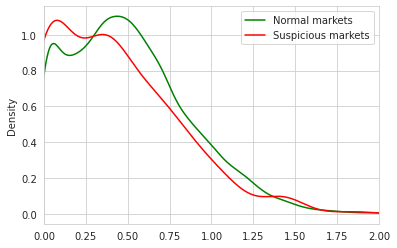

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1,1)
ax.set_xlim([0,2])
auctions[(~auctions['cartel'])  & (auctions['com_n'] != -1) ].groupby(['com_n'])['cv_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['cartel']) & (auctions['com_n'] != -1)].groupby(['com_n'])['cv_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

In [ ]:
from scipy.stats import mannwhitneyu

mannwhitneyu(auctions[(~auctions['cartel'])  & (auctions['com_n'] != -1)].groupby(['com_n'])['cv_price'].mean(), auctions[(auctions['cartel'])  & (auctions['com_n'] != -1)].groupby(['com_n'])['cv_price'].mean())

MannwhitneyuResult(statistic=2734591.5, pvalue=1.9468455744927923e-21)

In [ ]:
mannwhitneyu(auctions[(~auctions['cartel'])  & (auctions['com_n'] != -1)].groupby(['com_n'])['cv_bidding'].mean(), auctions[(auctions['cartel'])  & (auctions['com_n'] != -1)].groupby(['com_n'])['cv_bidding'].mean())

MannwhitneyuResult(statistic=2494135.5, pvalue=1.775424299011833e-31)

In [ ]:
mannwhitneyu(auctions[(~auctions['cartel'])  & (auctions['com_n'] != -1) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean(), auctions[(auctions['cartel'])  & (auctions['com_n'] != -1) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean())

MannwhitneyuResult(statistic=3597523.5, pvalue=0.0523001483976556)

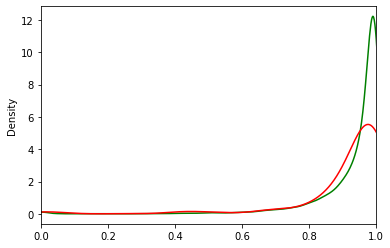

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1,1)
ax.set_xlim([0,1])
auctions[(~auctions['cartel'])  & (auctions['com_n'] != -1) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean().plot.density(color='green', ax=ax)
auctions[(auctions['cartel']) & (auctions['com_n'] != -1) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean().plot.density(color='red', ax=ax)

In [ ]:
auctions[(~auctions['cartel'])  & (auctions['com_n'] != -1) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean().mean()
#auctions[(auctions['cartel']) & (auctions['com_n'] != -1) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean().mean()

0.934175263688066

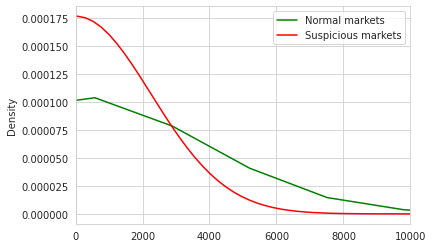

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,10000])
auctions[(~auctions['cartel'])  & (auctions['com_n'] != -1)].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['cartel']) & (auctions['com_n'] != -1)].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
ax.legend()

In [ ]:
auctions[(auctions['cartel']) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_price'].mean().mean()

0.93519843674637

In [ ]:
auctions[(~auctions['cartel'])  & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_price'].mean().mean()

0.9489405400595505

In [ ]:
import numpy as np
from tqdm import tqdm 

coherence = []
for i in tqdm(range(19376)):
  firms = auctions[auctions['com_n'] == i]['participant_inn'].unique().tolist()
  com = G_nw.subgraph(firms).copy()
  w = []
  for e in com.edges():
    w.append(com.get_edge_data(*e)['weight'])
  w = np.array(w)
  ch = np.prod(w) ** (1/len(w)) / np.mean(w)
  coherence.append(ch)

  0%|          | 94/19376 [00:41<10:19, 31.12it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in power
  if sys.path[0] == '':
100%|██████████| 19376/19376 [02:49<00:00, 114.48it/s]


In [ ]:
import numpy as np
from tqdm import tqdm 

exclusivity = []
for i in tqdm(range(19376)):
  firms = auctions[auctions['com_n'] == i]['participant_inn'].unique().tolist()
  ex = nx.conductance(G_nw, firms, weight='weight')
  exclusivity.append(1 - ex)

  3%|▎         | 559/19376 [43:09<24:12:49,  4.63s/it]


KeyboardInterrupt: ignored

In [ ]:
while len(exclusivity) != 19376:
  exclusivity.append(1.0)

In [ ]:
f = open("/content/drive/MyDrive/Maria Mitrankova/demofile4.txt", "w")
f.write(str(exclusivity))
f.close()

In [ ]:
comps2 = [c for c in sorted(nx.connected_components(G_nw), key=len, reverse=True)]
comps2
print(len(comps2))

18971


In [ ]:
nx.conductance(G_nw, coms_55.communities[0], weight='weight')

In [ ]:
coherence = np.array(coherence)

In [ ]:
susp = list(susp)
coherence[susp][~np.isnan(coherence[susp])].mean()

0.9672570821170651

In [ ]:
mask = np.ones(coherence.shape, dtype=bool)
mask[susp] = False
coherence[mask][~np.isnan(coherence[mask])].mean()

0.975058180845283

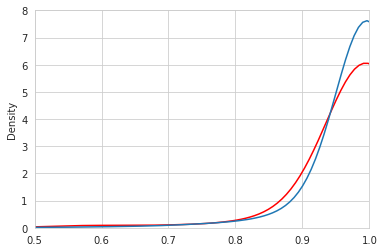

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


figure, ax = plt.subplots(1,1)
ax.set_xlim([0.5, 1])
sns.set_style('whitegrid')
sns.kdeplot(coherence[susp], bw=0.5, color='red')
sns.kdeplot(coherence[mask], bw=0.5)

In [ ]:
coms_l = algorithms.louvain(G_nw)
len(coms_l.communities)

19403

In [ ]:
mylen(descriptions[:, 1]).max()

8

In [ ]:
descriptions = np.array(descriptions)
mylen = np.vectorize(len)
mylen(descriptions[:, 1][mylen(descriptions[:,1])!=0]).mean()

1.2865921787709498

In [ ]:
auctions[auctions['com_n'] == 1]['participant_inn'].unique().tolist()

[-7717645510,
 -7722760701,
 -278069132,
 -26800541563,
 -268006143,
 -5020075388,
 -6901045738,
 -6950129130,
 -6950110355,
 -140201018430,
 -3527001474,
 -7839474364,
 -550102235046,
 -1832113287,
 -5404479860,
 -6027087786,
 -7814607439,
 -434581231961,
 -7709201158,
 -5506054306,
 -2725109560,
 -2724092345,
 -2721207573,
 -2724172840,
 -2703102773,
 -2721183900,
 -2721199717,
 -2723150139,
 -3628001008,
 -507304232401,
 -503401184861,
 -1101132453,
 -110101811460,
 -4345257950,
 -110104315,
 -7203287834,
 -110110729437,
 -1101063030,
 -7730151446,
 -431800430011,
 -1435254556,
 -1403000195,
 -732192921928,
 -732802046393,
 -840102644107,
 -4101002134,
 -4100021900,
 -6714012309,
 -4100004888,
 -5611021250,
 -5612082961,
 -5611050660,
 -7207013810,
 -7207008129,
 -7719748550,
 -90108238101,
 -7733863219,
 -6454089000,
 -190116498402,
 -6317038325,
 -6371014525,
 -616511465391,
 -6140020640,
 -616102420255,
 -6140023224,
 -8610024381,
 -2540149055,
 -2901166260,
 -2901205800,
 -38100

In [ ]:
coherence = np.array(coherence)

In [ ]:
auctions[auctions['com_n'] == 96] 

Unnamed: 0  purchase_number              region  procurer_reg_num  \
15802        777500     3.513001e+17  Novosibirskaja_obl      3.513001e+09   
15907         11570     1.713000e+17   Jaroslavskaja_obl      1.713000e+09   
18341       1507210     1.292000e+17  Volgogradskaja_obl      1.292000e+09   
18342       1507211     1.292000e+17  Volgogradskaja_obl      1.292000e+09   
20323       1854810     1.313000e+17   Voronezhskaja_obl      1.313000e+09   
...             ...              ...                 ...               ...   
3203346     4341419     1.192000e+17  Krasnojarskij_kraj      1.192000e+09   
3203347     4341420     1.192000e+17  Krasnojarskij_kraj      1.192000e+09   
3203348     4341421     1.192000e+17  Krasnojarskij_kraj      1.192000e+09   
3233481     3155222     1.712000e+17   Jaroslavskaja_obl      1.712000e+09   
3233482     3155223     1.712000e+17   Jaroslavskaja_obl      1.712000e+09   

         max_price currency           start_date             end_date  \
15802    237499.50      NaN  2014-06-10 09:00:00  2014-06-17 17:00:00   
15907    201313.99      NaN  2014-06-10 09:00:00  2014-06-18 10:00:00   
18341     18166.67      NaN  2014-06-11 08:30:00  2014-06-24 11:20:00   
18342     18166.67      NaN  2014-06-11 08:30:00  2014-06-24 11:20:00   
20323     60320.00      NaN  2014-06-11 16:00:00  2014-06-20 08:00:00   
...            ...      ...                  ...                  ...   
3203346  128036.04      RUB  2020-11-10 16:15:22  2020-11-18 08:00:00   
3203347  128036.04      RUB  2020-11-10 16:15:22  2020-11-18 08:00:00   
3203348  128036.04      RUB  2020-11-10 16:15:22  2020-11-18 08:00:00   
3233481  379075.00      RUB  2020-12-22 14:12:32  2021-01-14 09:00:00   
3233482  379075.00      RUB  2020-12-22 14:12:32  2021-01-14 09:00:00   

        prolong_date  n_commission_members  ...  au.reserve  au.duration  \
15802            NaN                     4  ...    0.474999            7   
15907            NaN                     5  ...    0.402628            8   
18341            NaN                     3  ...    0.036333           13   
18342            NaN                     3  ...    0.036333           13   
20323            NaN                     7  ...    0.120640            8   
...              ...                   ...  ...         ...          ...   
3203346          NaN                     3  ...    0.256072            7   
3203347          NaN                     3  ...    0.256072            7   
3203348          NaN                     3  ...    0.256072            7   
3233481          NaN                     6  ...    0.758150           22   
3233482          NaN                     6  ...    0.758150           22   

        auciton_id  com_n    sus    com  cartel  one_com  cv_price  cv_bidding  
15802       348738     96  False  False    True    False       NaN         NaN  
15907         5895     96  False  False    True     True  0.751277    0.000004  
18341       705111     96  False  False    True     True       NaN         NaN  
18342       705111     96  False  False    True     True  0.751277    0.000046  
20323       872848     96  False  False    True     True  0.751277    0.000013  
...            ...    ...    ...    ...     ...      ...       ...         ...  
3203346    4051427     96  False  False    True     True  0.751277    0.000007  
3203347    4051427     96  False  False    True     True       NaN         NaN  
3203348    4051427     96  False  False    True     True       NaN         NaN  
3233481    5418210     96  False  False    True     True  0.751277    0.000002  
3233482    5418210     96  False  False    True     True       NaN         NaN  

[318 rows x 50 columns]

In [ ]:
similar = {96: [(204, ('regional', ['Moskva'], ['71.012.0'])),
  (1813, ('regional', ['Moskva'], ['71.012.0'])),
  (4752, ('regional', ['Moskva'], ['71.012.0'])),
  (4770, ('regional', ['Moskva'], ['71.012.0'])),
  (4779, ('regional', ['Moskva'], ['71.012.0'])),
  (18766, ('regional', ['Moskva'], ['71.012.0'])),
  (19139, ('regional', ['Moskva'], ['71.012.0']))],
 133: [(18686, ('regional', ['Moskovskaja_obl'], ['81.029.0'])),
  (19086, ('regional', ['Moskovskaja_obl'], ['81.029.0']))],
 155: [(18586, ('regional', ['Moskovskaja_obl'], ['41.00.0'])),
  (18676, ('regional', ['Moskovskaja_obl'], ['41.00.0']))],
 158: [(4593, ('regional', ['Kaliningradskaja_obl'], ['55.051.0']))],
 209: [(18227, ('regional', ['Moskovskaja_obl'], ['81.021.0']))],
 222: [(301, ('regional', ['Permskij_kraj'], ['2.020.0'])),
  (4763, ('regional', ['Permskij_kraj'], ['2.020.0'])),
  (19111, ('regional', ['Permskij_kraj'], ['2.020.0']))],
 234: [(950, ('regional', ['Khabarovskij_kraj'], ['55.090.0'])),
  (18901, ('regional', ['Khabarovskij_kraj'], ['55.090.0'])),
  (18902, ('regional', ['Khabarovskij_kraj'], ['55.090.0']))],
 245: [(19042, ('regional', ['Zabajkalskij_kraj'], ['5.020.0']))],
 270: [(318, ('regional', ['Moskovskaja_obl'], ['96.03.0'])),
  (1783, ('regional', ['Moskovskaja_obl'], ['96.03.0'])),
  (4723, ('regional', ['Moskovskaja_obl'], ['96.03.0'])),
  (18538, ('regional', ['Moskovskaja_obl'], ['96.03.0']))],
 441: [(1801, ('regional', ['Moskovskaja_obl'], ['82.030.0']))],
 445: [(19027, ('regional', ['Khanty-Mansijskij_AO-Jugra_AO'], ['19.020.0']))],
 591: [(19151, ('regional', ['Rostovskaja_obl'], ['19.020.0']))],
 679: [(18847, ('regional', ['Moskva'], ['32.050.0'])),
  (18940, ('regional', ['Moskva'], ['32.050.0'])),
  (19145, ('regional', ['Moskva'], ['32.050.0'])),
  (19220, ('regional', ['Moskva'], ['32.050.0'])),
  (19252, ('regional', ['Moskva'], ['32.050.0'])),
  (19279, ('regional', ['Moskva'], ['32.050.0']))],
 790: [(4747, ('regional', ['Tatarstan_Resp'], ['43.039.0'])),
  (18834, ('regional', ['Tatarstan_Resp'], ['43.039.0']))],
 813: [(952, ('regional', ['Cheljabinskaja_obl'], ['49.041.0']))],
 897: [(1807, ('regional', ['Moskovskaja_obl'], ['45.020.0'])),
  (4679, ('regional', ['Moskovskaja_obl'], ['45.020.0'])),
  (4702, ('regional', ['Moskovskaja_obl'], ['45.020.0'])),
  (18507, ('regional', ['Moskovskaja_obl'], ['45.020.0'])),
  (18655, ('regional', ['Moskovskaja_obl'], ['45.020.0'])),
  (18754, ('regional', ['Moskovskaja_obl'], ['45.020.0'])),
  (18854, ('regional', ['Moskovskaja_obl'], ['45.020.0'])),
  (18893, ('regional', ['Moskovskaja_obl'], ['45.020.0']))],
 922: [(18733, ('regional', ['Moskovskaja_obl'], ['86.090.0']))],
 927: [(18677, ('regional', ['Moskovskaja_obl'], ['63.099.0']))],
 943: [(18687, ('regional', ['Lipeckaja_obl'], ['86.090.0']))],
 949: [(1162, ('regional', ['Novosibirskaja_obl'], ['55.090.0'])),
  (2939, ('regional', ['Novosibirskaja_obl'], ['55.090.0'])),
  (4784, ('regional', ['Novosibirskaja_obl'], ['55.090.0'])),
  (18819, ('regional', ['Novosibirskaja_obl'], ['55.090.0'])),
  (18858, ('regional', ['Novosibirskaja_obl'], ['55.090.0']))],
 1091: [(9628, ('regional', ['Arkhangelskaja_obl'], ['45.023.0'])),
  (11026, ('regional', ['Arkhangelskaja_obl'], ['45.023.0'])),
  (12448, ('regional', ['Arkhangelskaja_obl'], ['45.023.0']))],
 1253: [(18752, ('regional', ['Udmurtskaja_Resp'], ['56.029.0']))],
 1265: [(19293, ('regional', ['Krasnojarskij_kraj'], ['42.011.0']))],
 1290: [(19036, ('regional', ['Novosibirskaja_obl'], ['55.030.0']))],
 1390: [(4722, ('regional', ['Kaliningradskaja_obl'], ['56.029.0']))],
 1524: [(4732, ('regional', ['Krasnojarskij_kraj'], ['93.029.0']))],
 1542: [(2664, ('regional', ['Arkhangelskaja_obl'], ['70.012.0'])),
  (7970, ('regional', ['Arkhangelskaja_obl'], ['70.012.0'])),
  (8324, ('regional', ['Arkhangelskaja_obl'], ['70.012.0'])),
  (13804, ('regional', ['Arkhangelskaja_obl'], ['70.012.0']))],
 1617: [(19160, ('regional', ['Tulskaja_obl'], ['81.029.0']))],
 1649: [(3812, ('regional', ['Saratovskaja_obl'], ['56.029.0']))],
 1702: [(18914, ('regional', ['Nizhegorodskaja_obl'], ['2.020.0']))],
 1751: [(1810, ('regional', ['Moskovskaja_obl'], ['56.029.0']))],
 1757: [(14856, ('regional', ['Arkhangelskaja_obl'], ['10.071.0'])),
  (15590, ('regional', ['Arkhangelskaja_obl'], ['10.071.0'])),
  (16383, ('regional', ['Arkhangelskaja_obl'], ['10.071.0']))],
 1790: [(4684, ('regional', ['Irkutskaja_obl'], ['45.011.0']))],
 1791: [(18722, ('regional', ['Sankt-Peterburg'], ['71.012.0']))],
 1793: [(19052, ('regional', ['Zabajkalskij_kraj'], ['81.029.0']))],
 1798: [(18706, ('regional', ['Moskovskaja_obl'], ['18.012.0']))],
 1800: [(19231, ('regional', ['Kurganskaja_obl'], ['81.029.0']))],
 1811: [(18736, ('regional', ['Ivanovskaja_obl'], ['32.050.0']))],
 1914: [(19309, ('regional', ['Kaliningradskaja_obl'], ['43.099.0']))],
 1946: [(18785, ('regional', ['Moskva'], ['82.030.0'])),
  (18800, ('regional', ['Moskva'], ['82.030.0'])),
  (18851, ('regional', ['Moskva'], ['82.030.0']))],
 2125: [(4745, ('regional', ['Nizhegorodskaja_obl'], ['82.030.0']))],
 2322: [(7200, ('regional', ['Astrakhanskaja_obl'], ['45.043.0']))],
 2369: [(6413, ('regional', ['Arkhangelskaja_obl'], ['45.033.0'])),
  (12701, ('regional', ['Arkhangelskaja_obl'], ['45.033.0']))],
 2572: [(18948, ('regional', ['Rjazanskaja_obl'], ['55.090.0']))],
 2691: [(18604, ('regional', ['Moskovskaja_obl'], ['42.011.0']))],
 3219: [(18993, ('regional', ['Bashkortostan_Resp'], ['81.029.0']))],
 3224: [(19058, ('regional', ['Irkutskaja_obl'], ['43.029.0']))],
 3653: [(4182, ('regional', ['Sverdlovskaja_obl'], ['93.029.0'])),
  (18826, ('regional', ['Sverdlovskaja_obl'], ['93.029.0'])),
  (18863, ('regional', ['Sverdlovskaja_obl'], ['93.029.0'])),
  (18872, ('regional', ['Sverdlovskaja_obl'], ['93.029.0'])),
  (18895, ('regional', ['Sverdlovskaja_obl'], ['93.029.0']))],
 3671: [(19184, ('regional', ['Sverdlovskaja_obl'], ['81.029.0']))],
 3700: [(4997, ('regional', ['Arkhangelskaja_obl'], ['45.021.0'])),
  (5408, ('regional', ['Arkhangelskaja_obl'], ['45.021.0'])),
  (7711, ('regional', ['Arkhangelskaja_obl'], ['45.021.0'])),
  (9459, ('regional', ['Arkhangelskaja_obl'], ['45.021.0'])),
  (10006, ('regional', ['Arkhangelskaja_obl'], ['45.021.0']))],
 3949: [(18845, ('regional', ['Irkutskaja_obl'], ['93.029.0']))],
 4031: [(10466, ('regional', ['Arkhangelskaja_obl'], ['1.012.0']))],
 4086: [(4427, ('regional', ['Arkhangelskaja_obl'], ['49.041.0'])),
  (18414, ('regional', ['Arkhangelskaja_obl'], ['49.041.0']))],
 4366: [(18672, ('regional', ['Moskovskaja_obl'], ['1.012.0'])),
  (18673, ('regional', ['Moskovskaja_obl'], ['1.012.0'])),
  (18674, ('regional', ['Moskovskaja_obl'], ['1.012.0'])),
  (18683, ('regional', ['Moskovskaja_obl'], ['1.012.0']))],
 4414: [(15032, ('regional', ['Arkhangelskaja_obl'], ['42.011.0'])),
  (17797, ('regional', ['Arkhangelskaja_obl'], ['42.011.0'])),
  (18579, ('regional', ['Arkhangelskaja_obl'], ['42.011.0']))],
 4511: [(4803, ('regional', ['Moskva'], ['71.020.0']))],
 4562: [(19272, ('regional', ['Kemerovskaja_obl'], ['43.039.0']))],
 4576: [(4709, ('regional', ['Arkhangelskaja_obl'], ['2.020.0'])),
  (4710, ('regional', ['Arkhangelskaja_obl'], ['2.020.0'])),
  (11571, ('regional', ['Arkhangelskaja_obl'], ['2.020.0'])),
  (14947, ('regional', ['Arkhangelskaja_obl'], ['2.020.0'])),
  (18430, ('regional', ['Arkhangelskaja_obl'], ['2.020.0'])),
  (18561, ('regional', ['Arkhangelskaja_obl'], ['2.020.0'])),
  (18614, ('regional', ['Arkhangelskaja_obl'], ['2.020.0'])),
  (18646, ('regional', ['Arkhangelskaja_obl'], ['2.020.0'])),
  (18652, ('regional', ['Arkhangelskaja_obl'], ['2.020.0'])),
  (18698, ('regional', ['Arkhangelskaja_obl'], ['2.020.0'])),
  (19103, ('regional', ['Arkhangelskaja_obl'], ['2.020.0']))],
 4633: [(4781, ('regional', ['Vladimirskaja_obl'], ['56.029.0']))],
 4687: [(19106, ('regional', ['Moskovskaja_obl'], ['71.012.0']))],
 4725: [(18817, ('regional', ['Sverdlovskaja_obl'], ['1.012.0']))],
 4731: [(6390, ('regional', ['Nizhegorodskaja_obl'], ['42.011.0']))],
 4740: [(18904, ('regional', ['Permskij_kraj'], ['43.099.0'])),
  (19234, ('regional', ['Permskij_kraj'], ['43.099.0'])),
  (19240, ('regional', ['Permskij_kraj'], ['43.099.0']))],
 4775: [(19197, ('regional', ['Nizhegorodskaja_obl'], ['43.099.0'])),
  (19233, ('regional', ['Nizhegorodskaja_obl'], ['43.099.0']))],
 4778: [(19068, ('regional', ['Altajskij_kraj'], ['49.041.0']))],
 4787: [(19062, ('regional', ['Sakha_Jakutija_Resp'], ['33.012.0']))],
 4796: [(19094, ('regional', ['Burjatija_Resp'], ['2.020.0']))],
 4799: [(4817, ('regional', ['Khanty-Mansijskij_AO-Jugra_AO'], ['71.012.0']))],
 4804: [(4810, ('regional', ['Krasnodarskij_kraj'], ['43.099.0']))],
 4807: [(18846, ('regional', ['Tulskaja_obl'], ['43.039.0'])),
  (19310, ('regional', ['Tulskaja_obl'], ['43.039.0']))],
 4809: [(19321, ('regional', ['Permskij_kraj'], ['32.050.0']))],
 4844: [(14360, ('regional', ['Arkhangelskaja_obl'], ['29.023.0']))],
 5236: [(7201, ('regional', ['Astrakhanskaja_obl'], ['45.033.0'])),
  (7429, ('regional', ['Astrakhanskaja_obl'], ['45.033.0']))],
 5413: [(5962, ('regional', ['Astrakhanskaja_obl'], ['15.081.0'])),
  (7593, ('regional', ['Astrakhanskaja_obl'], ['15.081.0']))],
 5424: [(11975, ('regional', ['Arkhangelskaja_obl'], ['45.011.0'])),
  (12890, ('regional', ['Arkhangelskaja_obl'], ['45.011.0'])),
  (18582, ('regional', ['Arkhangelskaja_obl'], ['45.011.0']))],
 5536: [(8035, ('regional', ['Arkhangelskaja_obl'], ['1.041.0']))],
 5925: [(7196, ('regional', ['Arkhangelskaja_obl'], ['33.010.0']))],
 6112: [(7613, ('regional', ['Arkhangelskaja_obl'], ['50.020.0'])),
  (12320, ('regional', ['Arkhangelskaja_obl'], ['50.020.0']))],
 6374: [(7059, ('regional', ['Arkhangelskaja_obl'], ['15.081.0']))],
 6426: [(16619, ('regional', ['Arkhangelskaja_obl'], ['41.00.0']))],
 6941: [(10873, ('regional', ['Arkhangelskaja_obl'], ['2.01.0'])),
  (11551, ('regional', ['Arkhangelskaja_obl'], ['2.01.0'])),
  (13838, ('regional', ['Arkhangelskaja_obl'], ['2.01.0'])),
  (14611, ('regional', ['Arkhangelskaja_obl'], ['2.01.0']))],
 8578: [(8849, ('regional', ['Arkhangelskaja_obl'], ['60.023.0']))],
 8580: [(10445, ('regional', ['Arkhangelskaja_obl'], ['93.01.0']))],
 8823: [(13329, ('regional', ['Arkhangelskaja_obl'], ['45.034.0']))],
 9660: [(10636, ('regional', ['Arkhangelskaja_obl'], ['23.020.0'])),
  (13789, ('regional', ['Arkhangelskaja_obl'], ['23.020.0']))],
 10506: [(10640, ('regional', ['Arkhangelskaja_obl'], ['70.032.0'])),
  (11568, ('regional', ['Arkhangelskaja_obl'], ['70.032.0']))],
 11304: [(11421, ('regional', ['Arkhangelskaja_obl'], ['15.011.0'])),
  (14510, ('regional', ['Arkhangelskaja_obl'], ['15.011.0']))],
 11887: [(19013, ('regional', ['Rostovskaja_obl'], ['45.020.0']))],
 13182: [(18601, ('regional', ['Arkhangelskaja_obl'], ['90.02.0']))],
 14900: [(18352, ('regional', ['Arkhangelskaja_obl'], ['52.021.0']))],
 15010: [(19165, ('regional', ['Krasnojarskij_kraj'], ['86.090.0']))],
 15900: [(18584, ('regional', ['Arkhangelskaja_obl'], ['43.022.0']))],
 17778: [(18730, ('regional', ['Cheljabinskaja_obl'], ['19.020.0']))],
 18003: [(18577, ('regional', ['Moskovskaja_obl'], ['62.02.0'])),
  (18798, ('regional', ['Moskovskaja_obl'], ['62.02.0']))],
 18341: [(19356, ('regional', ['Jamalo-Neneckij_AO'], ['81.029.0']))],
 18510: [(18718, ('regional', ['Rostovskaja_obl'], ['42.011.0']))],
 18515: [(18622, ('regional', ['Irkutskaja_obl'], ['22.011.0']))],
 18522: [(19313, ('regional', ['Moskovskaja_obl'], ['26.051.0']))],
 18551: [(18700, ('regional', ['Moskovskaja_obl'], ['61.010.0'])),
  (18943, ('regional', ['Moskovskaja_obl'], ['61.010.0']))],
 18552: [(18644, ('regional', ['Arkhangelskaja_obl'], ['43.029.0']))],
 18565: [(18954, ('regional', ['Moskovskaja_obl'], ['74.060.0']))],
 18567: [(18666, ('regional', ['Moskovskaja_obl'], ['43.039.0']))],
 18574: [(18992, ('regional', ['Rostovskaja_obl'], ['85.031.0']))],
 18592: [(19329, ('regional', ['Rostovskaja_obl'], ['93.019.0'])),
  (19334, ('regional', ['Rostovskaja_obl'], ['93.019.0']))],
 18603: [(18861, ('regional', ['Moskovskaja_obl'], ['42.021.0']))],
 18610: [(19243, ('regional', ['Moskovskaja_obl'], ['42.099.0'])),
  (19269, ('regional', ['Moskovskaja_obl'], ['42.099.0']))],
 18612: [(18898, ('regional', ['Novosibirskaja_obl'], ['49.041.0']))],
 18632: [(19186, ('regional', ['Moskovskaja_obl'], ['28.025.0']))],
 18649: [(18746, ('regional', ['Kemerovskaja_obl'], ['56.029.0']))],
 18654: [(19294, ('regional', ['Moskovskaja_obl'], ['33.012.0']))],
 18658: [(18659, ('regional', ['Amurskaja_obl'], ['85.020.0']))],
 18688: [(19333, ('regional', ['Kemerovskaja_obl'], ['45.034.0']))],
 18693: [(19089, ('regional', ['Rostovskaja_obl'], ['86.090.0']))],
 18707: [(19155, ('regional', ['Moskva'], ['52.021.0']))],
 18708: [(18941, ('regional', ['Saratovskaja_obl'], ['45.020.0']))],
 18711: [(19215, ('regional', ['Samarskaja_obl'], ['81.029.0'])),
  (19312, ('regional', ['Samarskaja_obl'], ['81.029.0']))],
 18719: [(19046, ('regional', ['Moskva'], ['49.032.0']))],
 18731: [(18772, ('regional', ['Tverskaja_obl'], ['42.011.0']))],
 18749: [(19365, ('regional', ['Permskij_kraj'], ['62.03.0']))],
 18773: [(18859, ('regional', ['Moskva'], ['33.012.0']))],
 18775: [(19012, ('regional', ['Krasnojarskij_kraj'], ['33.012.0']))],
 18780: [(18833, ('regional', ['Moskovskaja_obl'], ['32.050.0']))],
 18781: [(19239, ('regional', ['Vologodskaja_obl'], ['56.029.0']))],
 18794: [(18907, ('regional', ['Krasnodarskij_kraj'], ['22.019.0']))],
 18805: [(18806, ('regional', ['Udmurtskaja_Resp'], ['42.011.0']))],
 18812: [(19149, ('regional', ['Krasnojarskij_kraj'], ['45.020.0']))],
 18840: [(19187, ('regional', ['Primorskij_kraj'], ['10.071.0']))],
 18844: [(19352, ('regional', ['Moskovskaja_obl'], ['26.020.0']))],
 18865: [(19120, ('regional', ['Sakhalinskaja_obl'], ['43.022.0']))],
 18871: [(18878, ('regional', ['Voronezhskaja_obl'], ['42.011.0']))],
 18876: [(18892, ('regional', ['Tulskaja_obl'], ['42.011.0'])),
  (18924, ('regional', ['Tulskaja_obl'], ['42.011.0']))],
 18903: [(19143, ('regional', ['Krasnodarskij_kraj'], ['10.071.0']))],
 18927: [(19266, ('regional', ['Moskva'], ['58.011.0']))],
 18937: [(18959, ('regional', ['Kostromskaja_obl'], ['2.020.0']))],
 18950: [(19034,
   ('regional', ['Khanty-Mansijskij_AO-Jugra_AO'], ['45.020.0'])),
  (19338, ('regional', ['Khanty-Mansijskij_AO-Jugra_AO'], ['45.020.0']))],
 18956: [(19084, ('regional', ['Moskva'], ['26.020.0']))],
 18962: [(19221, ('regional', ['Kurskaja_obl'], ['75.00.0']))],
 18975: [(18979, ('regional', ['Permskij_kraj'], ['86.090.0']))],
 18994: [(19335, ('regional', ['Moskva'], ['31.01.0']))],
 19003: [(19031, ('regional', ['Khabarovskij_kraj'], ['32.050.0']))],
 19041: [(19048, ('regional', ['Kirovskaja_obl'], ['96.09.0']))],
 19065: [(19249, ('regional', ['Primorskij_kraj'], ['42.011.0'])),
  (19359, ('regional', ['Primorskij_kraj'], ['42.011.0']))],
 19076: [(19079, ('regional', ['Saratovskaja_obl'], ['93.029.0']))],
 19077: [(19330, ('regional', ['Moskva'], ['43.039.0']))],
 19090: [(19355, ('regional', ['Krasnodarskij_kraj'], ['55.020.0']))],
 19141: [(19305, ('regional', ['Kemerovskaja_obl'], ['43.032.0']))],
 19159: [(19366, ('regional', ['Moskva'], ['21.020.0']))],
 19166: [(19250, ('regional', ['Primorskij_kraj'], ['32.050.0']))],
 19203: [(19228, ('regional', ['Primorskij_kraj'], ['43.099.0']))],
 19257: [(19271, ('regional', ['Sakhalinskaja_obl'], ['42.011.0']))],
 19268: [(19298, ('regional', ['Sankt-Peterburg'], ['43.039.0']))],
 19295: [(19296, ('regional', ['Amurskaja_obl'], ['42.011.0']))]}

In [ ]:
d4[d4 > len(comsx) * 0.001].index.to_list()

['Moskovskaja_obl',
 'Moskva',
 'Samarskaja_obl',
 'Voronezhskaja_obl',
 'Ivanovskaja_obl',
 'Vologodskaja_obl',
 'Vladimirskaja_obl',
 'Sankt-Peterburg',
 'Saratovskaja_obl',
 'Nizhegorodskaja_obl',
 'Rostovskaja_obl',
 'Cheljabinskaja_obl',
 'Arkhangelskaja_obl',
 'Chuvashskaja_Resp',
 'Bashkortostan_Resp',
 'Brjanskaja_obl',
 'Smolenskaja_obl',
 'Khanty-Mansijskij_AO-Jugra_AO',
 'Lipeckaja_obl',
 'Kaluzhskaja_obl',
 'Volgogradskaja_obl',
 'Belgorodskaja_obl',
 'Novosibirskaja_obl',
 'Sverdlovskaja_obl',
 'Tverskaja_obl',
 'Permskij_kraj',
 'Leningradskaja_obl',
 'Kurskaja_obl',
 'Kirovskaja_obl',
 'Krasnodarskij_kraj',
 'Kostromskaja_obl',
 'Jaroslavskaja_obl',
 'Tulskaja_obl',
 'Khabarovskij_kraj',
 'Omskaja_obl',
 'Irkutskaja_obl',
 'Penzenskaja_obl',
 'Rjazanskaja_obl',
 'Kemerovskaja_obl',
 'Orlovskaja_obl',
 'Astrakhanskaja_obl',
 'Burjatija_Resp',
 'Tambovskaja_obl',
 'Komi_Resp',
 'Sakhalinskaja_obl',
 'Orenburgskaja_obl',
 'Krim_Resp',
 'Tomskaja_obl',
 'Tjumenskaja_obl',
 '

In [ ]:
s_firms = auct_obj_s['participant_inn'].value_counts().index

In [ ]:
auct_obj_s['codes']

24         NaN
77         NaN
108        NaN
114        NaN
116        NaN
          ... 
1697997    NaN
1698023    NaN
1698041    NaN
1698042    NaN
1698121    NaN
Name: codes, Length: 25662, dtype: object

In [ ]:
gr_2017[gr_2017['participant_inn'] == -2801002973	]

participant_inn  auction_id
1386        -2801002973         770
1620        -2801002973         893
43584       -2801002973       21552
43649       -2801002973       21597
43922       -2801002973       21756
125431      -2801002973       62678
166058      -2801002973       82852
288853      -2801002973      144058

In [ ]:
gr_2017_s['participant_inn'].value_counts()

-7710026574      1772
-7736035485      1705
-7724261610      1690
-7716748907      1117
-7743529527      1116
                 ... 
-7224067847         1
-720203786173       1
-7203366797         1
-7203201844         1
-7703801991         1
Name: participant_inn, Length: 161991, dtype: int64

In [ ]:
gr_2017

participant_inn  auction_id
1385         -2816003585         769
1386         -2801002973         770
1387         -2801193816         770
1388       -280102545627         770
1389         -2801146735         771
...                  ...         ...
3080453      -7703801991     1444226
3080491      -4401125861     1444243
3080600    -501604098690     1444299
3080601      -7106525843     1444299
3080629      -7710026574     1444308

[637124 rows x 2 columns]

In [ ]:
cn['com0'].sum()

1.0

In [ ]:
cn[['com0', 'exp']]

com0     exp
region                                         
Neneckij_AO                    0.000000  0.0003
Khanty-Mansijskij_AO-Jugra_AO  0.085424  0.0117
Chukotskij_AO                  0.002517  0.0003
Jamalo-Neneckij_AO             0.007242  0.0038
Evrejskaja_Aobl                0.001469  0.0011
...                                 ...     ...
Tulskaja_obl                   0.006804  0.0098
Tjumenskaja_obl                0.011283  0.0107
Uljanovskaja_obl               0.000491  0.0083
Cheljabinskaja_obl             0.017232  0.0235
Jaroslavskaja_obl              0.003766  0.0084

[85 rows x 2 columns]

In [ ]:
cn[['com0', 'exp']].to_csv('chisq.csv')

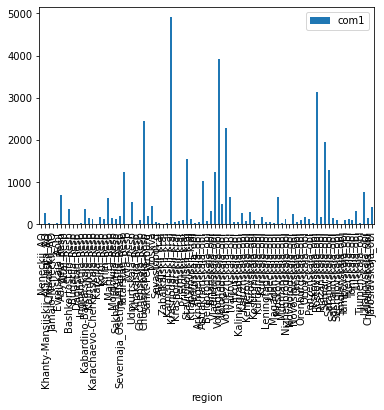

In [ ]:
cn.plot.bar(x='region', y='com1')

In [ ]:
comsx6['region'].value_counts()

Krasnojarskij_kraj    3005
Novosibirskaja_obl    2011
Tomskaja_obl          1289
Irkutskaja_obl        1077
Kemerovskaja_obl      1059
                      ... 
Orlovskaja_obl           4
Chukotskij_AO            3
Ivanovskaja_obl          2
Jamalo-Neneckij_AO       2
Tverskaja_obl            2
Name: region, Length: 69, dtype: int64

In [ ]:
!pip install vincent

  Created wheel for vincent: filename=vincent-0.4.4-py3-none-any.whl size=35168 sha256=bd19c44a0b5bd9de810d911aa310902b59872f56cbd7504856514fbd6ccb28cb
  Stored in directory: /root/.cache/pip/wheels/8a/82/70/830a62b316859479b700063f828a1e13fcdc403dd89dcbeca2
Successfully built vincent


In [ ]:
import vincent

geo_data = [{'name': 'rus', #имя карты
             'url': 'https://raw.githubusercontent.com/tttdddnet/Python-Jupyter-Geo/main/geo_ru.json', #путь до TopoJSON файла с картой
             'feature': 'russia'}] #имя объекта из файла карты

In [ ]:
vis = vincent.Map(data=RegionProfit, geo_data=geo_data,scale=700, projection='conicEqualArea', rotate = [-105,0], center = [-10, 65], data_bind=2011, data_key='code', map_key={'rus': 'properties.region'})

NameError: ignored

In [ ]:
from shapely.geometry import Point

sales['geometry'] = sales.apply(lambda r: Point(r.lon, r.lat), axis=1)
sales = gpd.GeoDataFrame(sales, crs=4326)
sales.head() # часть координат нулевые, попробуем удалить
sales['lat'].isna().sum()
sales = sales.dropna(subset=['lon'])

In [ ]:
reg_n = comsx4['region'].value_counts().to_dict()


Moskovskaja_obl        11307
Moskva                  8293
Tverskaja_obl           2095
Voronezhskaja_obl       1498
Nizhegorodskaja_obl     1485
                       ...  
Adygeja_Resp              12
Tyva_Resp                 11
Chukotskij_AO              4
Ingushetija_Resp           2
Neneckij_AO                2
Name: region, Length: 85, dtype: int64

In [ ]:
freq_r = comsx4['region'].value_counts().idxmax()
freq_r

'Moskovskaja_obl'

In [ ]:
mean_d = 0
for reg1 in reg_n:
    dist = df_dist_matrix[freq_r][reg1]
    #print(dist)
    dist = dist * (reg_n[freq_r] * reg_n[reg1])
    mean_d += dist 
   # print(mean_d)

mean_d = mean_d * 2/ (len(comsx4) * (len(comsx4)-1))
mean_d

270.8530312387238

In [ ]:
comsx4['region'].value_counts().head(60)

Moskovskaja_obl                  11307
Moskva                            8293
Tverskaja_obl                     2095
Voronezhskaja_obl                 1498
Nizhegorodskaja_obl               1485
Lipeckaja_obl                     1268
Vladimirskaja_obl                 1225
Ivanovskaja_obl                   1023
Brjanskaja_obl                    1020
Tulskaja_obl                      1003
Khanty-Mansijskij_AO-Jugra_AO      787
Sverdlovskaja_obl                  778
Kurskaja_obl                       771
Belgorodskaja_obl                  732
Orlovskaja_obl                     674
Samarskaja_obl                     645
Smolenskaja_obl                    644
Jaroslavskaja_obl                  610
Sankt-Peterburg                    590
Novosibirskaja_obl                 568
Kaluzhskaja_obl                    562
Cheljabinskaja_obl                 533
Tambovskaja_obl                    506
Krasnojarskij_kraj                 471
Rjazanskaja_obl                    465
Krim_Resp                

In [ ]:
mean_d = 0
for i in range(len(comsx4)):
  for j in range(i+1, len(comsx4)):
      if comsx4.iloc[i]['region'] != comsx4.iloc[j]['region']:
        dist = df_dist_matrix[comsx4.iloc[i]['region']][comsx4.iloc[j]['region']]
        mean_d += dist

mean_dist /= len(comsx4)
mean_dist
#df_dist_matrix[comsx4.iloc[0]['region']][comsx4.iloc[0]['region']]

KeyboardInterrupt: ignored

In [ ]:
comsx4['participant_inn'].value_counts()

-7736035485      1541
-7710026574      1500
-7716748907       875
-7713056834       579
-7709031643       562
                 ... 
-5752049386         1
-5751053157         1
-524929589610       1
-7706736035         1
-772910316003       1
Name: participant_inn, Length: 8056, dtype: int64

In [ ]:
population = pd.read_excel('population (1).xlsx')
population.rename(columns = {'Субъект РФ':'subject', 'Всё население':'population'}, inplace = True)

In [ ]:
coord['subject'] = coord['subject'].str.strip()
population['subject'] = population['subject'].str.strip()
cn = coord.merge(population, on=['subject'])

In [ ]:
cn

Unnamed: 0_x  id                                   subject  \
0             81  81                               Ненецкий АО   
1             82  82  Ханты-Мансийский автономный округ — Югра   
2             83  83                              Чукотский АО   
3             84  84                         Ямало-Ненецкий АО   
4             80  80              Еврейская автономная область   
..           ...  ..                                       ...   
80            72  72                          Тульская область   
81            73  73                         Тюменская область   
82            74  74                       Ульяновская область   
83            75  75                       Челябинская область   
84            76  76                       Ярославская область   

            center       lat        lon  lat_radians  long_radians  type  \
0       Нарьян-Мар  67.63869   53.00371     1.180518      0.925089    АО   
1   Ханты-Мансийск  61.00417   69.00194     1.064724      1.204311    АО   
2          Анадырь  64.73424  177.51030     1.129826      3.098139    АО   
3         Салехард  66.53000   66.60194     1.161168      1.162423    АО   
4       Биробиджан  48.79284  132.92386     0.851596      2.319959  Аобл   
..             ...       ...        ...          ...           ...   ...   
80            Тула  54.19609   37.61822     0.945900      0.656562   обл   
81          Тюмень  57.15222   65.52722     0.997494      1.143666   обл   
82       Ульяновск  54.32824   48.38657     0.948207      0.844505   обл   
83       Челябинск  55.15402   61.42915     0.962619      1.072141   обл   
84       Ярославль  57.62987   39.87368     1.005831      0.695927   обл   

                           region  Unnamed: 0_y   № population  % от общ.  \
0                     Neneckij_AO            84  85     44 540       0.03   
1   Khanty-Mansijskij_AO-Jugra_AO            27  28  1 702 240       1.17   
2                   Chukotskij_AO            83  84     50 040       0.03   
3              Jamalo-Neneckij_AO            70  71    552 117       0.38   
4                 Evrejskaja_Aobl            81  82    153 831       0.11   
..                            ...           ...  ..        ...        ...   
80                   Tulskaja_obl            32  33  1 432 570       0.98   
81                Tjumenskaja_obl            28  29  1 552 148       1.07   
82               Uljanovskaja_obl            39  40  1 203 969       0.83   
83             Cheljabinskaja_obl             8   9  3 418 606       2.35   
84              Jaroslavskaja_obl            38  39  1 227 383       0.84   

    gdp_x  gdp_y  
0     0.2    0.2  
1     3.6    3.6  
2     0.1    0.1  
3     3.0    3.0  
4     0.1    0.1  
..    ...    ...  
80    0.8    0.8  
81    7.8    7.8  
82    0.5    0.5  
83    1.7    1.7  
84    0.7    0.7  

[85 rows x 16 columns]

In [ ]:
import pandas as pd

coord = pd.read_excel("/content/drive/MyDrive/coords.xlsx")
coord

Unnamed: 0  id                                   subject          center  \
0           81  81                               Ненецкий АО      Нарьян-Мар   
1           82  82  Ханты-Мансийский автономный округ — Югра  Ханты-Мансийск   
2           83  83                              Чукотский АО         Анадырь   
3           84  84                         Ямало-Ненецкий АО        Салехард   
4           80  80              Еврейская автономная область      Биробиджан   
..         ...  ..                                       ...             ...   
80          72  72                          Тульская область            Тула   
81          73  73                         Тюменская область          Тюмень   
82          74  74                       Ульяновская область       Ульяновск   
83          75  75                       Челябинская область       Челябинск   
84          76  76                       Ярославская область       Ярославль   

         lat        lon  lat_radians  long_radians  type  \
0   67.63869   53.00371     1.180518      0.925089    АО   
1   61.00417   69.00194     1.064724      1.204311    АО   
2   64.73424  177.51030     1.129826      3.098139    АО   
3   66.53000   66.60194     1.161168      1.162423    АО   
4   48.79284  132.92386     0.851596      2.319959  Аобл   
..       ...        ...          ...           ...   ...   
80  54.19609   37.61822     0.945900      0.656562   обл   
81  57.15222   65.52722     0.997494      1.143666   обл   
82  54.32824   48.38657     0.948207      0.844505   обл   
83  55.15402   61.42915     0.962619      1.072141   обл   
84  57.62987   39.87368     1.005831      0.695927   обл   

                           region  
0                     Neneckij_AO  
1   Khanty-Mansijskij_AO-Jugra_AO  
2                   Chukotskij_AO  
3              Jamalo-Neneckij_AO  
4                 Evrejskaja_Aobl  
..                            ...  
80                   Tulskaja_obl  
81                Tjumenskaja_obl  
82               Uljanovskaja_obl  
83             Cheljabinskaja_obl  
84              Jaroslavskaja_obl  

[85 rows x 10 columns]

In [ ]:
dists = pd.read_excel("/content/drive/MyDrive/distances.xlsx")
dists

Unnamed: 0                      0                      1  \
0            0                 0.0 km  3435.7801094721726 km   
1            1  3435.7801094721726 km                 0.0 km   
2            2   1599.657705907602 km   2002.552334886094 km   
3            3   4896.520404536892 km  1487.4929425248015 km   
4            4   622.0371664841583 km  3022.3508689575438 km   
..         ...                    ...                    ...   
78          78    6651.85336629403 km  3303.3146717923114 km   
79          79  2673.9027802910946 km   2487.260531732409 km   
80          80  2629.5067270580616 km   1441.283193035203 km   
81          81   7328.724608408856 km   5040.209872369631 km   
82          82  2909.2251513455863 km  1943.8692977489654 km   

                        2                      3                      4  \
0    1599.657705907602 km   4896.520404536892 km   622.0371664841583 km   
1    2002.552334886094 km  1487.4929425248015 km  3022.3508689575438 km   
2                  0.0 km  3380.6345806352347 km  1446.0260050955574 km   
3   3380.6345806352347 km                 0.0 km   4507.181062314141 km   
4   1446.0260050955574 km   4507.181062314141 km                 0.0 km   
..                    ...                    ...                    ...   
78   5081.940812414188 km  1825.0699573451936 km   6304.681240753439 km   
79  1445.3641484622829 km  3381.8011291511752 km  2765.1051630677107 km   
80  1038.0432966899639 km   2545.284255688002 km  2466.1267394535266 km   
81   5851.851588640702 km   4096.371173243621 km   7297.525964513089 km   
82  1431.8403464188884 km  2779.6191681180094 km   2868.137525917678 km   

                        5                      6                      7  \
0    405.1279056880681 km  307.30326667539686 km   375.5089269478323 km   
1   3195.0983635396024 km   3258.173154927868 km   3060.381902998044 km   
2   1516.7184934309807 km  1536.7418056519734 km  1249.8033465226642 km   
3    4675.060608806098 km   4734.664076506109 km  4521.5200450361235 km   
4    223.8934274115502 km      320.6893558499 km  450.89632709057327 km   
..                    ...                    ...                    ...   
78   6461.451311491105 km   6514.606177005867 km    6280.76797443045 km   
79   2762.061759744472 km   2744.813415888783 km   2428.553110276136 km   
80  2551.7948982178436 km   2574.426980564037 km  2286.7096518233398 km   
81   7350.077658129388 km   7353.128348716131 km   7042.561392766328 km   
82  2913.0792662028143 km   2916.614769970896 km  2607.7188935622275 km   

                        8  ...                     73                     74  \
0   161.21984245603446 km  ...   1234.601305646656 km   1916.802806402944 km   
1    3323.606686141555 km  ...  2495.1271817871257 km   1652.204945314521 km   
2   1538.6057415241132 km  ...  492.66401357169246 km   352.8265978848986 km   
3    4792.498258720868 km  ...  3860.4876679021263 km  3030.3243686420074 km   
4    460.8209439106497 km  ...  1264.0089899153752 km  1687.4202842227567 km   
..                    ...  ...                    ...                    ...   
78   6560.186049254142 km  ...   5535.705644555111 km   4744.159499694155 km   
79   2685.777180718973 km  ...  1503.0292039233523 km  1459.0821857097005 km   
80  2575.3552781564067 km  ...  1428.4409157851626 km   788.9704624453982 km   
81   7318.936380354796 km  ...   6105.726852451037 km   5644.489404231029 km   
82  2887.5906618164013 km  ...  1676.0081765512793 km  1297.3113632547097 km   

                       75                     76                     77  \
0   1448.7908700066876 km    1827.54995105521 km   522.5591584132602 km   
1   2966.9565417103704 km    3472.59523300428 km  3885.9453508204397 km   
2   1046.8014098539672 km  1636.8409511903344 km  1961.1178808945551 km   
3    4225.202385515035 km   4634.260469895146 km   5323.067018247451 km   
4   1715.5879551232551 km  2218.5422046249355 km  1138.0752631367939 km   
..                    

In [ ]:
import numpy as np 

coord[['lat_radians','long_radians']] = (
    np.radians(coord.loc[:,['lat','lon']])
)
coord

Unnamed: 0  id                                   subject          center  \
0           81  81                               Ненецкий АО      Нарьян-Мар   
1           82  82  Ханты-Мансийский автономный округ — Югра  Ханты-Мансийск   
2           83  83                              Чукотский АО         Анадырь   
3           84  84                         Ямало-Ненецкий АО        Салехард   
4           80  80              Еврейская автономная область      Биробиджан   
..         ...  ..                                       ...             ...   
80          72  72                          Тульская область            Тула   
81          73  73                         Тюменская область          Тюмень   
82          74  74                       Ульяновская область       Ульяновск   
83          75  75                       Челябинская область       Челябинск   
84          76  76                       Ярославская область       Ярославль   

         lat        lon  lat_radians  long_radians  type  \
0   67.63869   53.00371     1.180518      0.925089    АО   
1   61.00417   69.00194     1.064724      1.204311    АО   
2   64.73424  177.51030     1.129826      3.098139    АО   
3   66.53000   66.60194     1.161168      1.162423    АО   
4   48.79284  132.92386     0.851596      2.319959  Аобл   
..       ...        ...          ...           ...   ...   
80  54.19609   37.61822     0.945900      0.656562   обл   
81  57.15222   65.52722     0.997494      1.143666   обл   
82  54.32824   48.38657     0.948207      0.844505   обл   
83  55.15402   61.42915     0.962619      1.072141   обл   
84  57.62987   39.87368     1.005831      0.695927   обл   

                           region  
0                     Neneckij_AO  
1   Khanty-Mansijskij_AO-Jugra_AO  
2                   Chukotskij_AO  
3              Jamalo-Neneckij_AO  
4                 Evrejskaja_Aobl  
..                            ...  
80                   Tulskaja_obl  
81                Tjumenskaja_obl  
82               Uljanovskaja_obl  
83             Cheljabinskaja_obl  
84              Jaroslavskaja_obl  

[85 rows x 10 columns]

In [ ]:
from sklearn import neighbors

dist = neighbors.DistanceMetric.get_metric('haversine')
dist_matrix = (dist.pairwise
    (coord[['lat_radians','long_radians']],
     coord[['lat_radians','long_radians']])*6371
)
dist_matrix

array([[   0.        , 1061.15831977, 4658.74427164, ..., 1499.84751457,
        1455.75788285, 1293.63200438],
       [1061.15831977,    0.        , 4837.6194572 , ..., 1424.18196866,
         787.1989801 , 1679.72882416],
       [4658.74427164, 4837.6194572 ,    0.        , ..., 6084.32690052,
        5624.52845446, 5947.79709669],
       ...,
       [1499.84751457, 1424.18196866, 6084.32690052, ...,    0.        ,
         840.96936805,  643.68304518],
       [1455.75788285,  787.1989801 , 5624.52845446, ...,  840.96936805,
           0.        , 1348.8285032 ],
       [1293.63200438, 1679.72882416, 5947.79709669, ...,  643.68304518,
        1348.8285032 ,    0.        ]])

In [ ]:
df_dist_matrix = (
    pd.DataFrame(dist_matrix,index=coord['region'], 
                 columns=coord['region'])
)
df_dist_matrix['Neneckij_AO']['Chukotskij_AO']

4658.744271637316

In [ ]:
import numpy as np

df_dist_matrix = df_dist_matrix / np.linalg.norm(df_dist_matrix)

In [ ]:
df_dist_matrix

region                         Neneckij_AO  Khanty-Mansijskij_AO-Jugra_AO  \
region                                                                      
Neneckij_AO                       0.000000                       0.004066   
Khanty-Mansijskij_AO-Jugra_AO     0.004066                       0.000000   
Chukotskij_AO                     0.017852                       0.018537   
Jamalo-Neneckij_AO                0.002300                       0.002397   
Evrejskaja_Aobl                   0.018023                       0.015774   
...                                    ...                            ...   
Tulskaja_obl                      0.006513                       0.007638   
Tjumenskaja_obl                   0.005085                       0.001808   
Uljanovskaja_obl                  0.005747                       0.005457   
Cheljabinskaja_obl                0.005578                       0.003016   
Jaroslavskaja_obl                 0.004957                       0.006436   

region                         Chukotskij_AO  Jamalo-Neneckij_AO  \
region                                                             
Neneckij_AO                         0.017852            0.002300   
Khanty-Mansijskij_AO-Jugra_AO       0.018537            0.002397   
Chukotskij_AO                       0.000000            0.016936   
Jamalo-Neneckij_AO                  0.016936            0.000000   
Evrejskaja_Aobl                     0.012051            0.015893   
...                                      ...                 ...   
Tulskaja_obl                        0.024350            0.007927   
Tjumenskaja_obl                     0.020322            0.004001   
Uljanovskaja_obl                    0.023314            0.006406   
Cheljabinskaja_obl                  0.021552            0.004960   
Jaroslavskaja_obl                   0.022791            0.006462   

region                         Evrejskaja_Aobl  Adygeja_Resp  Altaj_Resp  \
region                                                                     
Neneckij_AO                           0.018023      0.010231    0.009505   
Khanty-Mansijskij_AO-Jugra_AO         0.015774      0.010055    0.005509   
Chukotskij_AO                         0.012051      0.027997    0.019248   
Jamalo-Neneckij_AO                    0.015893      0.011127    0.007431   
Evrejskaja_Aobl                       0.000000      0.025416    0.012619   
...                                        ...           ...         ...   
Tulskaja_obl                          0.023406      0.004143    0.012157   
Tjumenskaja_obl                       0.016916      0.008589    0.005476   
Uljanovskaja_obl                      0.021146      0.004727    0.009530   
Cheljabinskaja_obl                    0.018122      0.007330    0.006311   
Jaroslavskaja_obl                     0.022125      0.005549    0.011332   

region                         Bashkortostan_Resp  Burjatija_Resp  \
region                                                              
Neneckij_AO                              0.005527        0.012918   
Khanty-Mansijskij_AO-Jugra_AO            0.003967        0.009723   
Chukotskij_AO                            0.022344        0.015645   
Jamalo-Neneckij_AO                       0.005474        0.010620   
Evrejskaja_Aobl                          0.019412        0.006972   
...                                           ...             ...   
Tulskaja_obl                             0.004537        0.017222   
Tjumenskaja_obl                          0.002498        0.010480   
Uljanovskaja_obl                         0.001882        0.014745   
Cheljabinskaja_obl                       0.001347        0.011574   
Jaroslavskaja_obl                        0.003998        0.016137   

region                         Dagestan_Resp  ...  Sverdlovskaja_obl  \
region                                        ...                      
Neneckij_AO                         0.010583  ...           0.004829   
Khanty-Man

In [ ]:
regs = pd.read_csv("/content/drive/MyDrive/regions.csv")
regs = regs[regs['region'] != 'Bajkonur_g']
regs.sort_values(by='region')
regs['region'][84] = regs.iloc[83]['region'] + '_g'
regs['region'][85] = regs.iloc[84]['region'] + '_g'

regs.region.apply(lambda x: x.rsplit('_', 1))
regs[['reg_name', 'reg_type']] = regs.region.str.rsplit('_', 1, expand=True)
regs['name_ru'] = regs['reg_name'].apply(lambda x: translit(x, 'ru'))
regs['type_ru'] = regs['reg_type'].apply(lambda x: translit(x, 'ru'))
regs = regs.sort_values(by=['type_ru', 'name_ru'])
regs.to_excel('regs.xlsx')

In [ ]:
coord['type'] = 'г'
for i in range(len(coord)):
  if 'область' in coord.iloc[i]['subject']:
    coord['type'][ i] = 'обл'
  elif 'Республика' in coord.iloc[i]['subject']:
    coord['type'][ i] = 'Респ'
  elif 'край' in coord.iloc[i]['subject']:
    coord['type'][ i] = 'край'
  elif 'округ' in coord.iloc[i]['subject'] or 'АО' in coord.iloc[i]['subject']:
    coord['type'][ i] = 'АО'
  if 'Еврейская' in coord.iloc[i]['subject']:
    print(i)
    coord['type'][ i] = 'Аобл'

coord = coord.sort_values(by=['type', 'id'])
coord.to_excel('coords.xlsx')

80


In [ ]:
!pip install transliterate

from transliterate import translit
translit('Волгоградская область', 'ru', reversed=True)

"Volgogradskaja oblast'"

In [ ]:
len(coms_7.communities)


0

In [ ]:
nx.is_connected(G_a)

False

In [ ]:
for i in range(len(firms_issuers_gr)):
  print((firms_issuers_gr['participant_inn'][i], firms_issuers_gr['procurer_reg_num'][i]))

Выходные данные были обрезаны до нескольких последних строк (5000).
(382501914255, 1343000233.0)
(3819011138, 3343000157.0)
(381906427201, 3343000157.0)
(3811081126, 3342000049.0)
(3811079286, 3342000049.0)
(3851005570, 3342000049.0)
(5408130693, 3343000236.0)
(5405279487, 3341000167.0)
(3811996243, 3341000137.0)
(380401914508, 3341000137.0)
(3812152789, 3341000137.0)
(3849021398, 3341000137.0)
(3805404146, 3343000236.0)
(3828000044, 1341000091.0)
(3812023896, 3341000063.0)
(382100099980, 3341000063.0)
(3817030304, 2341000002.0)
(381606687135, 1343000738.0)
(3849015193, 1343000738.0)
(3812062165, 3341000240.0)
(3801114527, 3341000240.0)
(3811129258, 3341000240.0)
(2222077431, 1341000051.0)
(7710955167, 1341000051.0)
(7721157466, 1341000051.0)
(3827009502, 1341000051.0)
(3812080799, 1341000051.0)
(3818025272, 1343000273.0)
(382800669040, 1343000273.0)
(382300076853, 1343000258.0)
(3805717822, 3343000260.0)
(3805112993, 3343000260.0)
(3812141931, 3343000834.0)
(850602852091, 3341000136.0

KeyboardInterrupt: ignored

In [ ]:
G_b = nx.Graph()
G_b.add_nodes_from(gr['auction_id'], bipartite=0)
G_b.add_nodes_from(gr['participant_inn'], bipartite=1)
G_b.add_edges_from([(row['auction_id'], row['participant_inn']) for idx, row in gr.iterrows()])

In [ ]:
gr

participant_inn  auction_id
1            -2543003150           1
2            -2722119337           1
3            -3849008742           1
4            -2725098967           1
5            -2724172167           1
...                  ...         ...
3081713      -7727579626     1444715
3081714      -7729587767     1444715
3081715      -7716660956     1444716
3081716      -5001058595     1444717
3081717      -7707653906     1444717

[2559271 rows x 2 columns]

In [ ]:
bipartite.is_bipartite(G_b)

False

In [ ]:
nx.is_connected(G_b)

False

In [ ]:
comps = [len(c) for c in sorted(nx.connected_components(G_b), key=len, reverse=True)]
comps
print(len(comps))

92262


In [ ]:
comps

[1602656,
 237,
 144,
 101,
 100,
 98,
 96,
 92,
 91,
 90,
 88,
 87,
 87,
 86,
 85,
 84,
 83,
 82,
 81,
 80,
 78,
 78,
 77,
 72,
 72,
 72,
 71,
 71,
 70,
 70,
 69,
 69,
 68,
 67,
 67,
 67,
 66,
 66,
 66,
 65,
 65,
 64,
 64,
 62,
 62,
 61,
 61,
 60,
 60,
 60,
 59,
 59,
 59,
 58,
 58,
 58,
 58,
 58,
 57,
 56,
 56,
 56,
 56,
 55,
 55,
 55,
 54,
 54,
 53,
 53,
 53,
 53,
 53,
 53,
 52,
 52,
 52,
 52,
 51,
 51,
 50,
 50,
 50,
 50,
 50,
 49,
 49,
 49,
 48,
 48,
 48,
 48,
 47,
 47,
 47,
 47,
 46,
 46,
 45,
 45,
 44,
 44,
 44,
 44,
 43,
 43,
 43,
 43,
 42,
 42,
 42,
 42,
 41,
 41,
 41,
 41,
 41,
 41,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 36,
 36,
 36,
 36,
 36,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 

In [ ]:
from networkx import bipartite

In [ ]:
largest_cc = max(nx.connected_components(G_b), key=len)
len(largest_cc)

1751815

In [ ]:
largest_cc = max(nx.connected_components(G_b), key=len)
len(largest_cc)
smallG = G_b.subgraph(largest_cc).copy()
smallG

In [ ]:
print(len(smallG))

1374788


In [ ]:
bipartite.is_bipartite(G_b)

False

In [ ]:
nx.is_connected(smallG)

True

In [ ]:
gr['auction_id'] = gr['auction_id'] + 1

In [ ]:
set1 = set(gr['auction_id'])
set2 = set(gr['participant_inn'])
set1 & set2

set()

In [ ]:
coms2 = algorithms.louvain(smallG, resolution=1., randomize=False)
print(coms2)

In [ ]:
print(len(coms2.communities))

41


In [ ]:
for c in coms2.communities:
  print(len(c))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [ ]:
bipartite.is_bipartite(smallG)

False

In [ ]:
smallG.nodes

NodeView((281201818073, 1233000197.0, 2543003150, 2722119337, 3849008742, 2725098967, 2724172167, 2801146492, 3233000352.0, 2801101004, 2828000420, 3233000394.0, 2808015820, 6663003127, 1231000003.0, 2801056707, 2801016937, 2801091853, 1232000008.0, 280102935867, 2801190325, 2801117910, 1231000065.0, 280112645885, 1231000067.0, 280100922622, 1231000086.0, 2801021102, 3232000153.0, 7708503727, 2801095015, 2801112302, 2801167498, 1231000020.0, 2801028477, 2807045210, 1233000056.0, 2801067579, 2801187749, 8231000004.0, 2801168961, 280113331112, 2723381047, 2801103065, 282931016130, 3232000047.0, 2801068935, 3232000068.0, 2801055686, 2801004089, 3233000096.0, 2801141511, 2801126672, 2801127281, 3702501003, 3233001089.0, 2801085602, 7724296588, 3123119160, 2801187298, 2801145097, 2801077425, 1231000033.0, 2801107221, 3231000103.0, 280703637350, 2801090698, 2801194591, 1232000001.0, 280101133148, 280100594668, 2801186311, 2801107655, 2807072818, 2801098707, 280100304993, 1232000018.0, 280111

In [ ]:
comps

[499698,
 32,
 29,
 21,
 19,
 17,
 16,
 16,
 16,
 15,
 14,
 13,
 13,
 12,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4

In [ ]:
nx.is_connected(smallG)

True

In [ ]:
import matplotlib.pyplot as plt

nx.draw(smallG)